In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import sys
sys.path.append('../..')

In [2]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from stack_segmentation.stack import Stack

In [4]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic
from stack_segmentation.training import handle_stacks_data, make_model, train_loop
from stack_segmentation.unet import UNet
from stack_segmentation.pipeline_config import dataloaders_conf, model_conf, train_conf

In [5]:
from exp_config import data_conf

## Prepare train, validation and test data

In [6]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

720it [00:01, 694.42it/s]
100%|██████████| 720/720 [00:07<00:00, 91.32it/s] 
8280it [00:00, 253613.64it/s]
7920it [00:00, 249205.83it/s]
720it [00:00, 764.88it/s]
100%|██████████| 720/720 [00:07<00:00, 94.51it/s] 
8280it [00:00, 241371.95it/s]
720it [00:00, 748.63it/s]
100%|██████████| 720/720 [00:07<00:00, 94.18it/s] 
8280it [00:00, 252338.46it/s]
700it [00:00, 851.37it/s]
100%|██████████| 700/700 [00:07<00:00, 99.84it/s] 
8280it [00:00, 231009.66it/s]
509it [00:00, 1188.13it/s]
100%|██████████| 509/509 [00:02<00:00, 195.71it/s]
3664it [00:00, 258466.98it/s]
700it [00:00, 855.99it/s]
100%|██████████| 700/700 [00:06<00:00, 100.08it/s]
8280it [00:00, 77063.37it/s]
700it [00:00, 843.37it/s]
100%|██████████| 700/700 [00:07<00:00, 97.96it/s] 
8280it [00:00, 238374.89it/s]
710it [00:01, 398.92it/s]
100%|██████████| 710/710 [00:07<00:00, 96.46it/s] 
8280it [00:00, 221528.73it/s]
710it [00:01, 404.29it/s]
100%|██████████| 710/710 [00:07<00:00, 97.96it/s] 
8280it [00:00, 250330.40it/s]
710it [

In [7]:
len(data_train), len(data_val), len(data_test)

(8280, 7920, 11)

In [8]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [9]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [10]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [11]:
model_conf

{'device': 'cuda:0', 'lr': 0.0001, 'factor': 0.75, 'patience': 2}

In [12]:
model, criterion, optimizer, scheduler = make_model(**model_conf)

## Run experiment

In [13]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.11115


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.021019
Epoch 1...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.028278


100%|██████████| 248/248 [00:19<00:00, 12.71it/s]


Mean val loss: 0.017164


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 2...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.026802


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.016129
Epoch 3...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.026414


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.015789
Epoch 4...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.025817


100%|██████████| 248/248 [00:19<00:00, 15.37it/s]


Mean val loss: 0.014511


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 5...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.025259


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.013772
Epoch 6...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.024731


100%|██████████| 248/248 [00:19<00:00, 12.68it/s]


Mean val loss: 0.013215


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 7...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.024539


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.01242
Epoch 8...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.024297


100%|██████████| 248/248 [00:19<00:00, 12.67it/s]


Mean val loss: 0.011001


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 9...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.024265


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.011574
EarlyStopping counter: 1 out of 5
Epoch 10...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.023859


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.01036
Epoch 11...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.023785


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0092614
Epoch 12...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.023608


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.010604
EarlyStopping counter: 1 out of 5
Epoch 13...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.023647


100%|██████████| 248/248 [00:19<00:00, 12.69it/s]


Mean val loss: 0.0090845


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 14...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.023438


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.010131
EarlyStopping counter: 1 out of 5
Epoch 15...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.023467


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0091553
EarlyStopping counter: 2 out of 5
Epoch 16...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.023232


100%|██████████| 248/248 [00:19<00:00, 12.69it/s]


Mean val loss: 0.0089483


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 17...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.023005


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0082567
Epoch 18...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.023332


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0085145
EarlyStopping counter: 1 out of 5
Epoch 19...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022937


100%|██████████| 248/248 [00:19<00:00, 12.67it/s]


Mean val loss: 0.0082236


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 20...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.023103


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0092109
EarlyStopping counter: 1 out of 5
Epoch 21...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.023219


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0078865
Epoch 22...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022834


100%|██████████| 248/248 [00:19<00:00, 12.72it/s]


Mean val loss: 0.0077957


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 23...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022951


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.007915
EarlyStopping counter: 1 out of 5
Epoch 24...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022878


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0083688
EarlyStopping counter: 2 out of 5
Epoch 25...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022742


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0081614
EarlyStopping counter: 3 out of 5
Epoch 26...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.02287


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0078556
EarlyStopping counter: 4 out of 5
Epoch 27...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022715


100%|██████████| 248/248 [00:19<00:00, 12.72it/s]


Mean val loss: 0.0077279


  0%|          | 0/259 [00:00<?, ?it/s]

Epoch 28...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022921


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0075666
Epoch 29...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.02289


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0077987
EarlyStopping counter: 1 out of 5
Epoch 30...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022731
Epoch    30: reducing learning rate of group 0 to 7.5000e-05.


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0079554
EarlyStopping counter: 2 out of 5
Epoch 31...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022594


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0079623
EarlyStopping counter: 3 out of 5
Epoch 32...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022493


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0076346
EarlyStopping counter: 4 out of 5
Epoch 33...


  0%|          | 0/248 [00:00<?, ?it/s]

Mean train loss: 0.022505


  0%|          | 0/259 [00:00<?, ?it/s]

Mean val loss: 0.0077009
EarlyStopping counter: 5 out of 5


100%|██████████| 259/259 [02:22<00:00,  2.00it/s]


## Dump experiment results

In [14]:
import pickle
import json

In [15]:
p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# p = 'carb96558_exp_results.pkl'
with open(p, 'wb') as f:
    pickle.dump(results, f)

In [16]:
# import torch
# torch.save(model.state_dict(), './{}_exp_model.torch'.format(data_conf['conf_name']))

In [17]:
model_conf

{'device': 'cuda:0', 'lr': 0.0001, 'factor': 0.75, 'patience': 2}

In [19]:
model.load_state_dict(torch.load('./{}_exp_model.torch'.format(data_conf['conf_name'])))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

## Train and validation losses

In [18]:
from itertools import chain

In [19]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [20]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

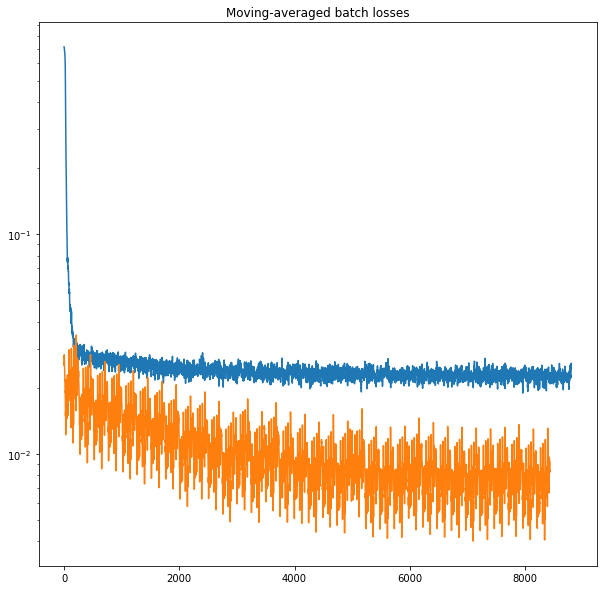

In [21]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')
plt.yscale('log')
# plt.ylim([1e-2, 1])
plt.show()

In [22]:
mean_train_loss = [np.mean(item) for item in results['val_losses']]
mean_val_loss = [np.mean(item) for item in results['train_losses']]

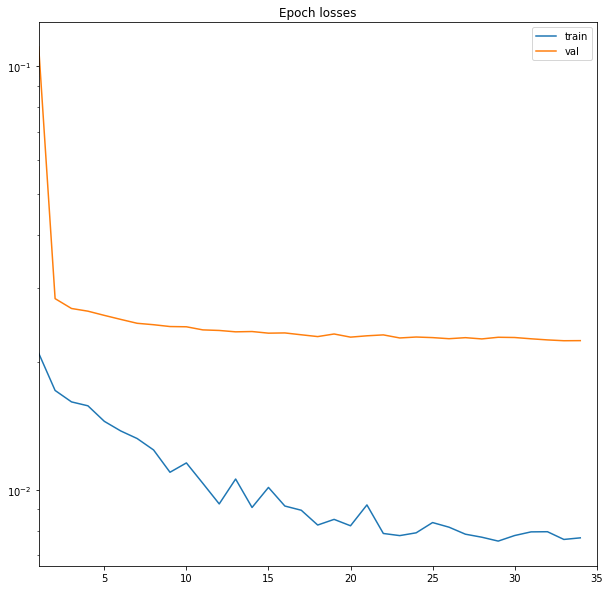

In [23]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [24]:
import os

In [28]:
import torch

In [29]:
from visualization_utils import output_to_binary, plot_sample

In [30]:
threshold = 0.5
to_plot = 10
device = model_conf['device']

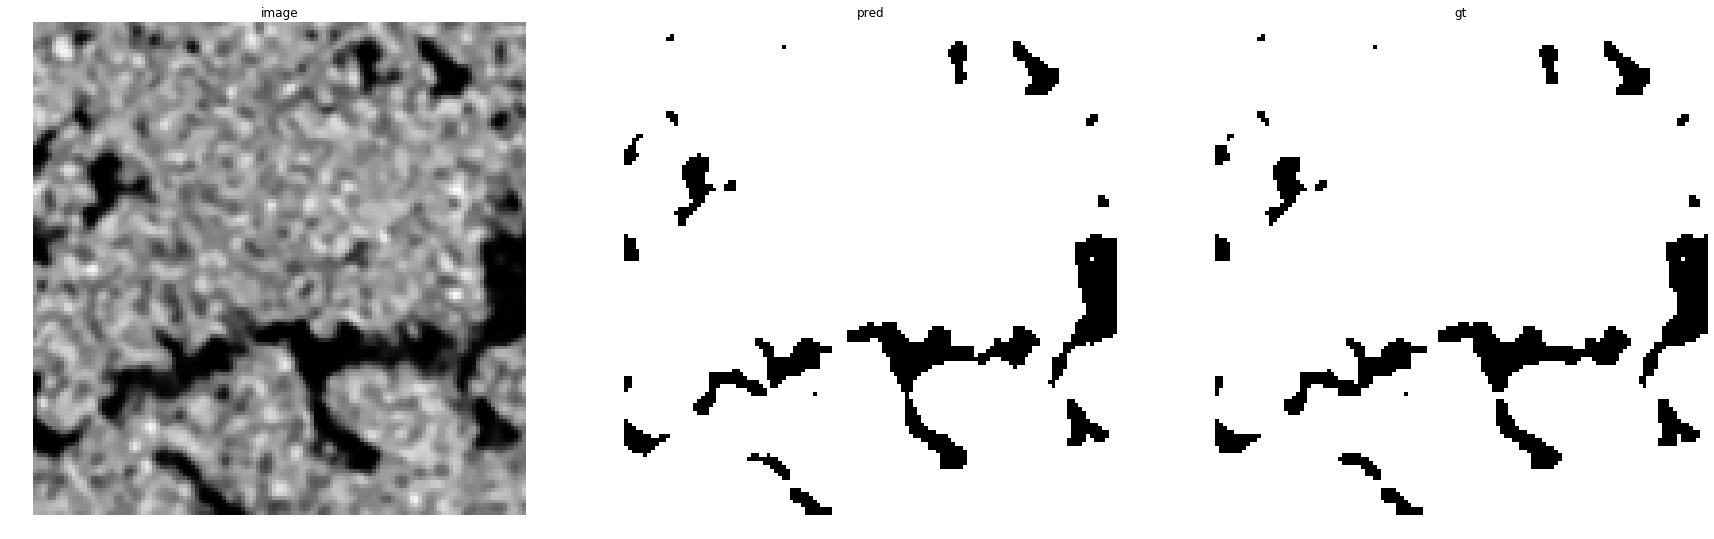

accuracy    : 0.99420166015625
precision   : 0.9955192937871999
recall      : 0.9981225693978811
f1          : 0.9968192319282152
pr_auc      : 0.9999750539055112
iou         : 0.9936586342700754


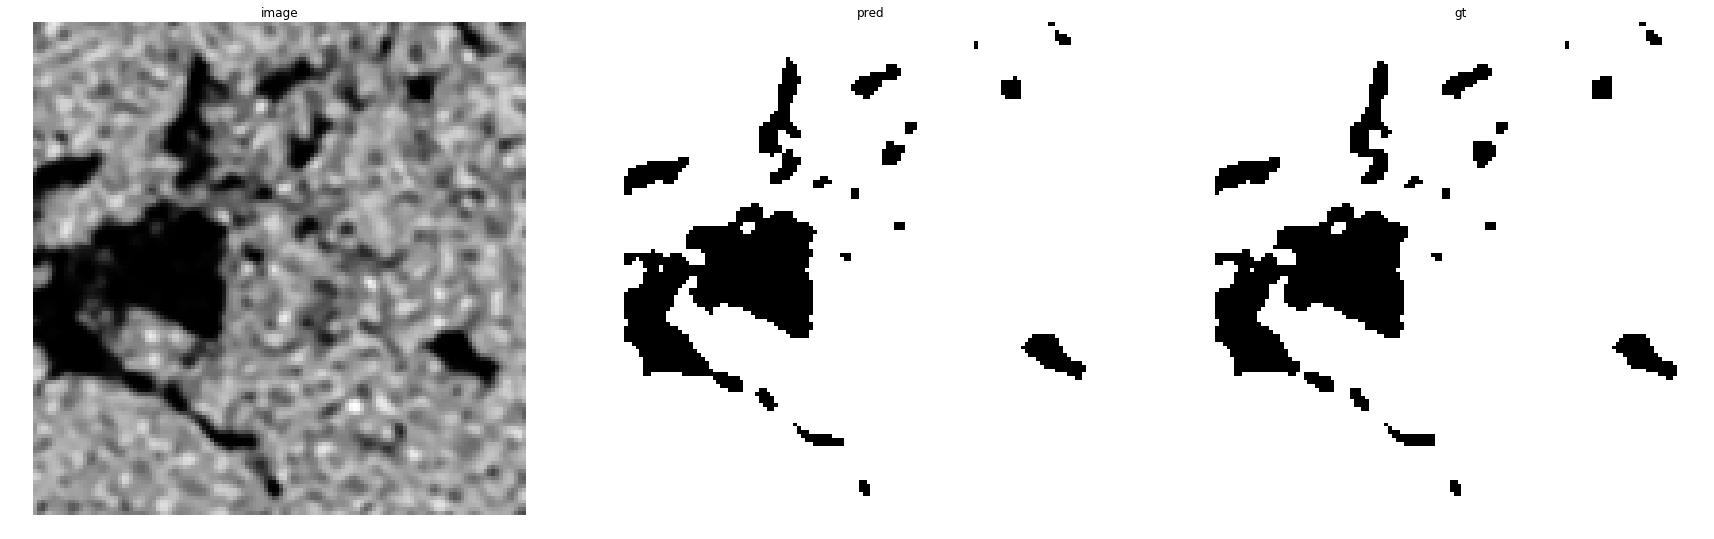

accuracy    : 0.994384765625
precision   : 0.9967721997115583
recall      : 0.9969091283742015
f1          : 0.9968406593406594
pr_auc      : 0.9999725857982328
iou         : 0.9937012186772559


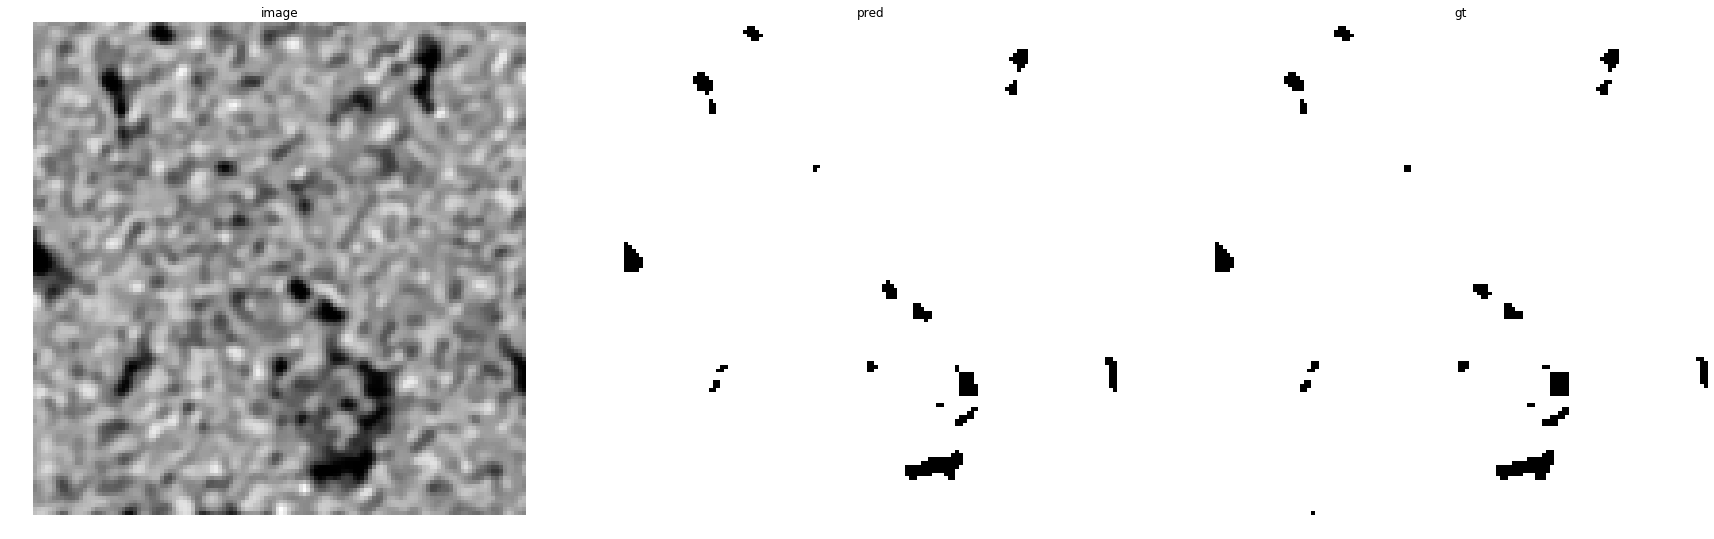

accuracy    : 0.998046875
precision   : 0.9986966236345581
recall      : 0.9993168550490622
f1          : 0.9990066430744396
pr_auc      : 0.9999972586751512
iou         : 0.9980152577063822


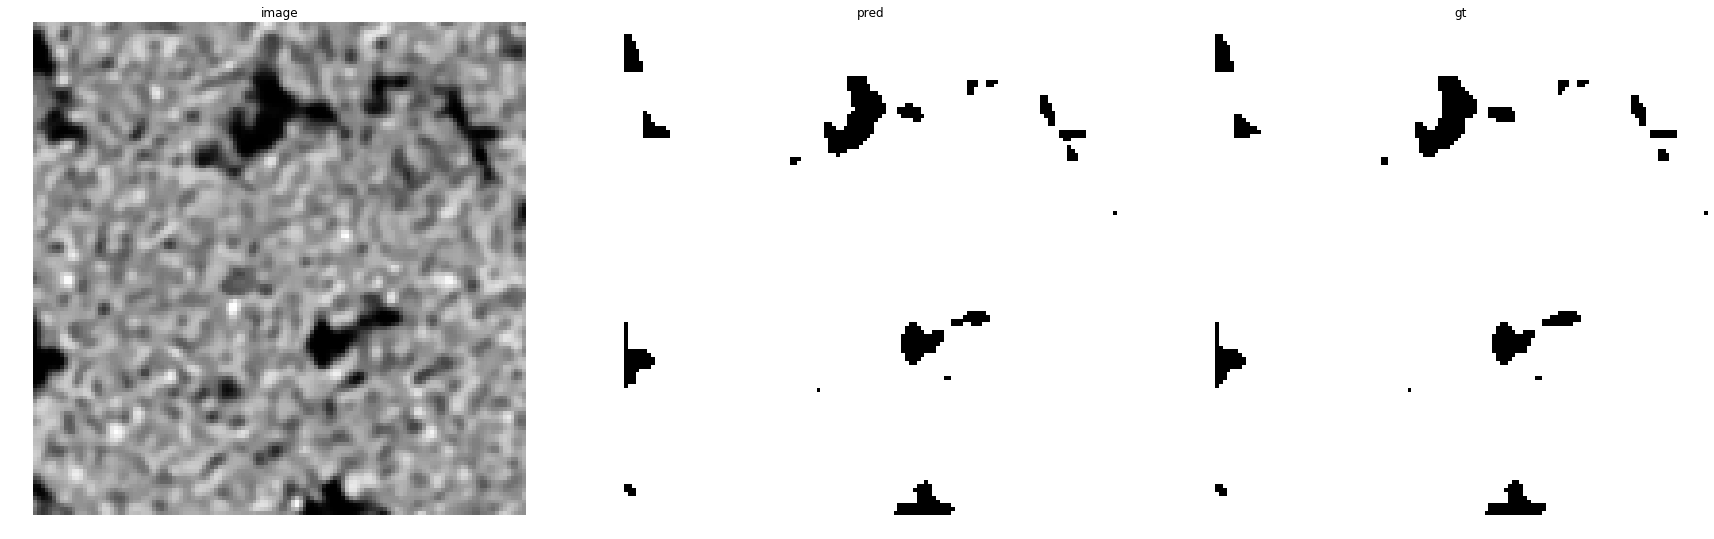

accuracy    : 0.997802734375
precision   : 0.9986729857819905
recall      : 0.9990517731841456
f1          : 0.9988623435722411
pr_auc      : 0.9999956956308276
iou         : 0.9977272727272727


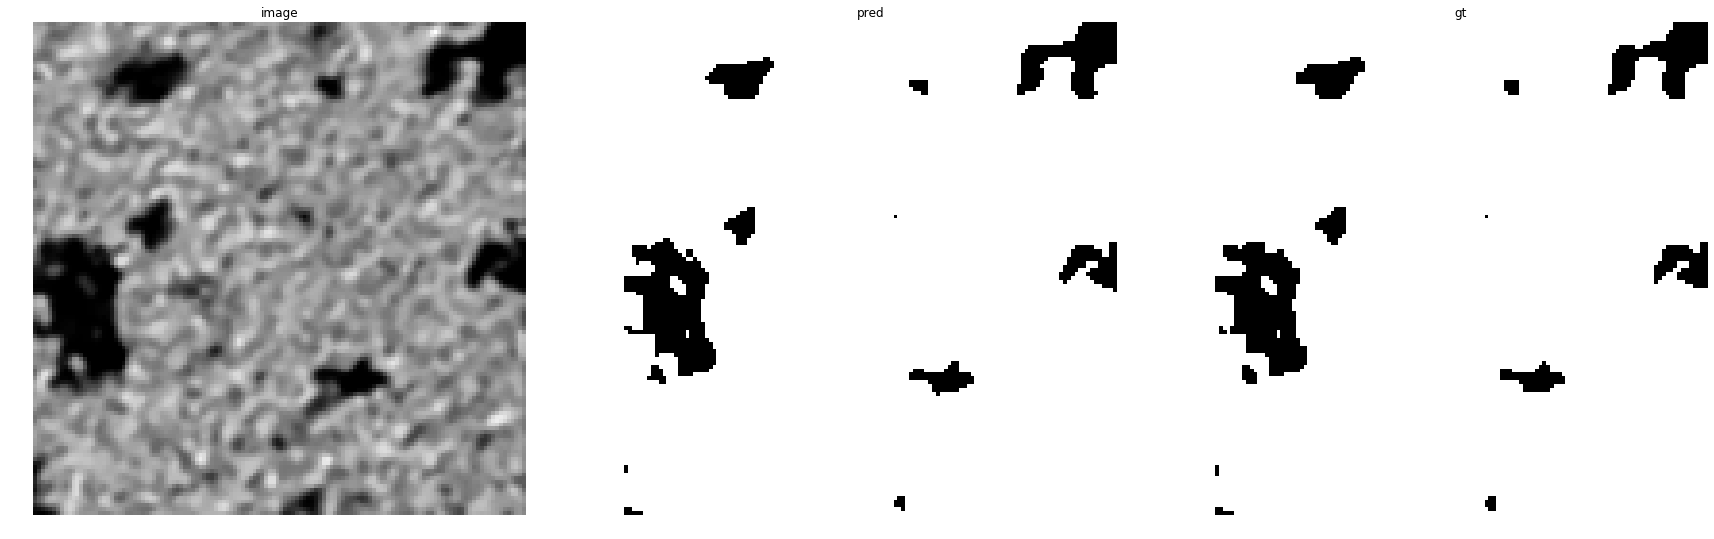

accuracy    : 0.9967041015625
precision   : 0.9981614025871692
recall      : 0.9982925067314639
f1          : 0.9982269503546098
pr_auc      : 0.9999913927691066
iou         : 0.9964601769911504


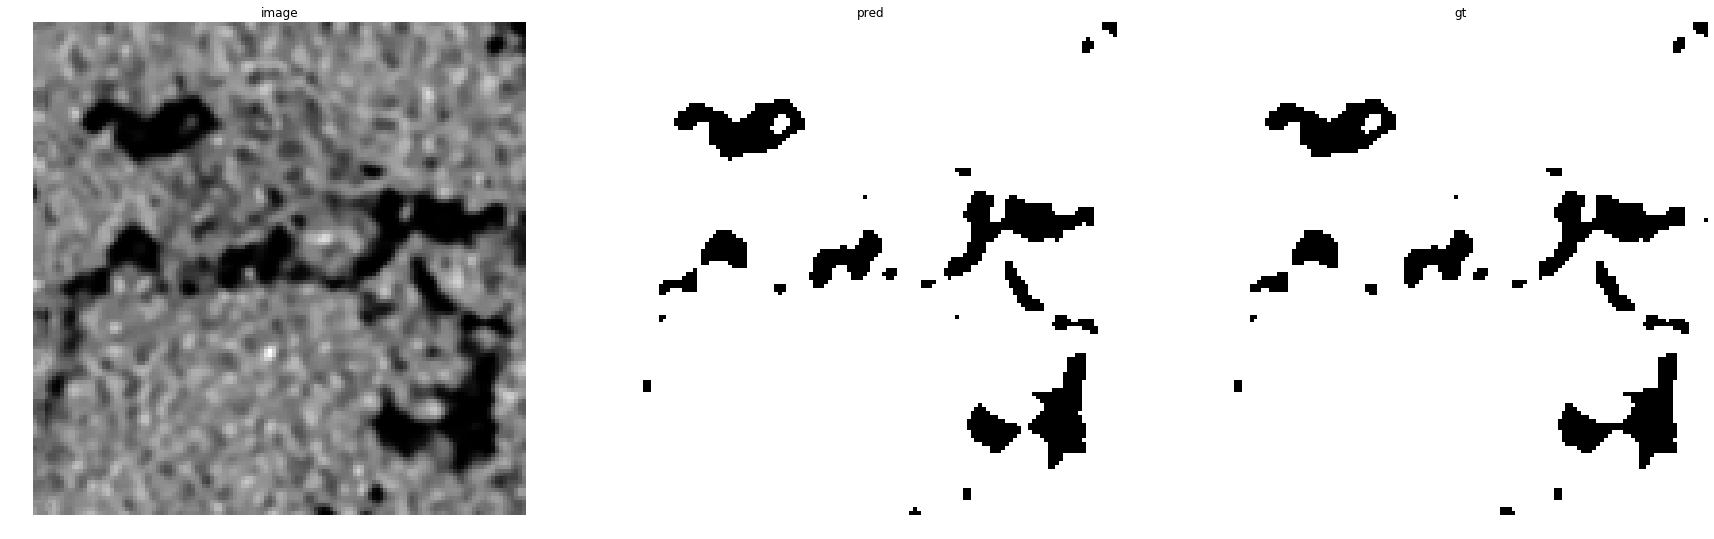

accuracy    : 0.99560546875
precision   : 0.9968704221600746
recall      : 0.9983328887703388
f1          : 0.997601119477577
pr_auc      : 0.9999837380847645
iou         : 0.9952137206674201


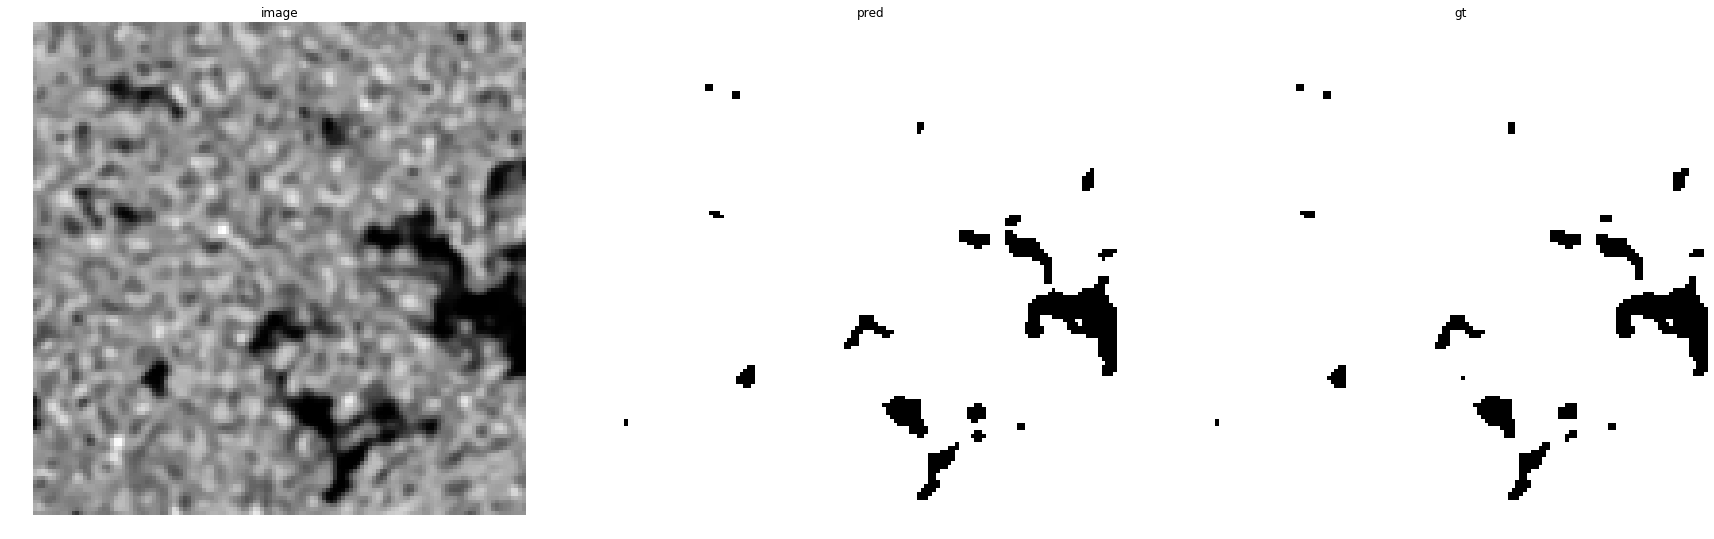

accuracy    : 0.996826171875
precision   : 0.9986019318759533
recall      : 0.9980945121951219
f1          : 0.9983481575603558
pr_auc      : 0.9999910763807173
iou         : 0.9967017632880882


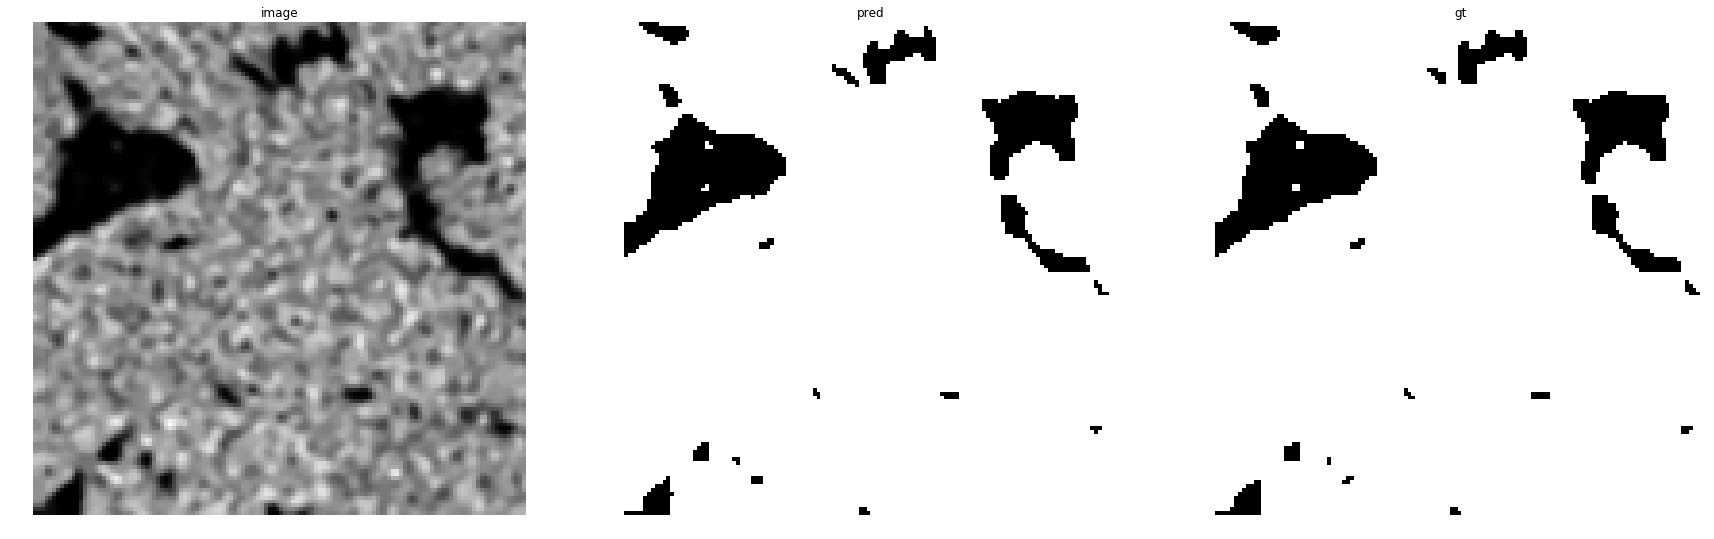

accuracy    : 0.99627685546875
precision   : 0.9981143511347566
recall      : 0.9977783761949643
f1          : 0.997946335386998
pr_auc      : 0.9999860349286711
iou         : 0.9959010885633651


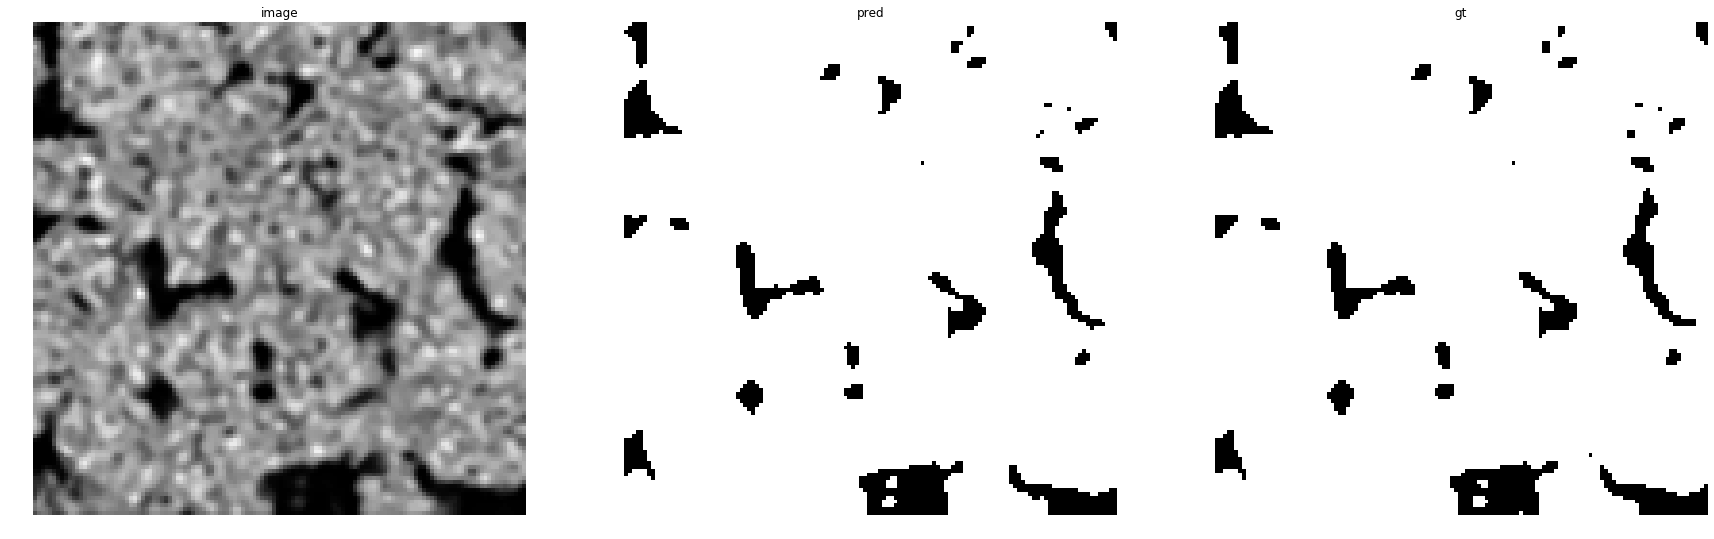

accuracy    : 0.9952392578125
precision   : 0.9966265379018389
recall      : 0.9982112097522194
f1          : 0.9974182444061963
pr_auc      : 0.9999800090555939
iou         : 0.9948497854077253


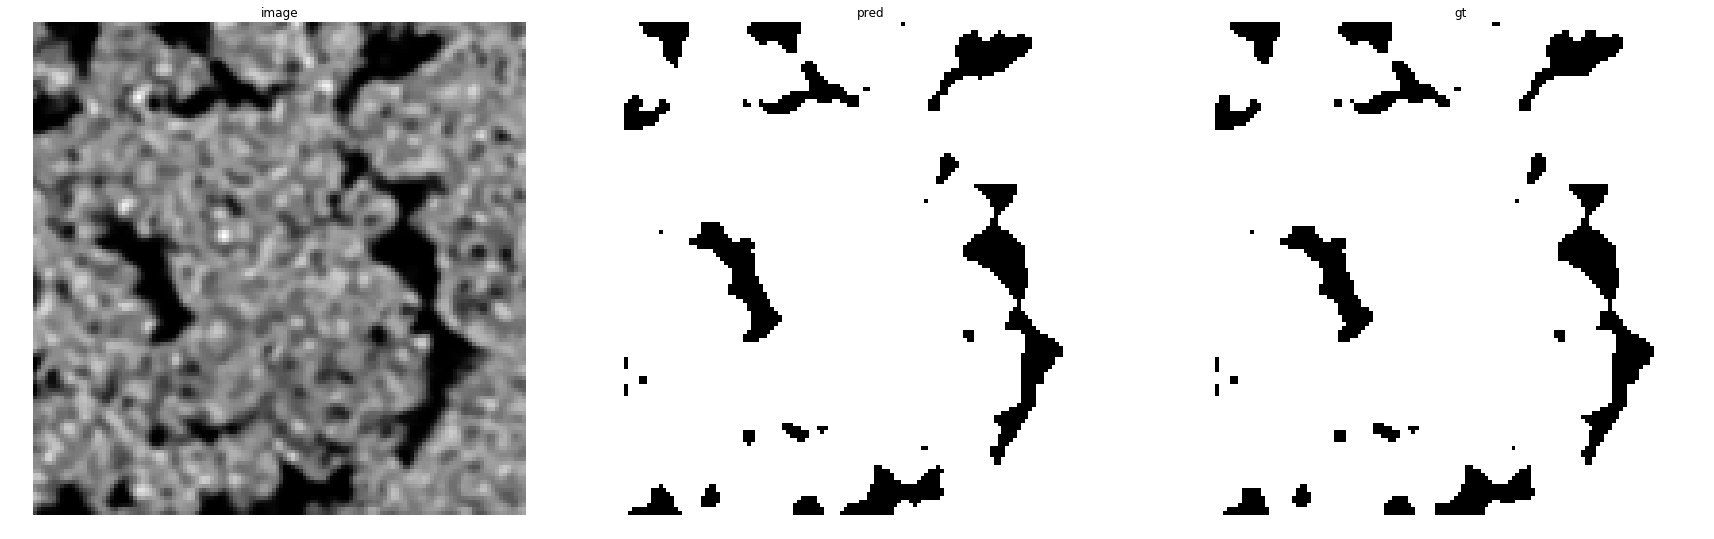

accuracy    : 0.99530029296875
precision   : 0.9975553442890126
recall      : 0.997216753784536
f1          : 0.9973860203007774
pr_auc      : 0.9999779365112512
iou         : 0.9947856707523532


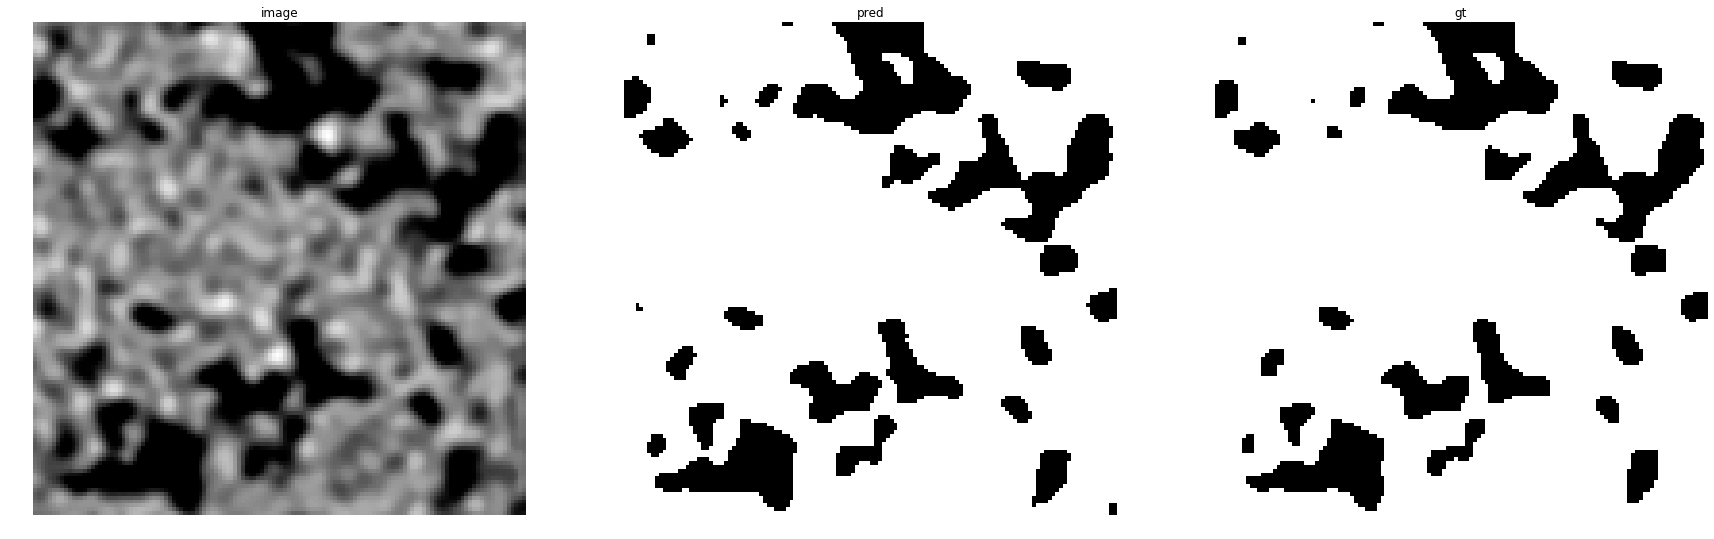

accuracy    : 0.98089599609375
precision   : 0.9995452478399273
recall      : 0.9772508336420896
f1          : 0.9882723219303833
pr_auc      : 0.9998496703897952
iou         : 0.9768165321087326


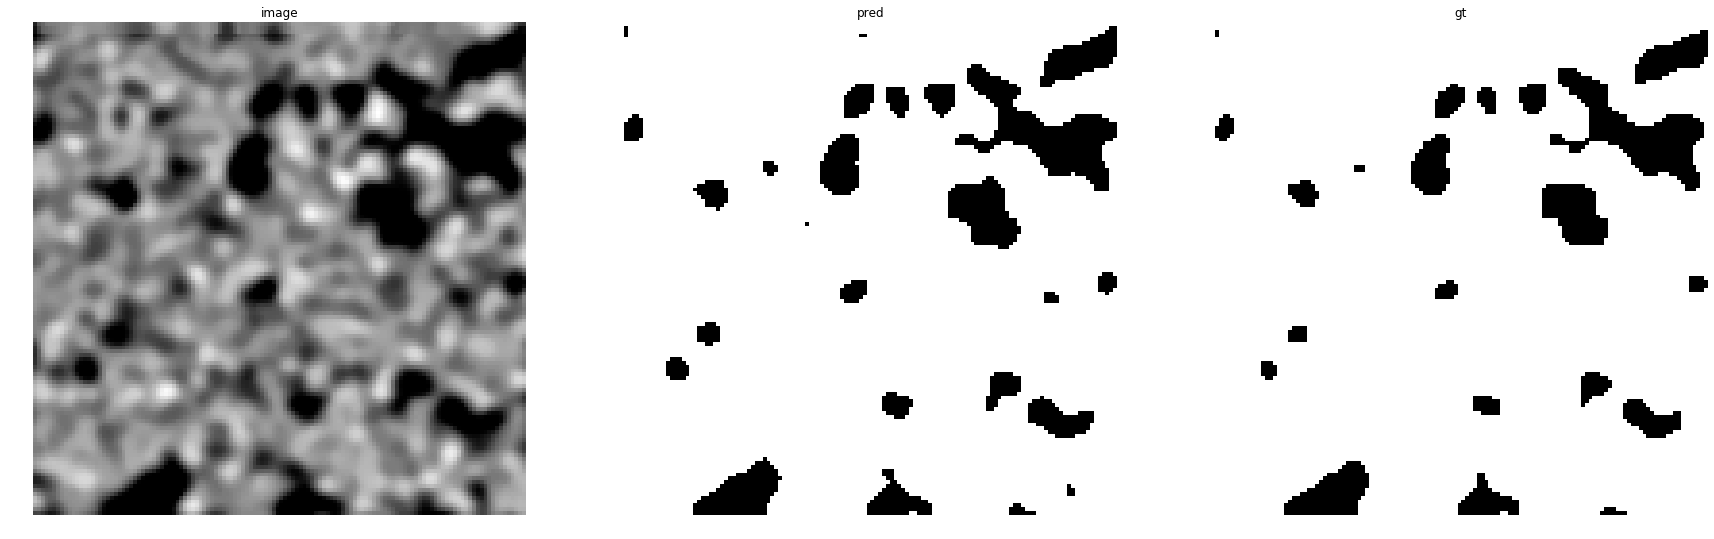

accuracy    : 0.98553466796875
precision   : 0.9997232982844494
recall      : 0.984133469526728
f1          : 0.9918671287876188
pr_auc      : 0.9999286892548902
iou         : 0.9838654775682484


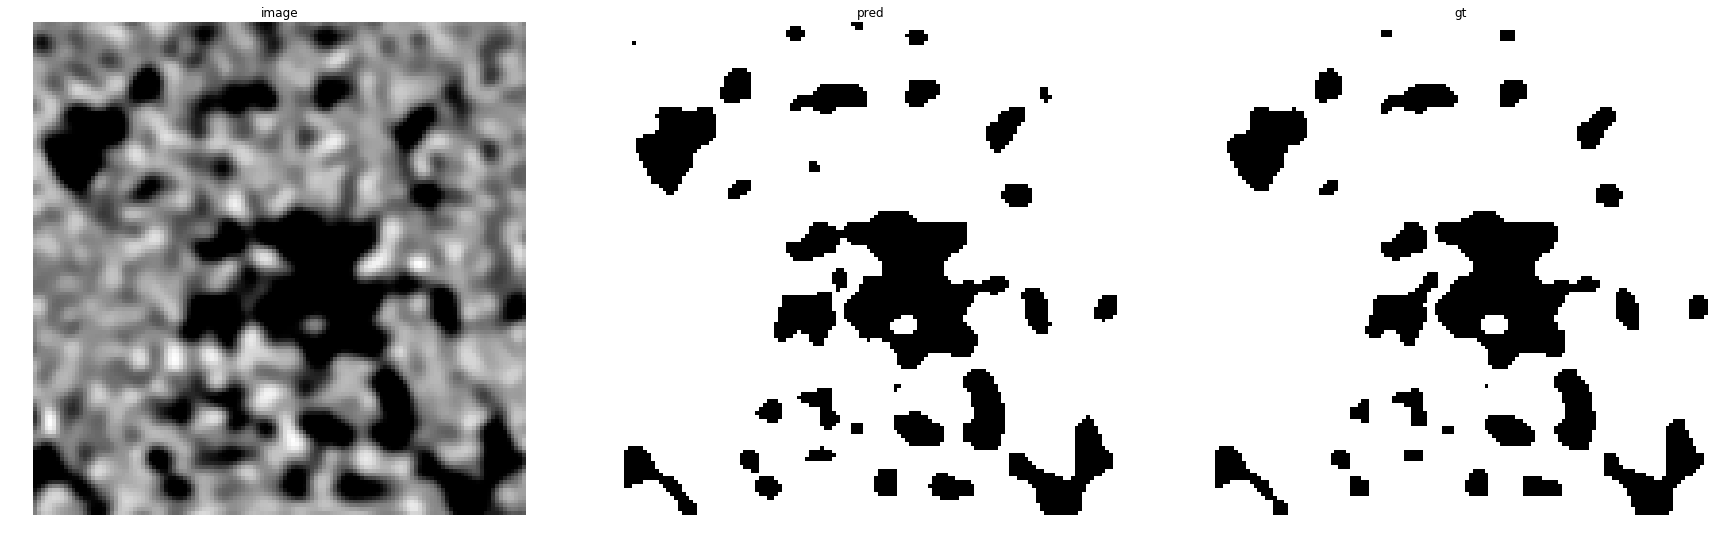

accuracy    : 0.9825439453125
precision   : 0.9989546778167699
recall      : 0.9800747198007472
f1          : 0.9894246413252477
pr_auc      : 0.9998641776963442
iou         : 0.9790706183680936


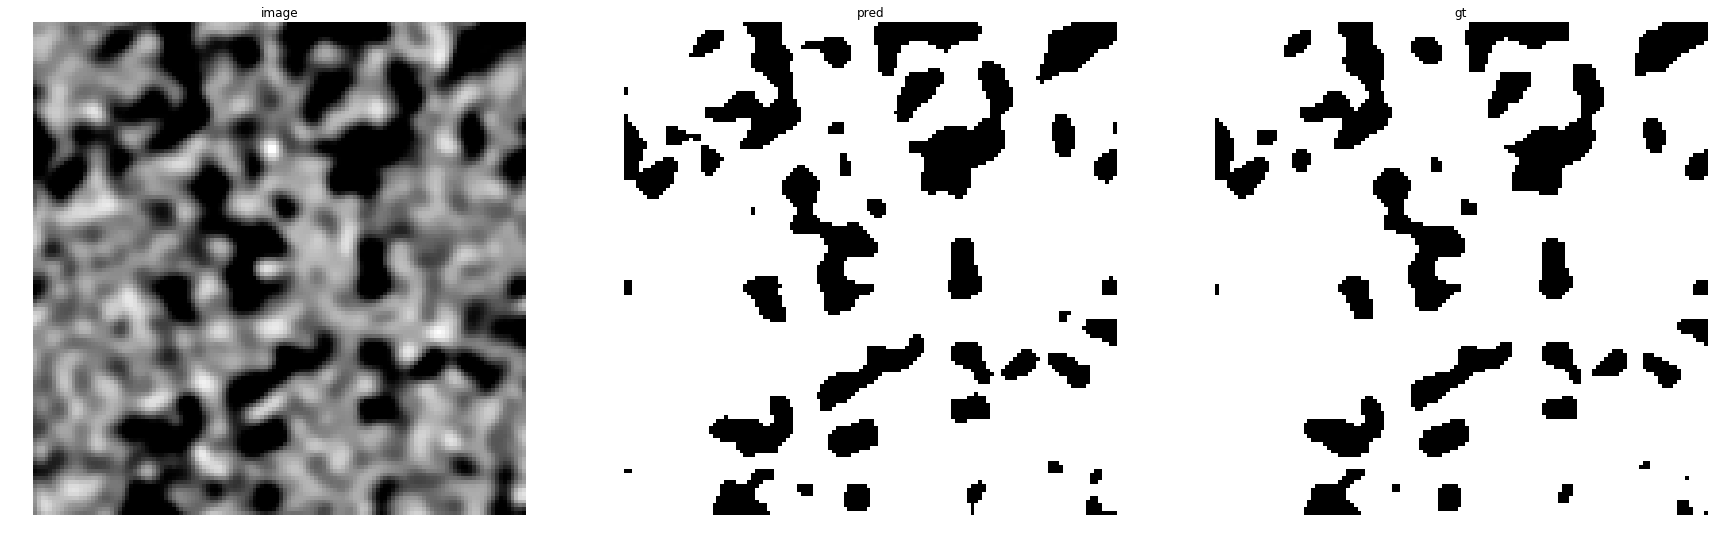

accuracy    : 0.9765625
precision   : 0.9992376305557673
recall      : 0.9722572509457755
f1          : 0.9855628242725017
pr_auc      : 0.9997770343054523
iou         : 0.9715365799421837


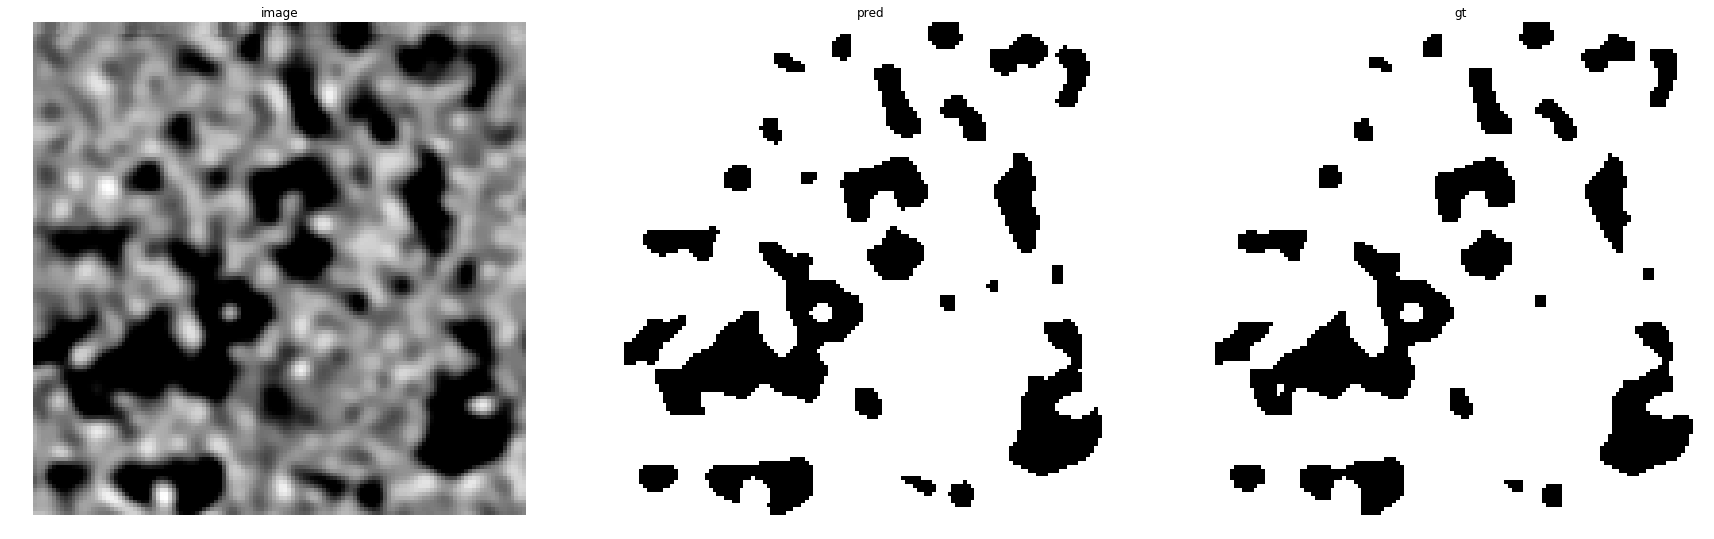

accuracy    : 0.977783203125
precision   : 0.9996185244525826
recall      : 0.9733303617859
f1          : 0.9862993074375188
pr_auc      : 0.9997992705495119
iou         : 0.9729689588593494


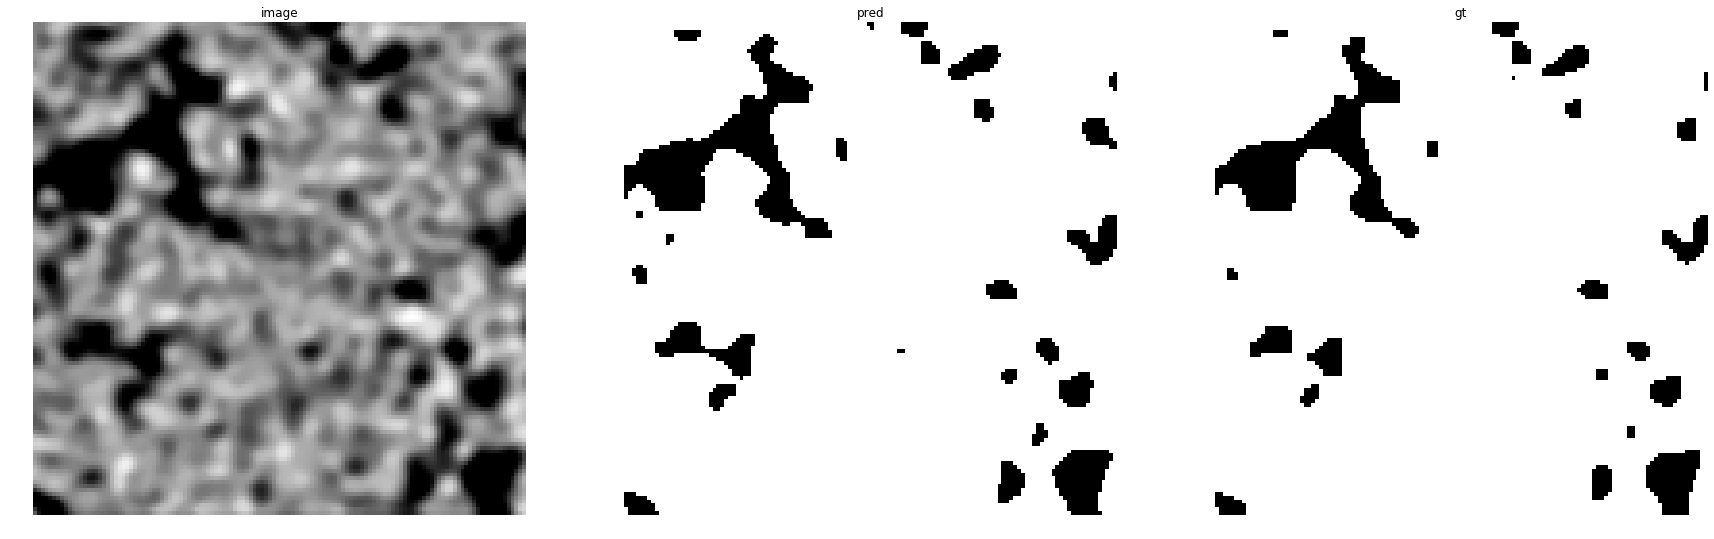

accuracy    : 0.98406982421875
precision   : 0.9997258959775235
recall      : 0.9826889397817594
f1          : 0.9911342097217976
pr_auc      : 0.9999418442194681
iou         : 0.9824242424242424


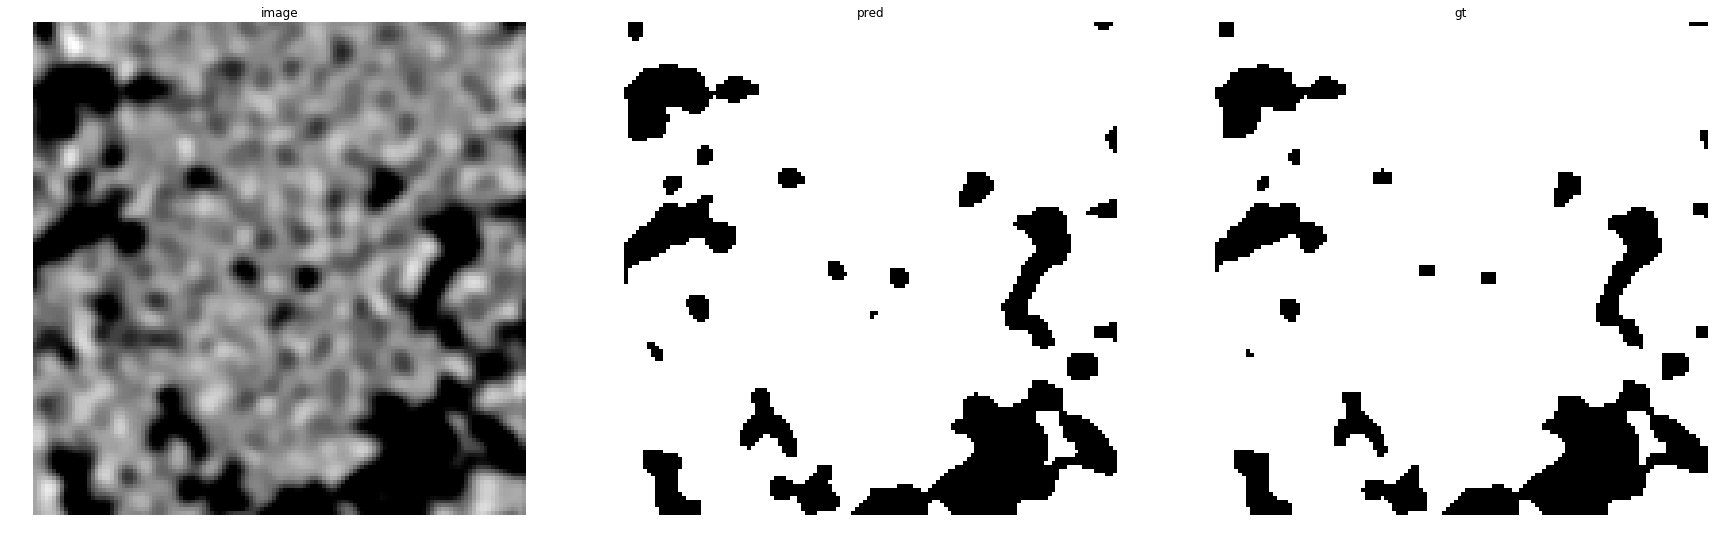

accuracy    : 0.98089599609375
precision   : 0.998828611172121
recall      : 0.9786944045911047
f1          : 0.988659009384398
pr_auc      : 0.9998513702591622
iou         : 0.9775723703066781


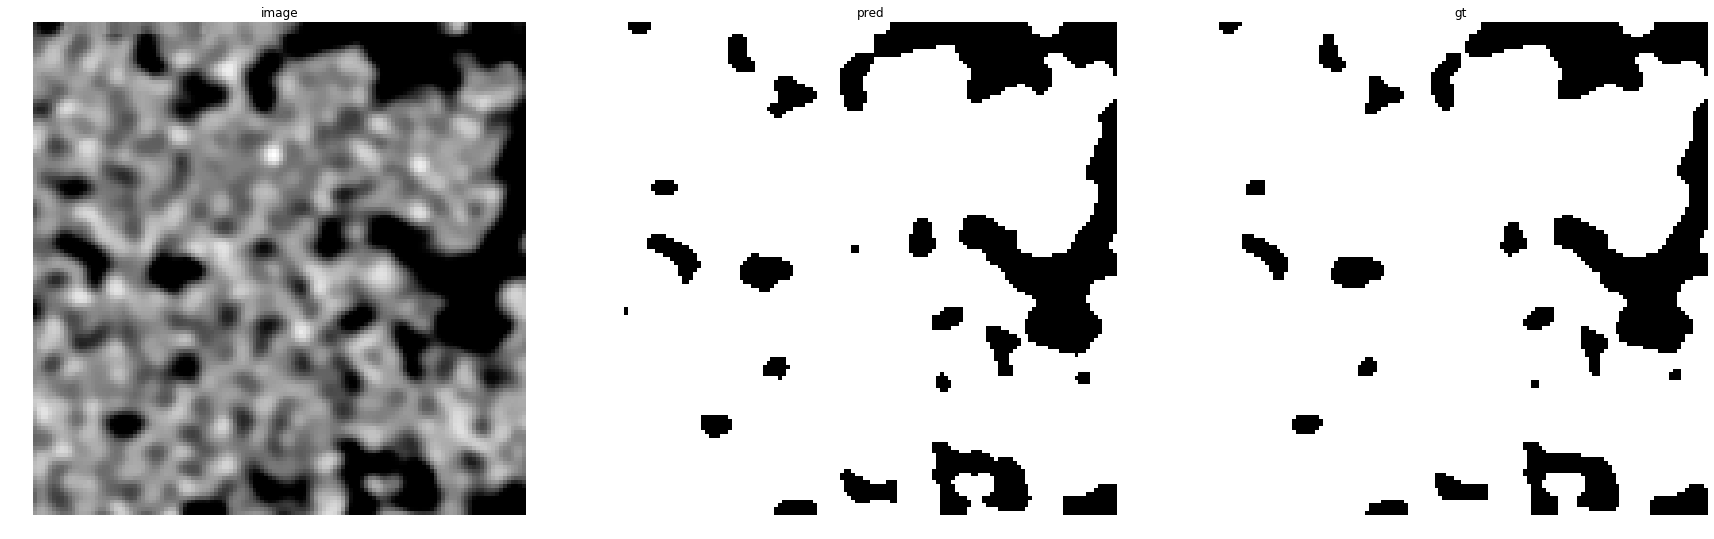

accuracy    : 0.9859619140625
precision   : 0.9994100730034658
recall      : 0.9838838475499092
f1          : 0.9915861867134913
pr_auc      : 0.999926144910876
iou         : 0.983312776608866


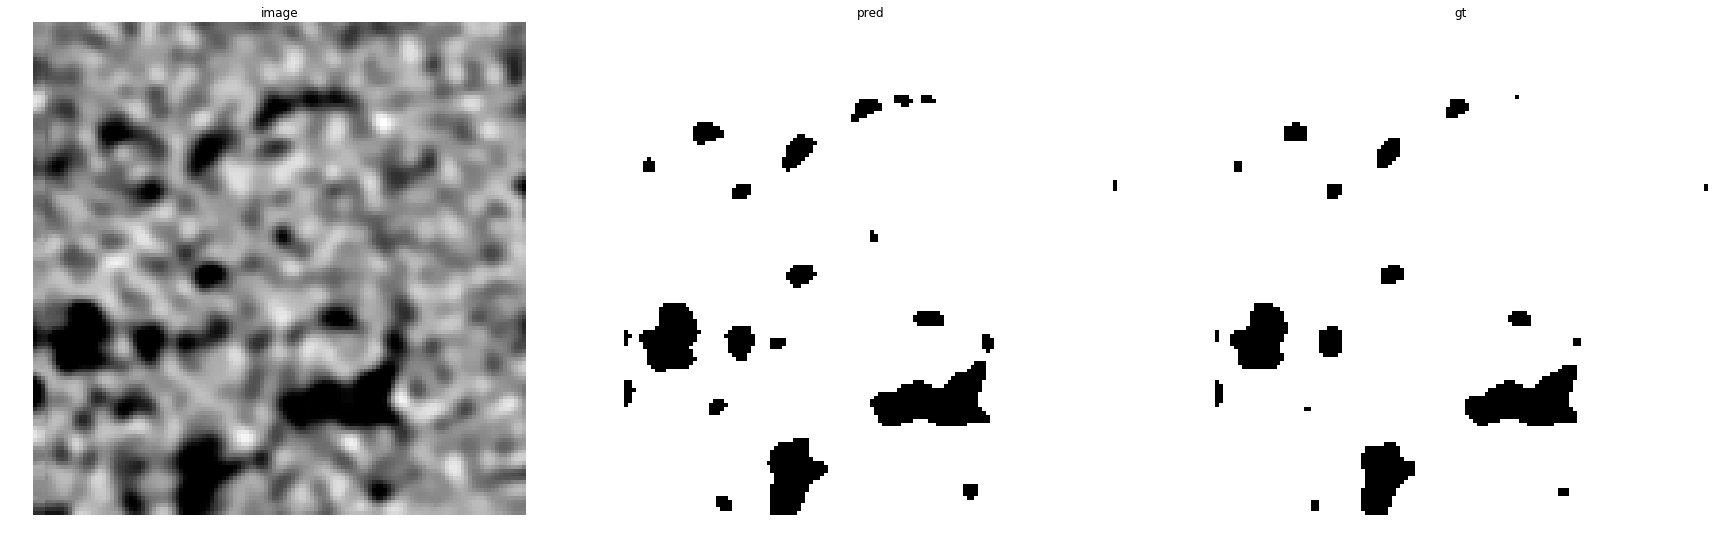

accuracy    : 0.98828125
precision   : 0.9999346618752042
recall      : 0.9876734430461439
f1          : 0.9937662337662337
pr_auc      : 0.9999603102976198
iou         : 0.9876097057305111


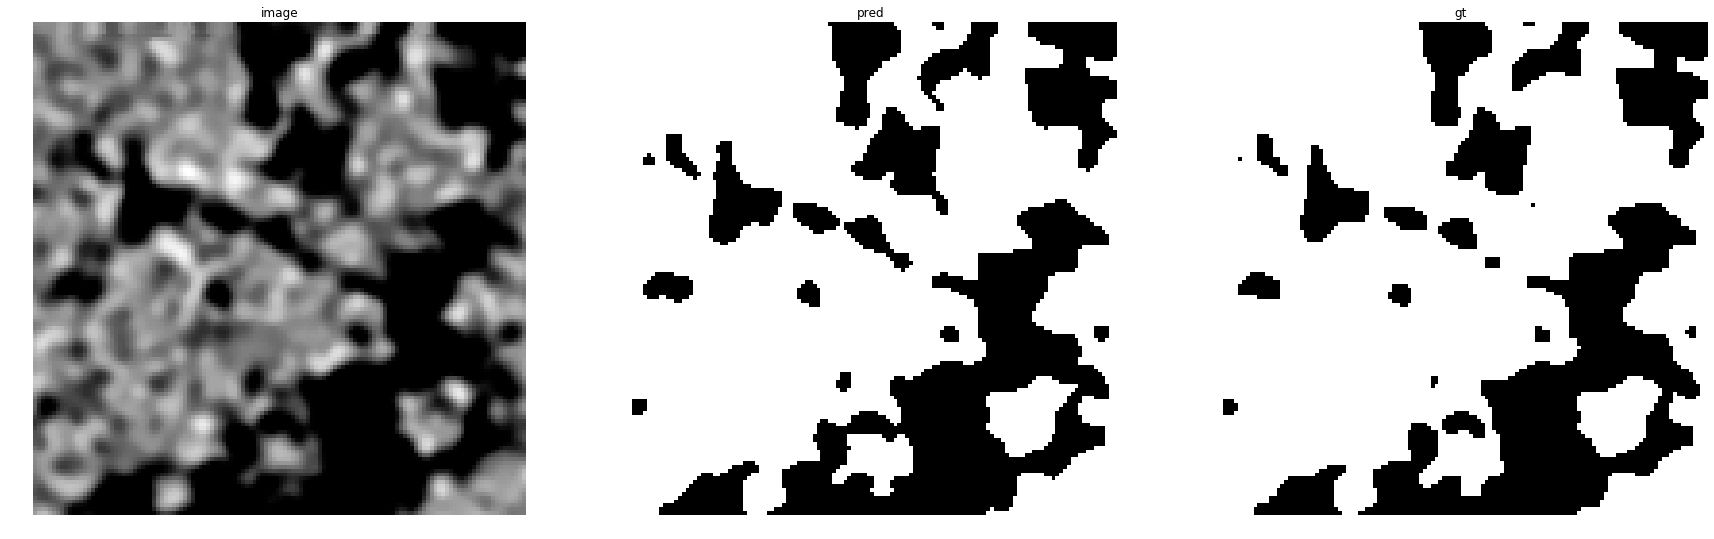

accuracy    : 0.9786376953125
precision   : 0.9981520591341078
recall      : 0.9718128855380398
f1          : 0.9848063899982635
pr_auc      : 0.9996775065283539
iou         : 0.9700675617891046


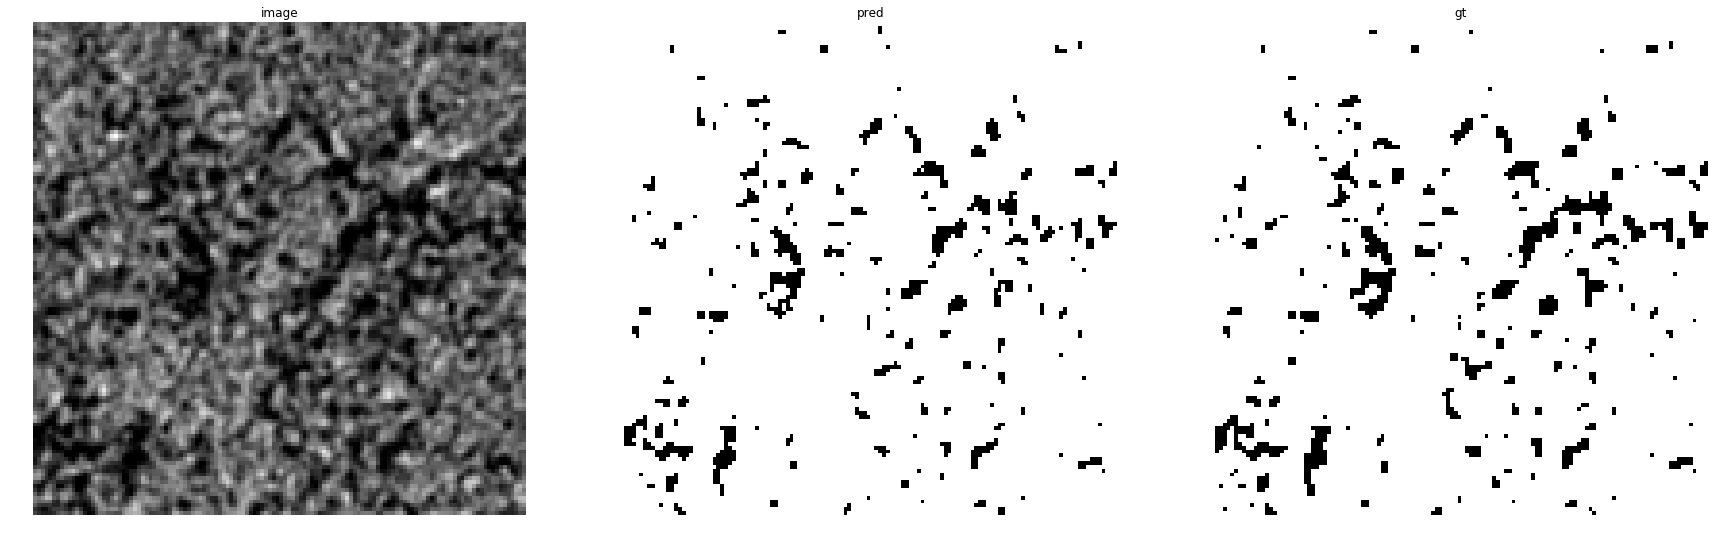

accuracy    : 0.98309326171875
precision   : 0.9830695381421899
recall      : 0.9989453562718345
f1          : 0.9909438650407035
pr_auc      : 0.9998127014085495
iou         : 0.9820502851218248


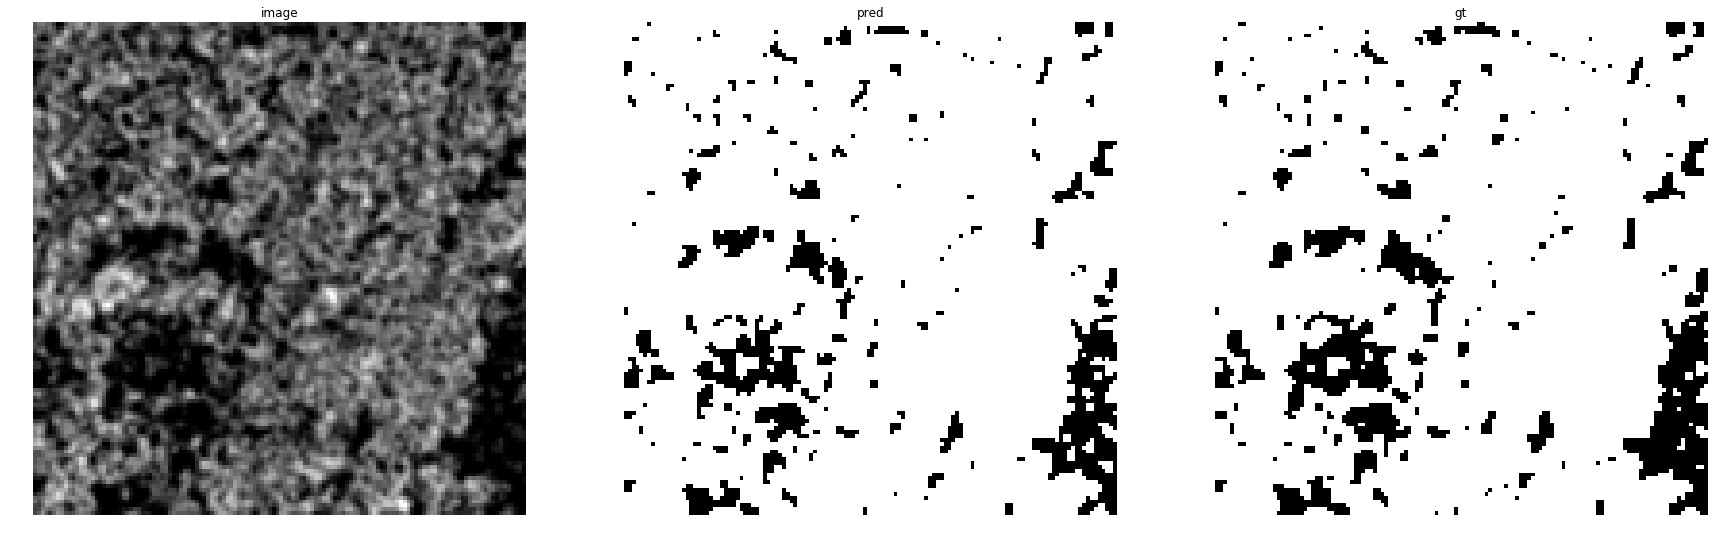

accuracy    : 0.97442626953125
precision   : 0.9726877715704532
recall      : 0.9983717966869602
f1          : 0.9853624454148472
pr_auc      : 0.9995896104503534
iou         : 0.9711472249001515


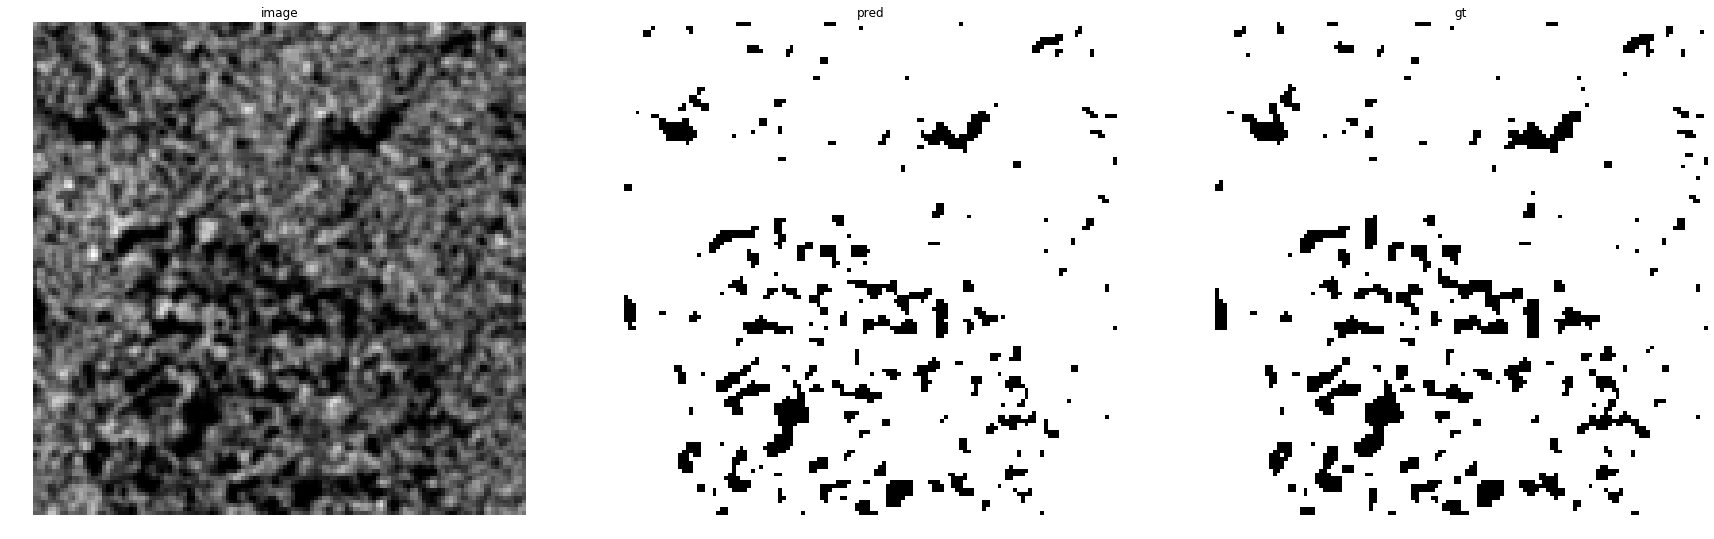

accuracy    : 0.9810791015625
precision   : 0.9798389779759132
recall      : 0.9995248761284192
f1          : 0.9895840333310935
pr_auc      : 0.9997720855327283
iou         : 0.9793828145783453


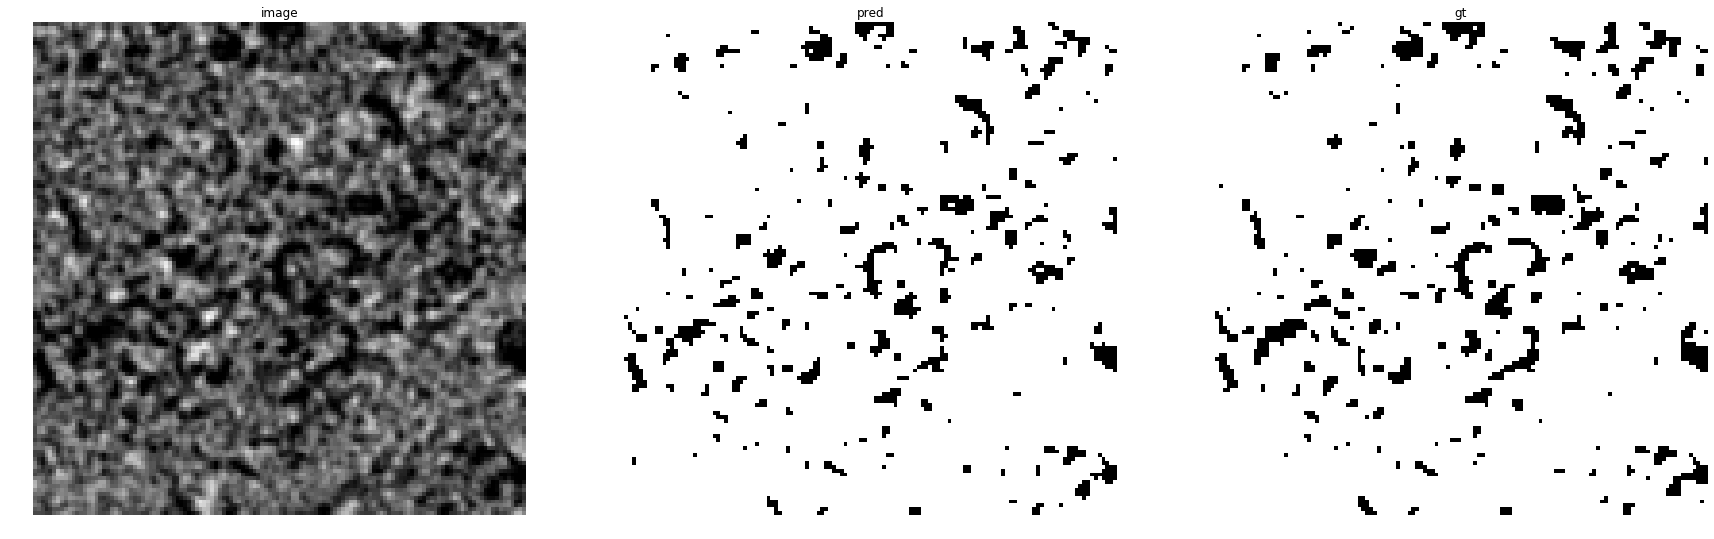

accuracy    : 0.9796142578125
precision   : 0.9799682665608885
recall      : 0.9979130200619362
f1          : 0.9888592394929954
pr_auc      : 0.9997289825904904
iou         : 0.9779639770403115


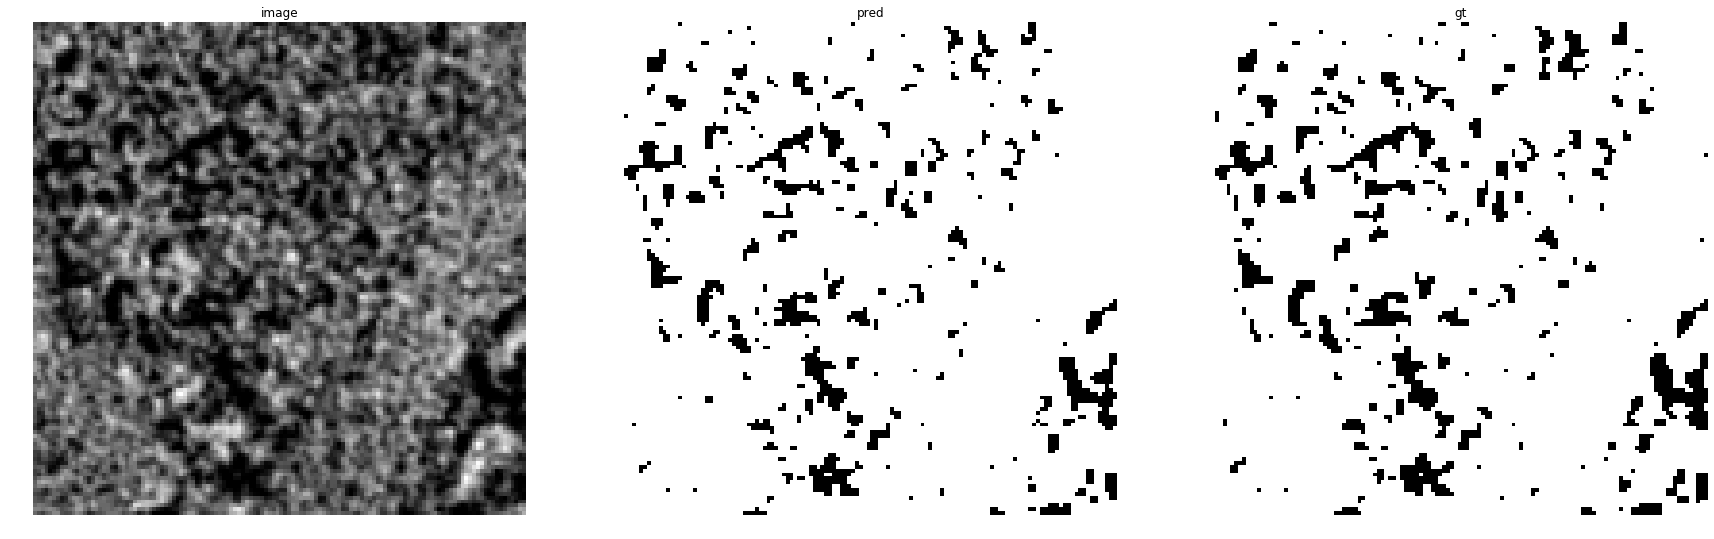

accuracy    : 0.97857666015625
precision   : 0.9780707655051796
recall      : 0.9982835564709921
f1          : 0.9880737997349733
pr_auc      : 0.9996856583716313
iou         : 0.9764287153314082


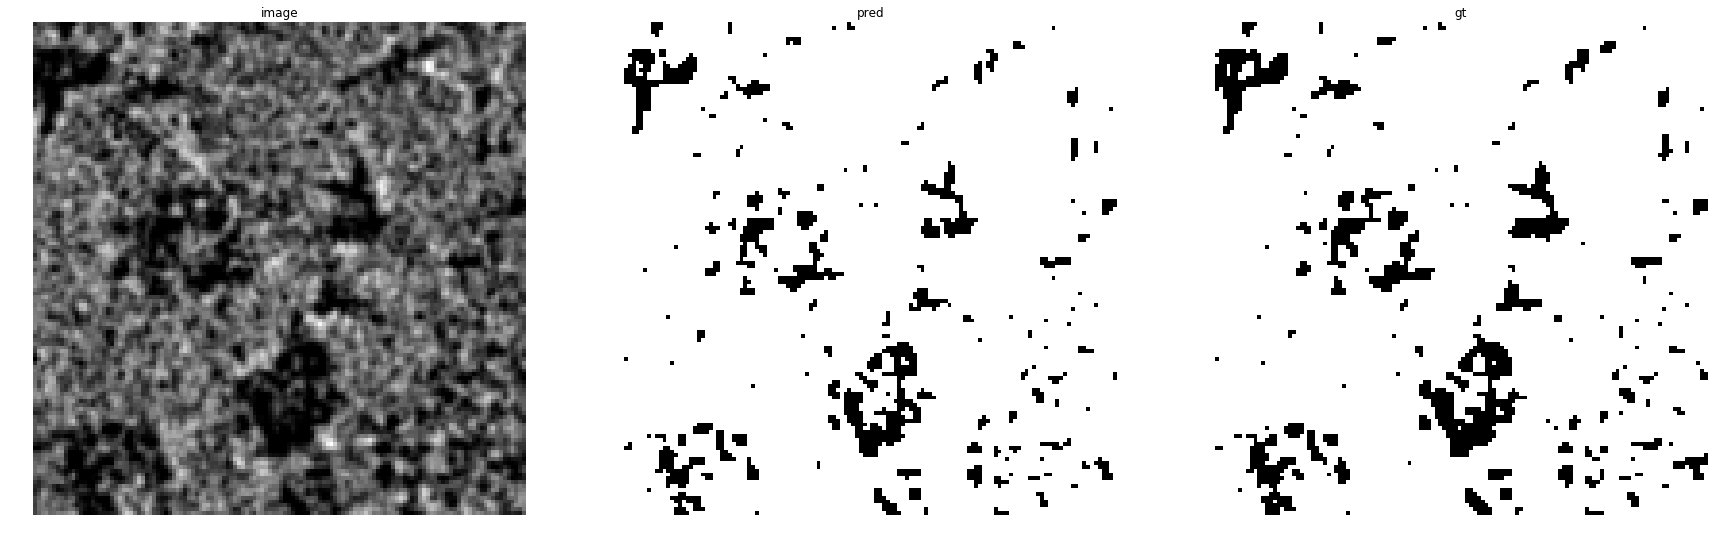

accuracy    : 0.97900390625
precision   : 0.978317259727303
recall      : 0.9987777551436138
f1          : 0.9884416369867616
pr_auc      : 0.9997152768522428
iou         : 0.9771474124759184


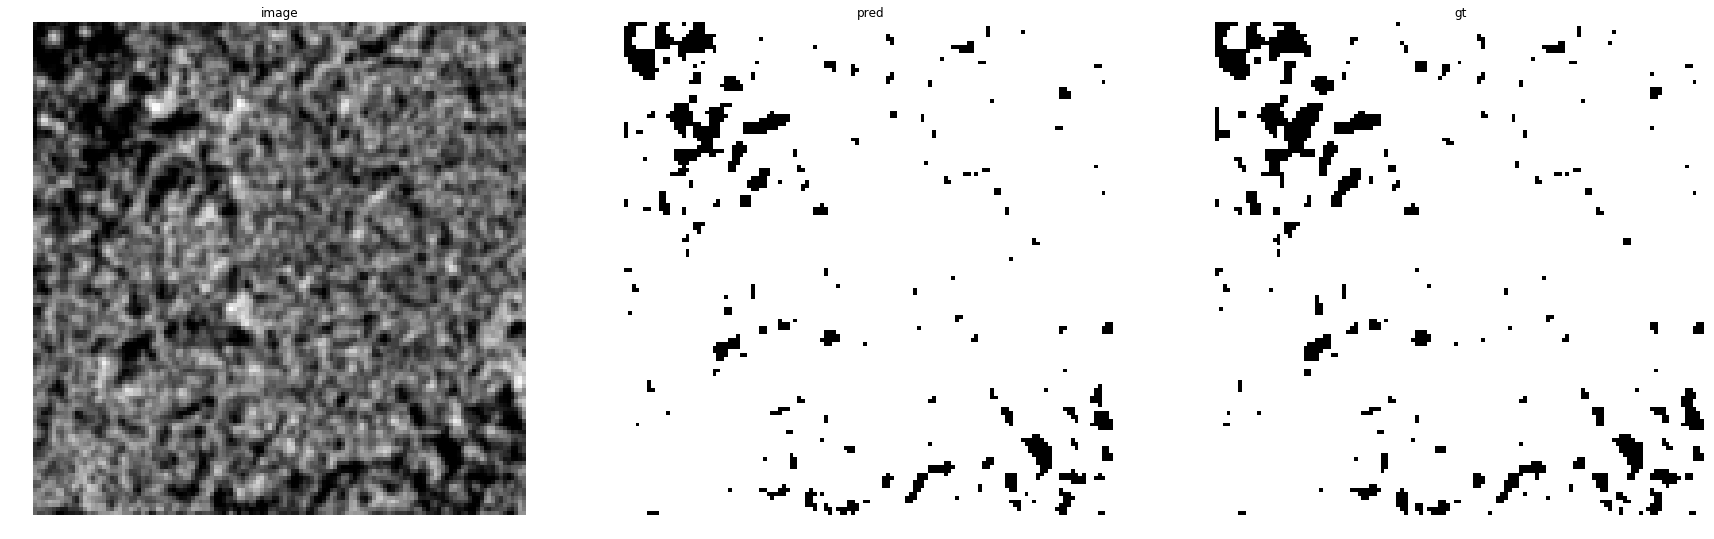

accuracy    : 0.9869384765625
precision   : 0.9870670046142848
recall      : 0.9990133526277708
f1          : 0.9930042497548218
pr_auc      : 0.9998742812867056
iou         : 0.986105700558369


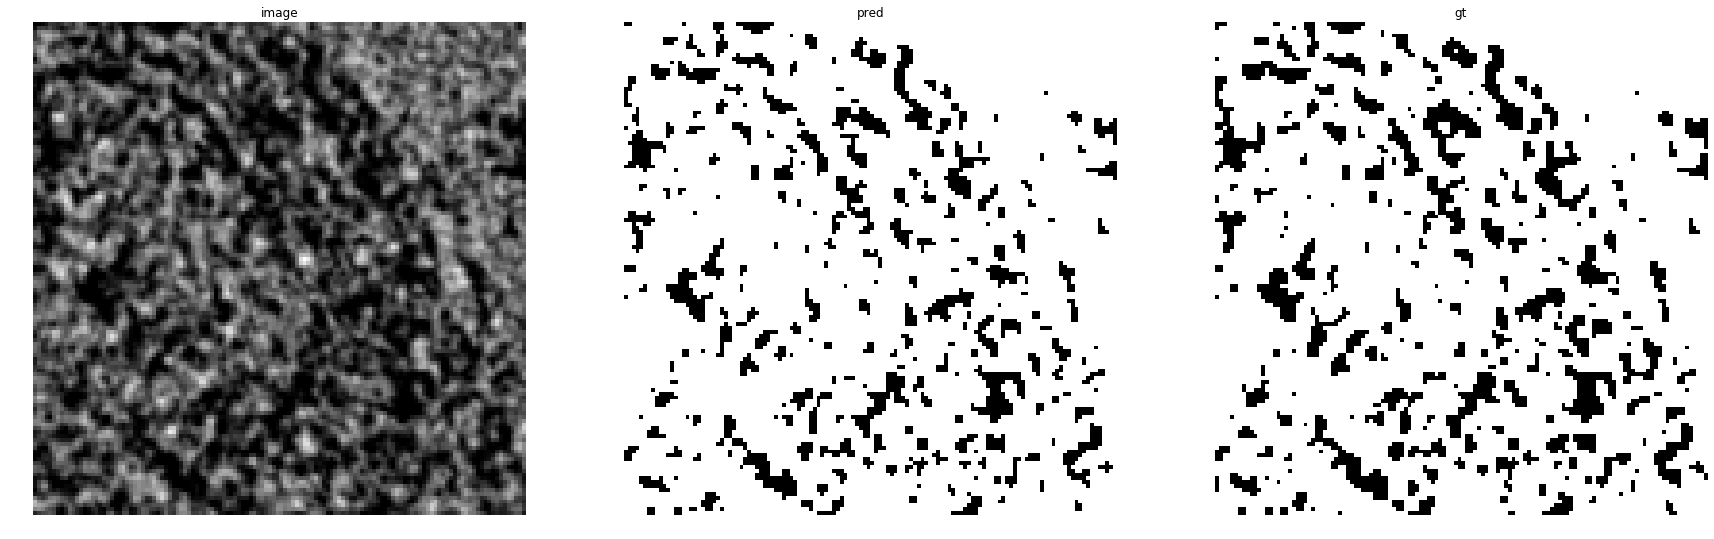

accuracy    : 0.96142578125
precision   : 0.9572059242381088
recall      : 0.9976992726732967
f1          : 0.9770332146231557
pr_auc      : 0.9990859191812727
iou         : 0.9550976909413854


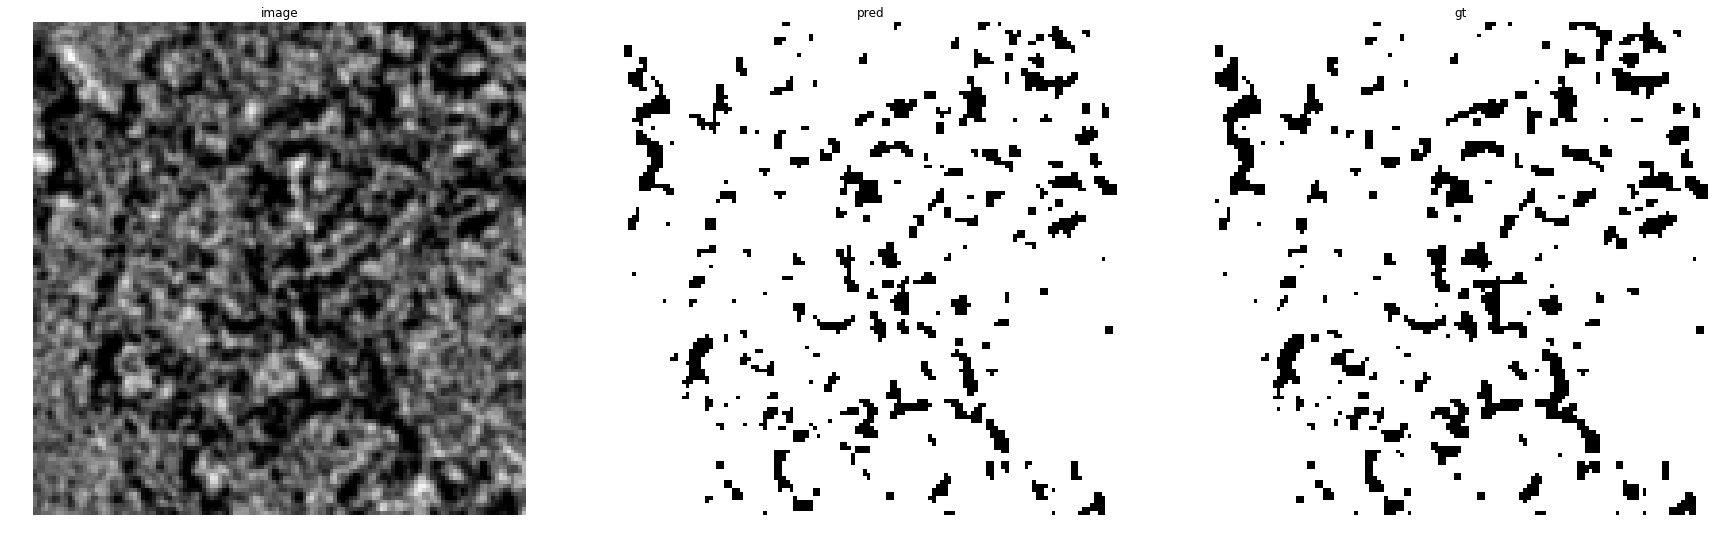

accuracy    : 0.973388671875
precision   : 0.9721123687440338
recall      : 0.9981097731727807
f1          : 0.9849395509499137
pr_auc      : 0.9995579078610665
iou         : 0.9703260055808889


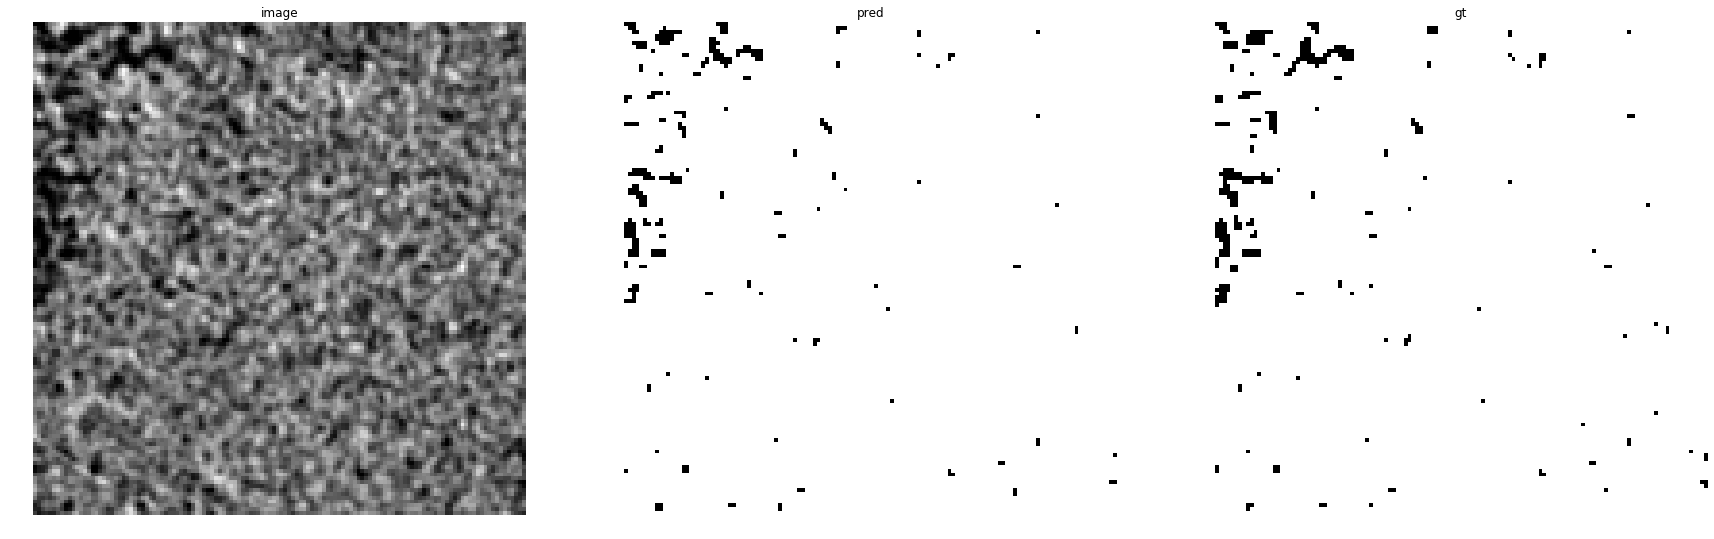

accuracy    : 0.994873046875
precision   : 0.9955237799191794
recall      : 0.9992511700468019
f1          : 0.997383992525693
pr_auc      : 0.9999755659421853
iou         : 0.9947816363297509


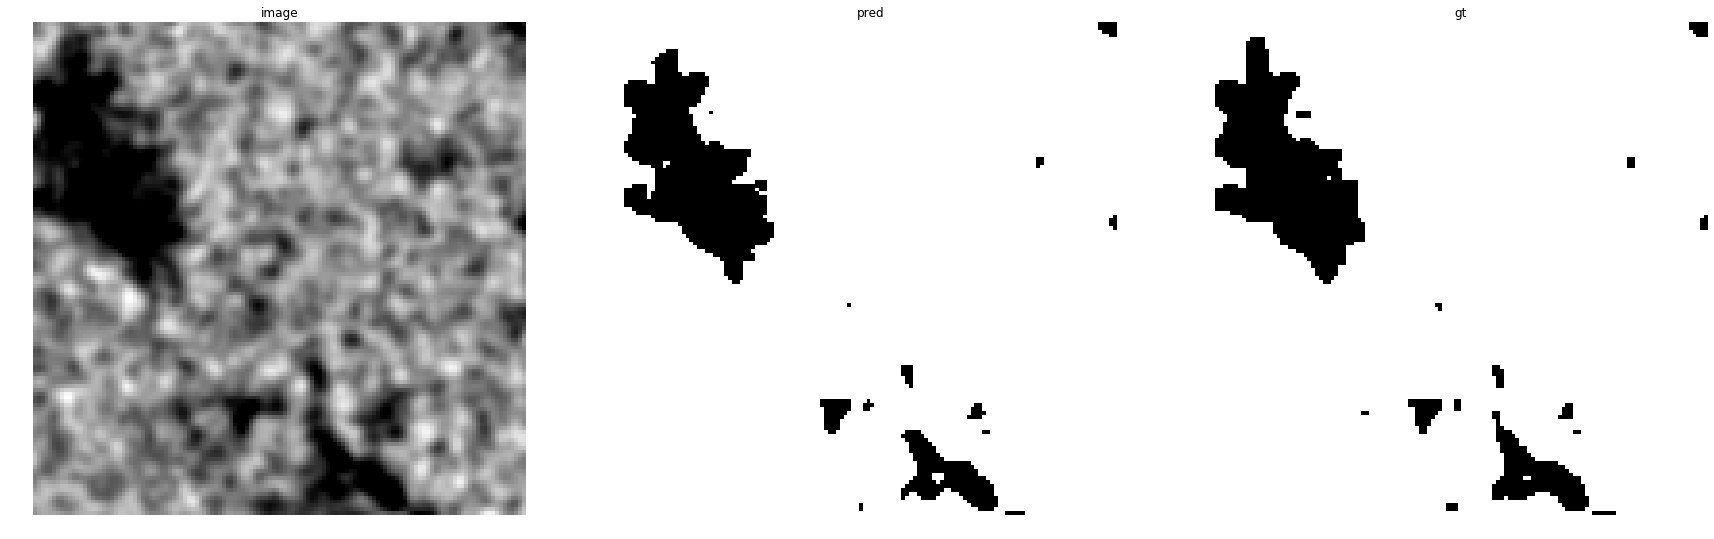

accuracy    : 0.99114990234375
precision   : 0.9913090345617462
recall      : 0.9989137813985064
f1          : 0.9950968789098164
pr_auc      : 0.999927297152988
iou         : 0.9902416044148328


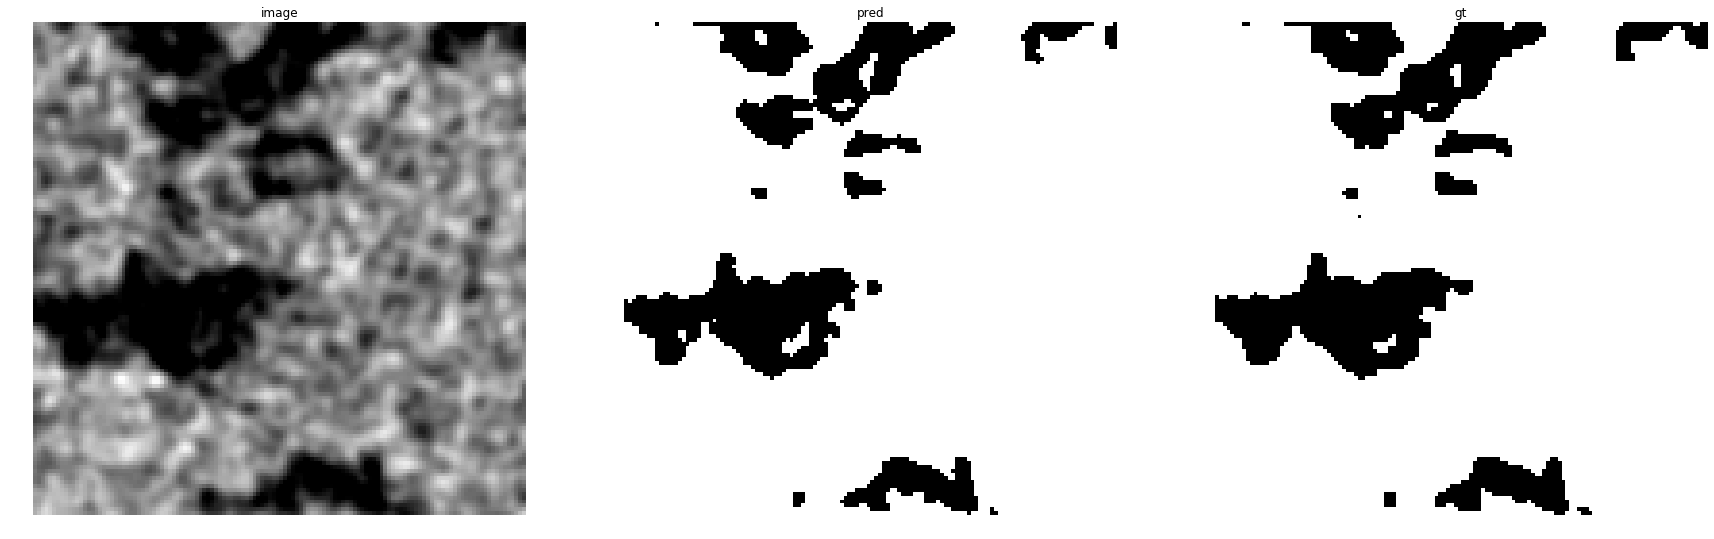

accuracy    : 0.9853515625
precision   : 0.9844265824601693
recall      : 0.9983260553129549
f1          : 0.991327599913276
pr_auc      : 0.9998290104614005
iou         : 0.9828043275775596


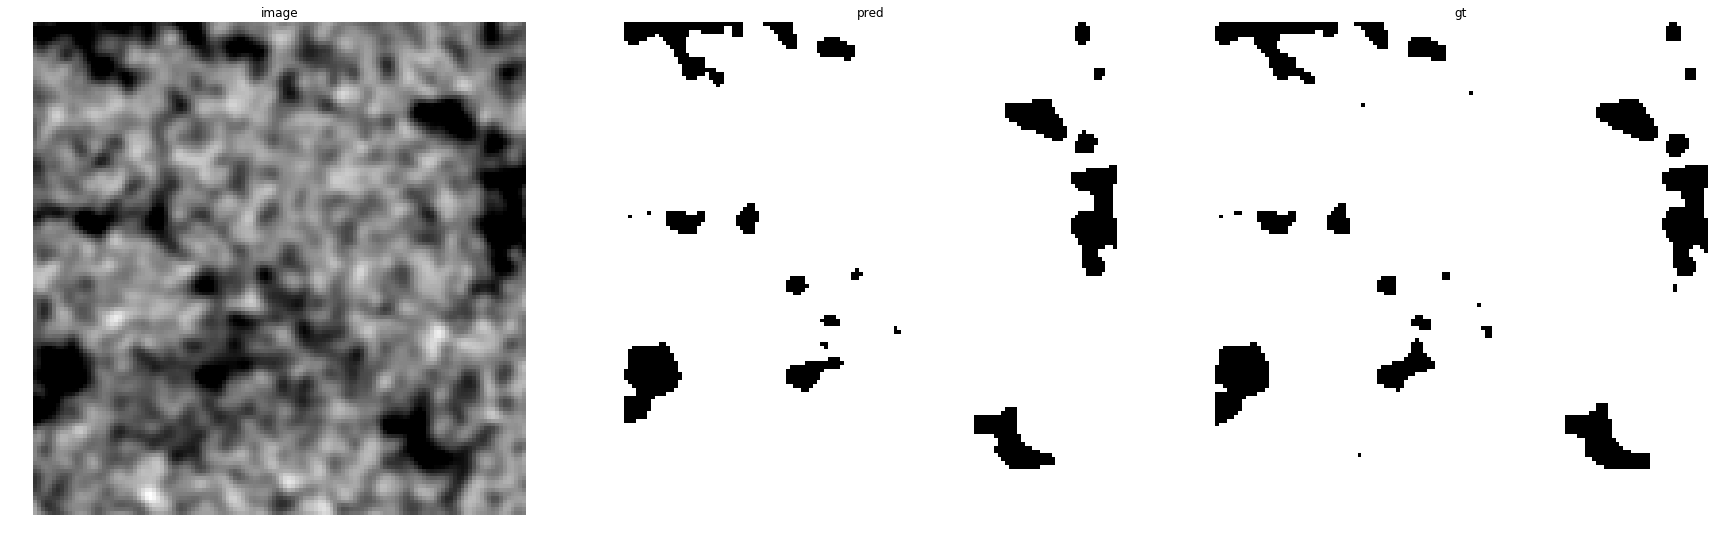

accuracy    : 0.99102783203125
precision   : 0.9920221533592668
recall      : 0.9982749469214437
f1          : 0.995138728132544
pr_auc      : 0.9999452759671157
iou         : 0.9903244915421576


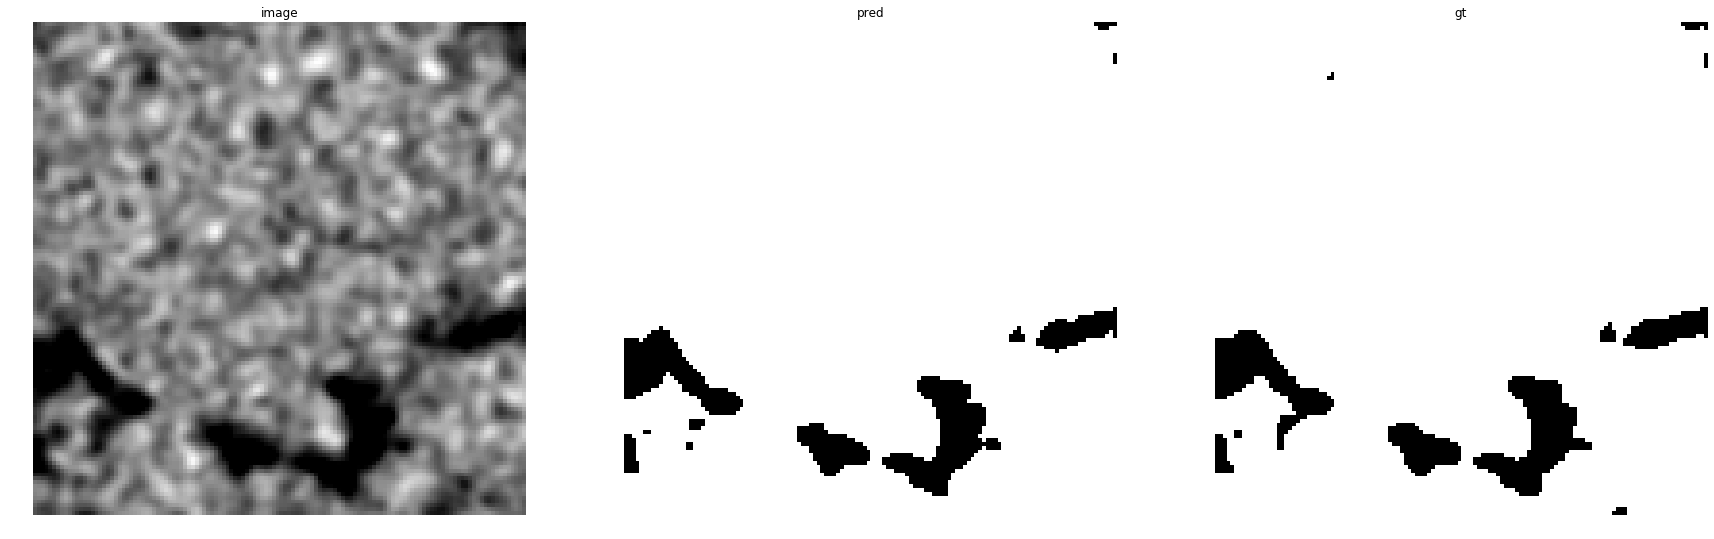

accuracy    : 0.99462890625
precision   : 0.9949099451840251
recall      : 0.9993445201887782
f1          : 0.9971223021582735
pr_auc      : 0.9999782026303858
iou         : 0.994261119081779


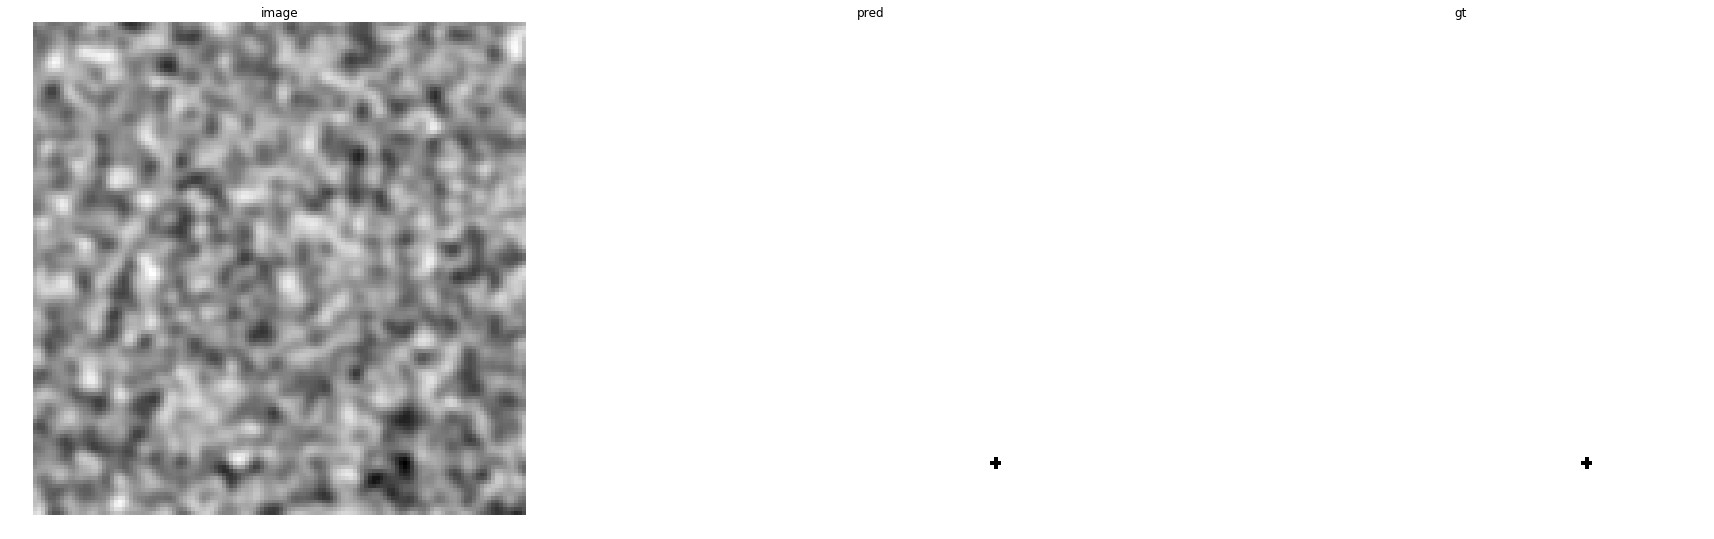

accuracy    : 1.0
precision   : 1.0
recall      : 1.0
f1          : 1.0
pr_auc      : 1.0
iou         : 1.0


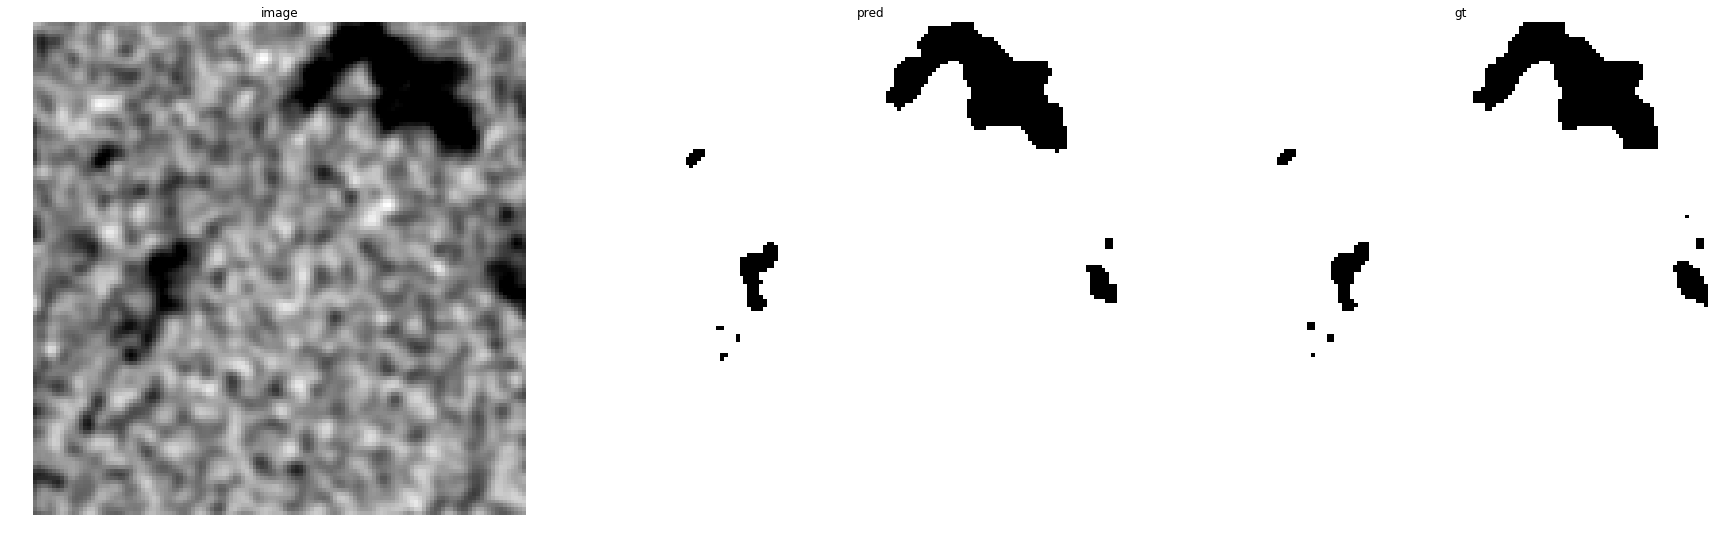

accuracy    : 0.99658203125
precision   : 0.9972218632898308
recall      : 0.9991584671154842
f1          : 0.9981892258940698
pr_auc      : 0.9999903837716401
iou         : 0.9963849977406236


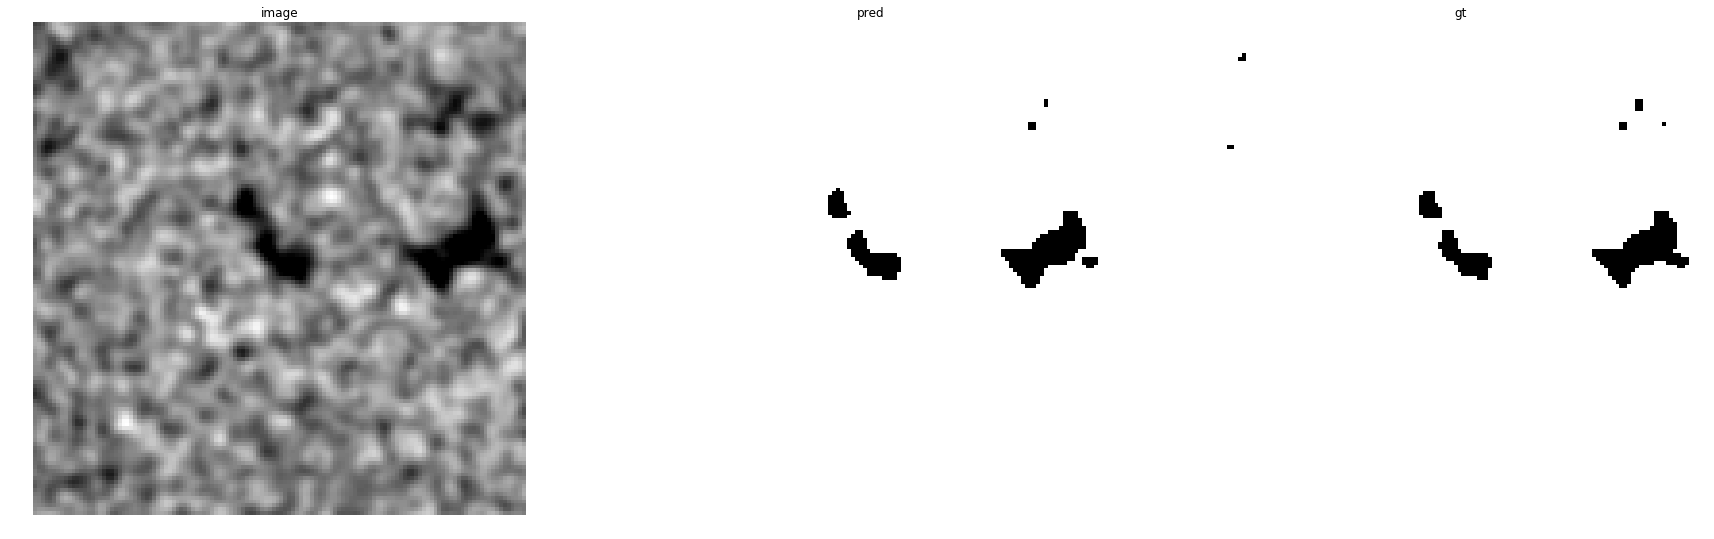

accuracy    : 0.997802734375
precision   : 0.9985667102885275
recall      : 0.9991893745713039
f1          : 0.9988779453933424
pr_auc      : 0.9999958625645508
iou         : 0.997758405977584


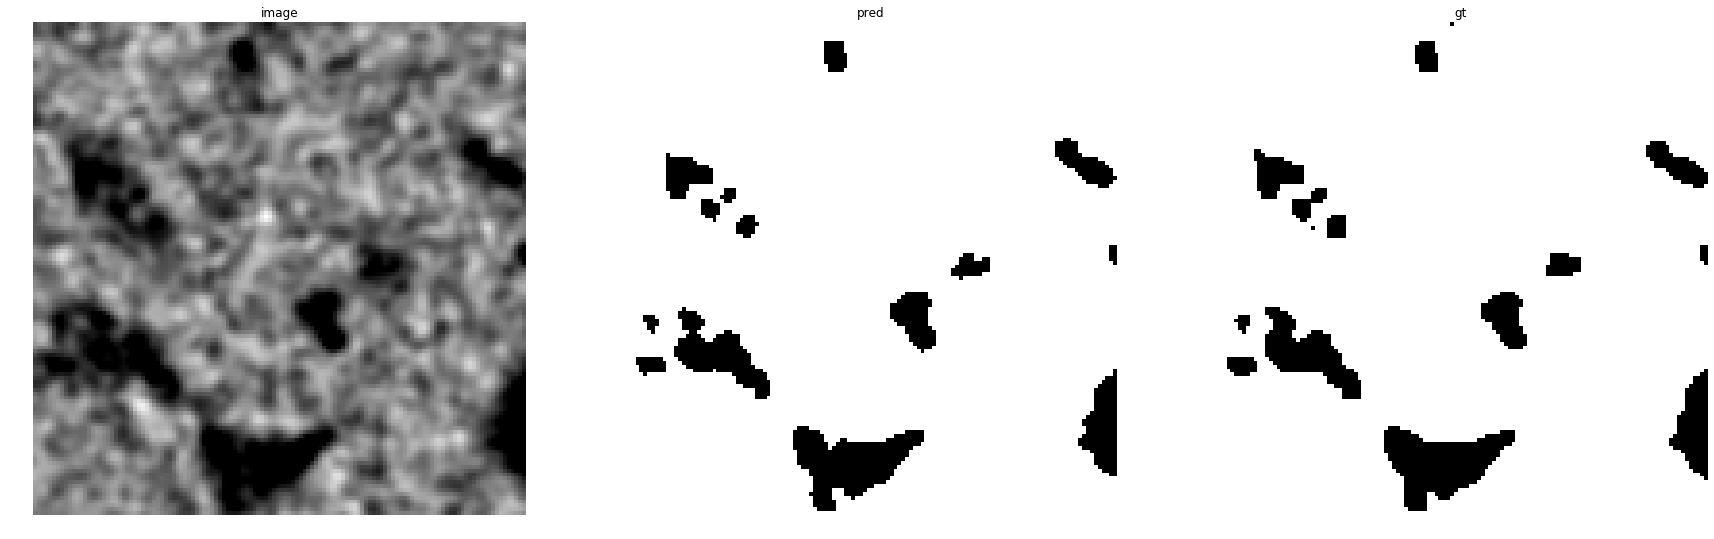

accuracy    : 0.99383544921875
precision   : 0.994953854325742
recall      : 0.9983344437041972
f1          : 0.9966412822985602
pr_auc      : 0.9999620556002163
iou         : 0.9933050510407


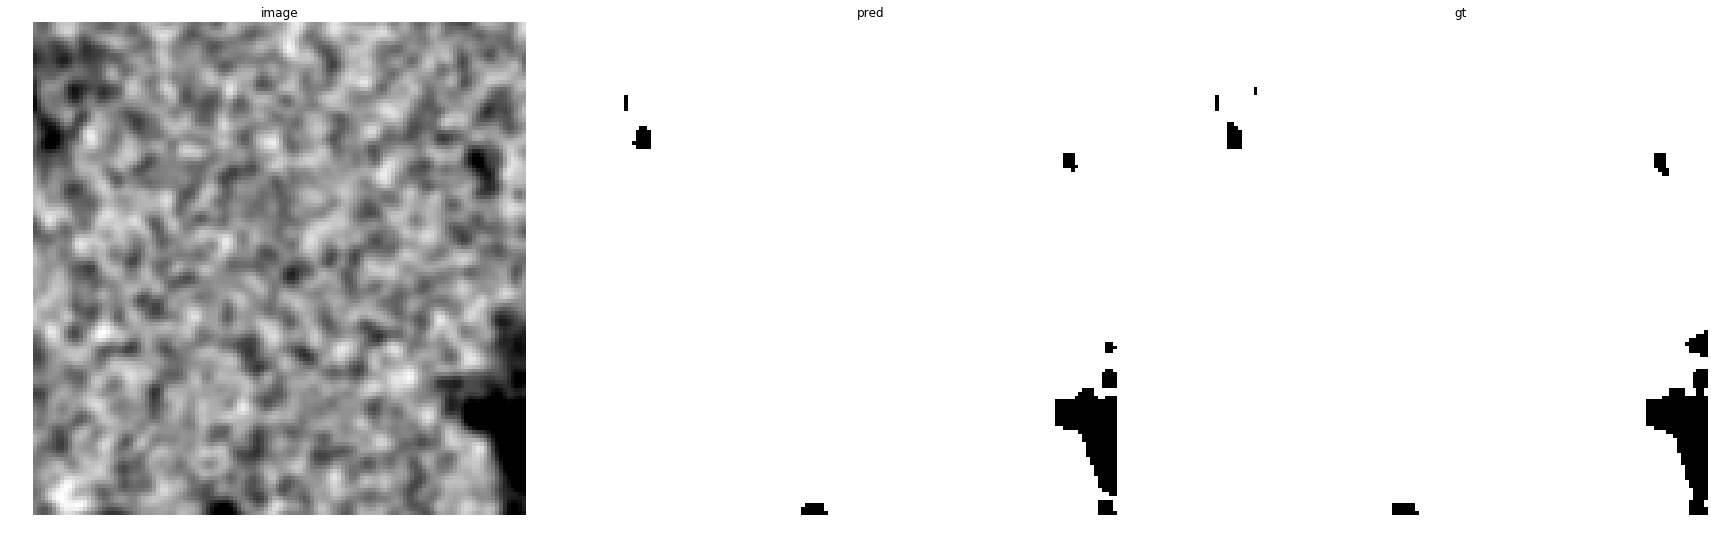

accuracy    : 0.996826171875
precision   : 0.99700524082855
recall      : 0.9997497497497497
f1          : 0.9983756091465701
pr_auc      : 0.9999903115124519
iou         : 0.9967564870259481


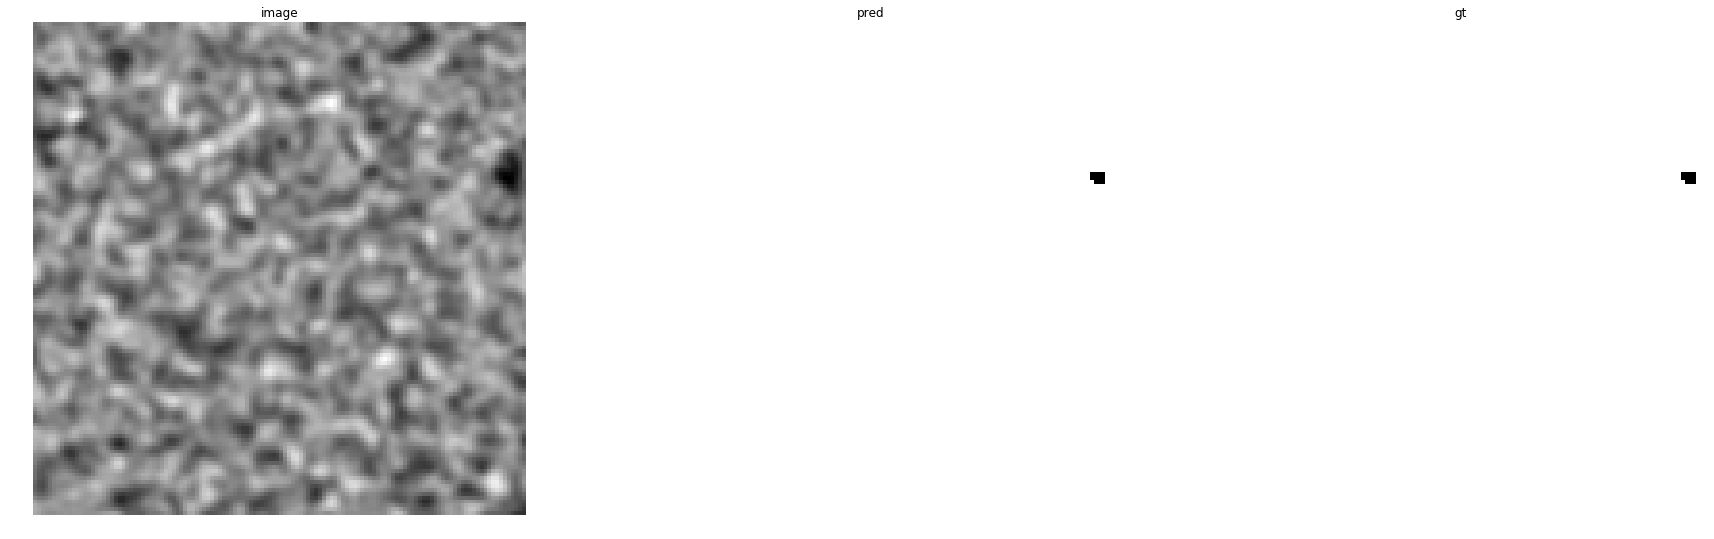

accuracy    : 1.0
precision   : 1.0
recall      : 1.0
f1          : 1.0
pr_auc      : 1.0
iou         : 1.0


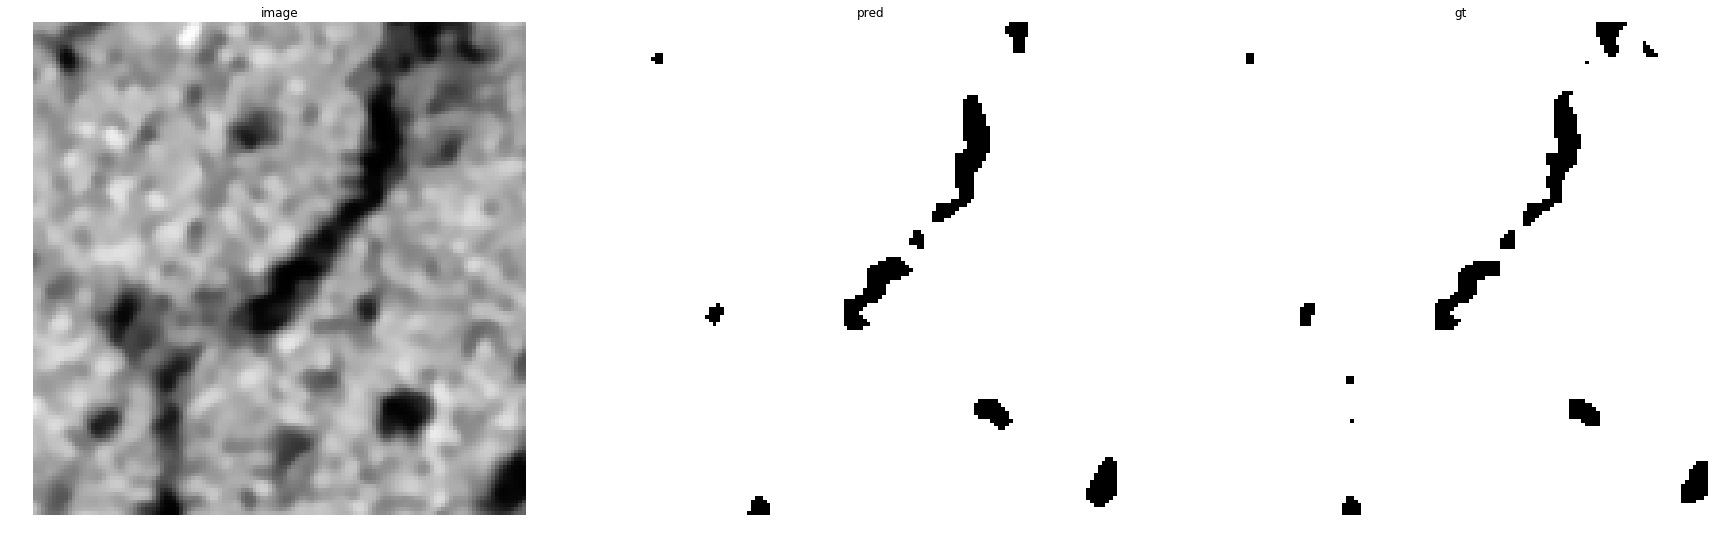

accuracy    : 0.993896484375
precision   : 0.9973501577287066
recall      : 0.9963443842178242
f1          : 0.9968470172783452
pr_auc      : 0.9999663317912706
iou         : 0.9937138546643198


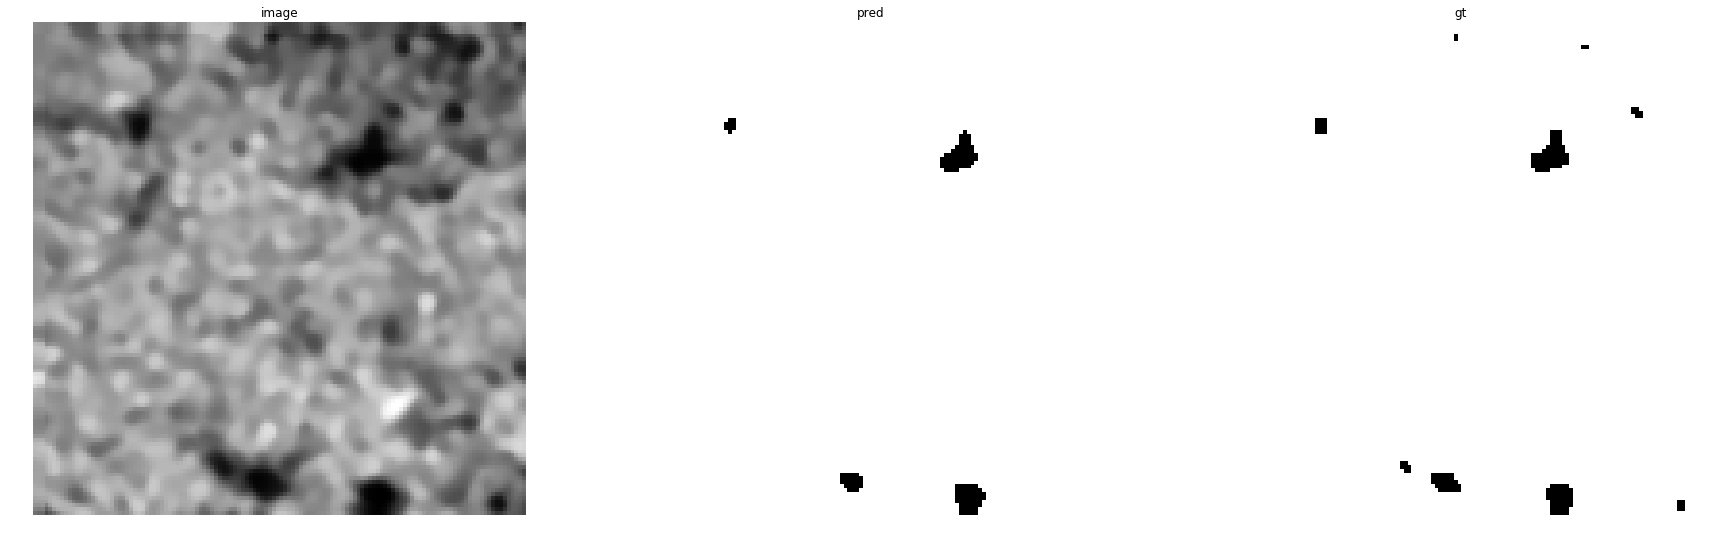

accuracy    : 0.9974365234375
precision   : 0.9976596661944941
recall      : 0.9997531321360242
f1          : 0.9987053020961777
pr_auc      : 0.9999907399962933
iou         : 0.997413952342836


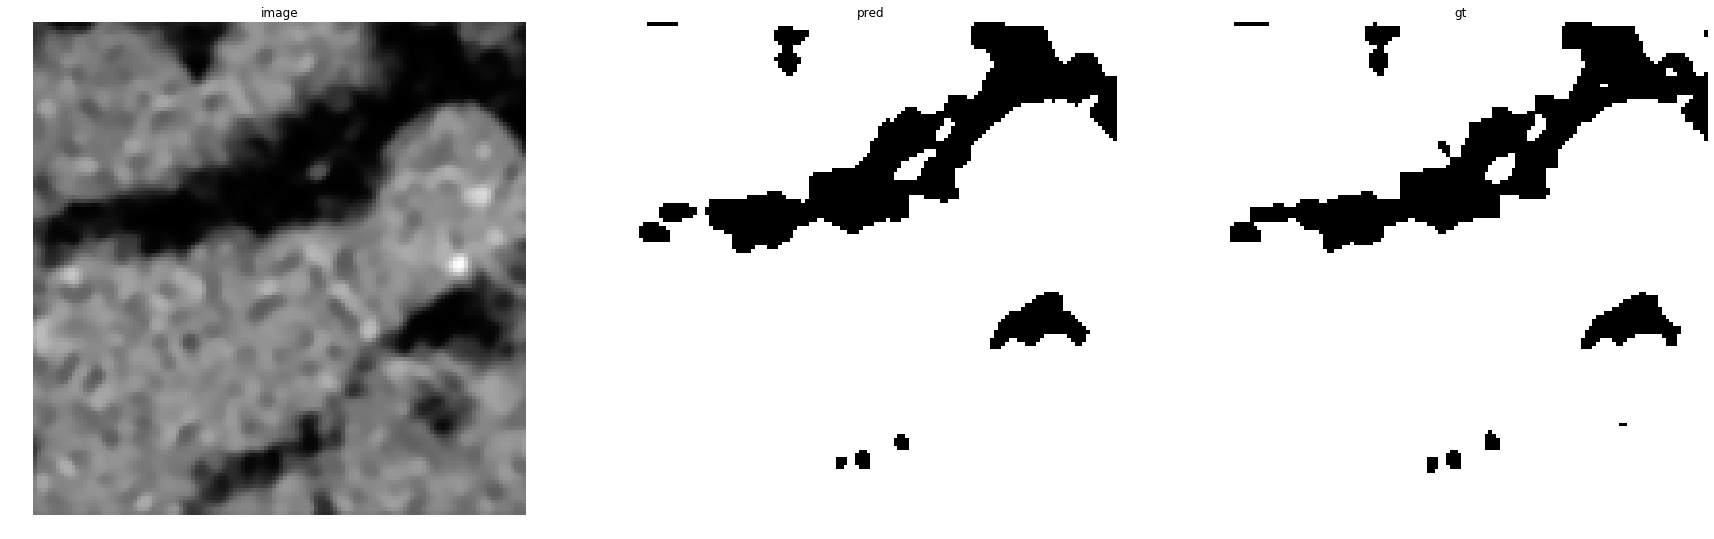

accuracy    : 0.99017333984375
precision   : 0.99507839415032
recall      : 0.993611345127773
f1          : 0.9943443285207433
pr_auc      : 0.999912139613161
iou         : 0.9887522705044013


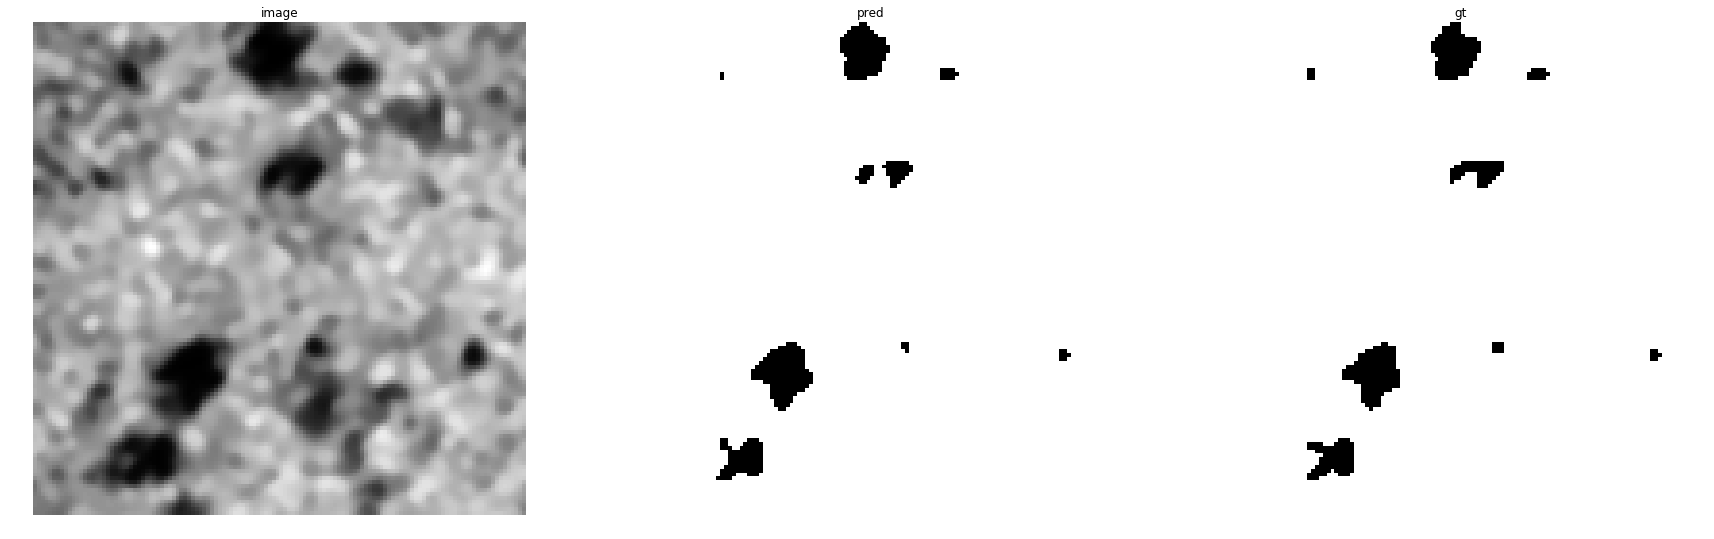

accuracy    : 0.996337890625
precision   : 0.9978629792583281
recall      : 0.9983649855364105
f1          : 0.998113919275745
pr_auc      : 0.9999892832196471
iou         : 0.9962349397590361


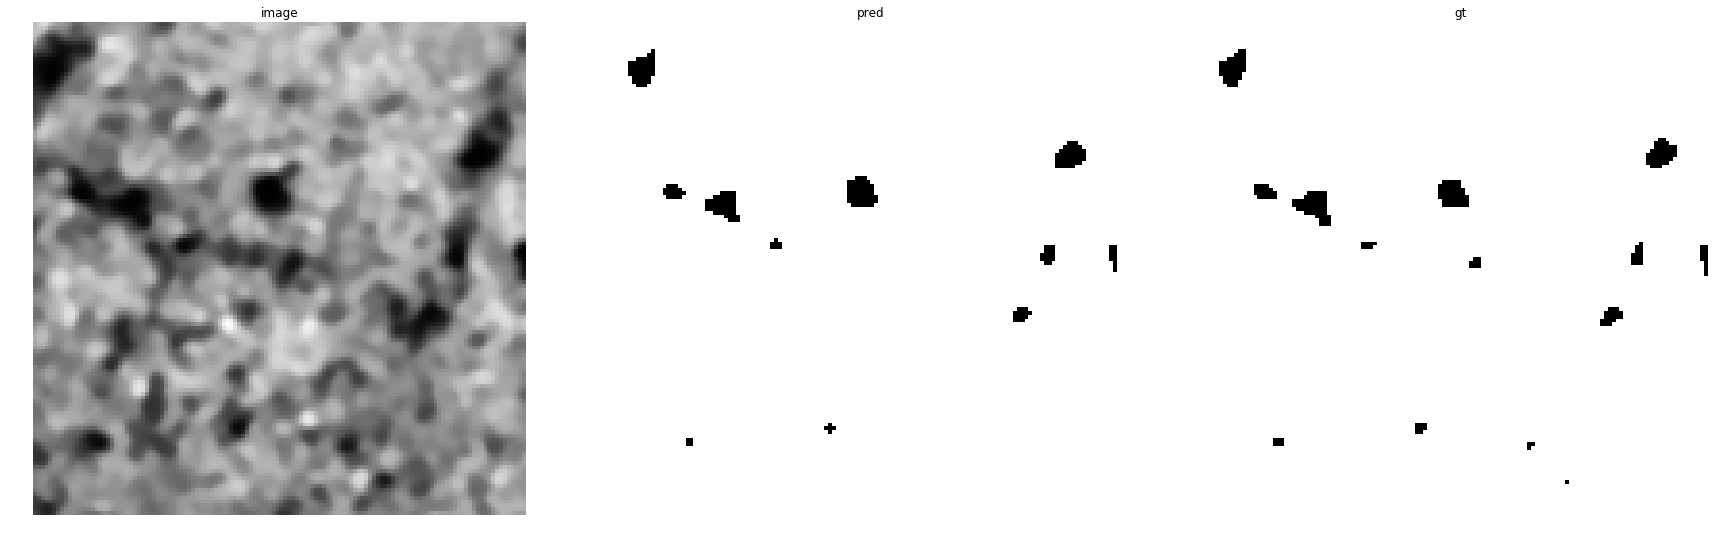

accuracy    : 0.9964599609375
precision   : 0.9974561022522802
recall      : 0.9989436400919655
f1          : 0.9981993169823036
pr_auc      : 0.9999830712925337
iou         : 0.9964051072269741


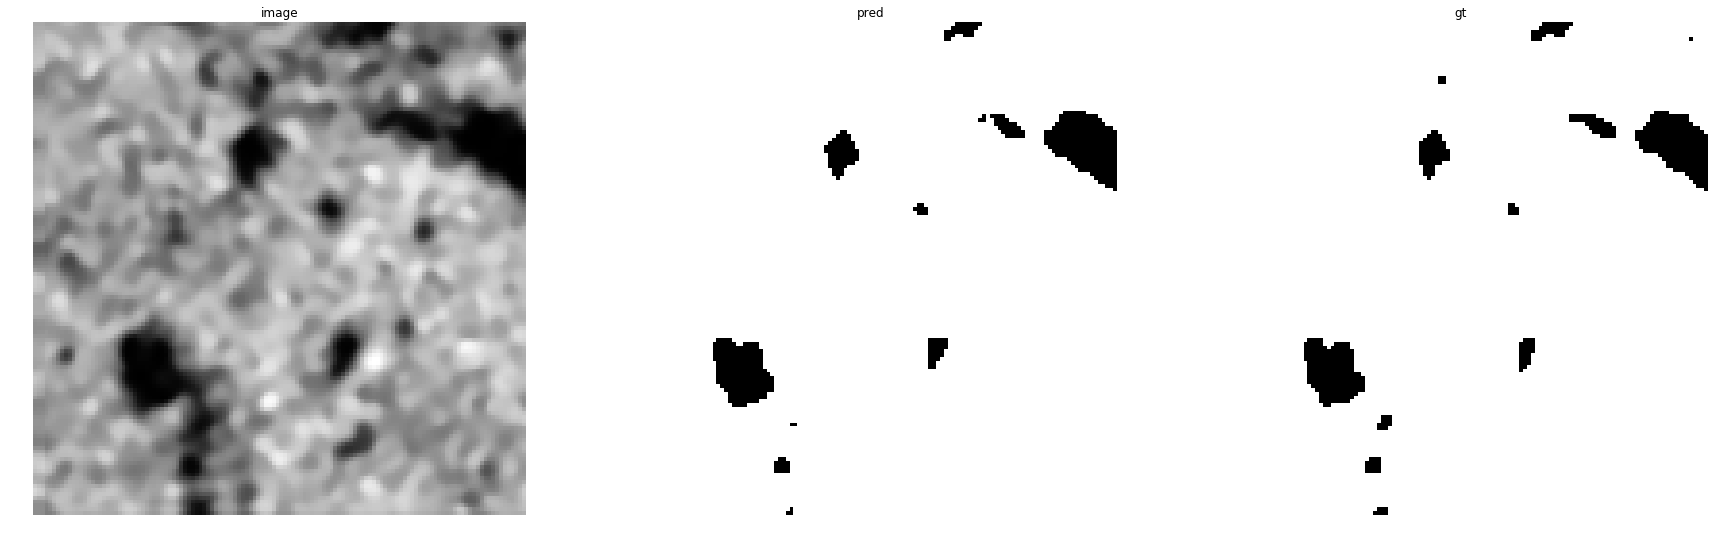

accuracy    : 0.99578857421875
precision   : 0.9977758007117438
recall      : 0.9978392119478868
f1          : 0.9978075053223603
pr_auc      : 0.999979871985759
iou         : 0.9956246036778694


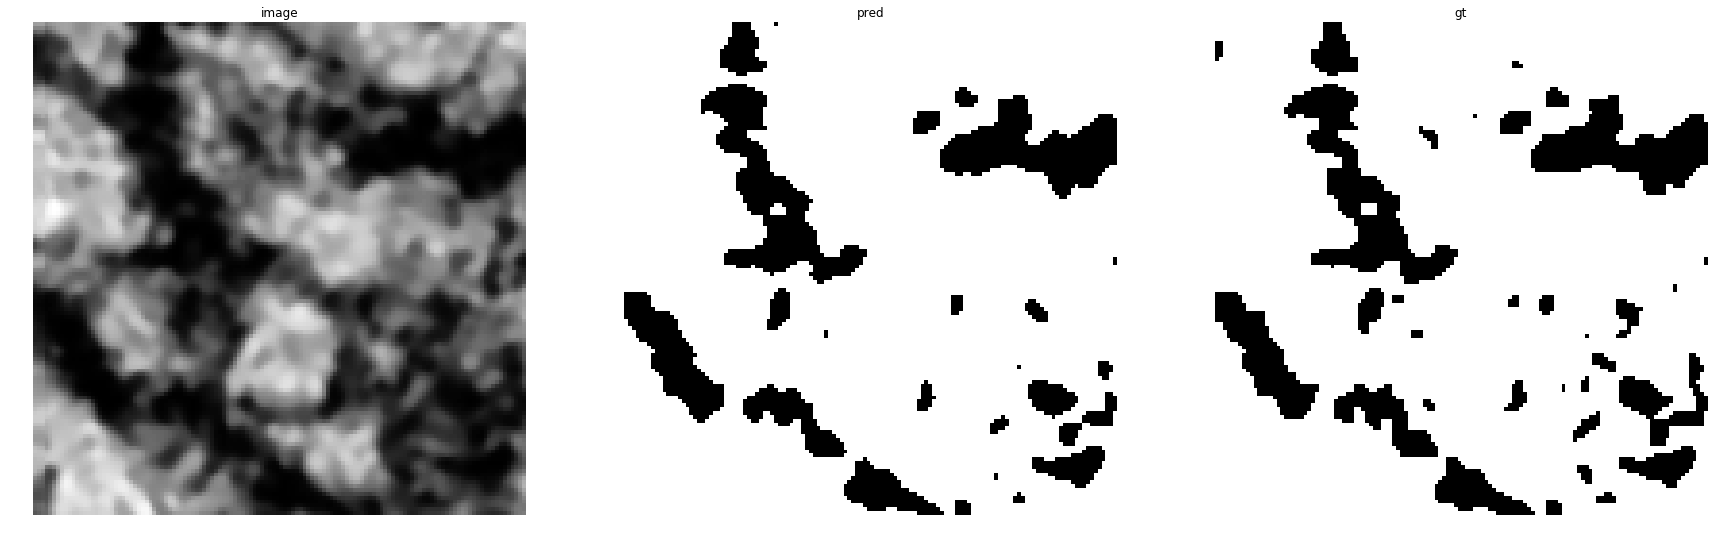

accuracy    : 0.97711181640625
precision   : 0.9799912370381189
recall      : 0.9925301383033799
f1          : 0.9862208340988425
pr_auc      : 0.9993673819582208
iou         : 0.972816237767307


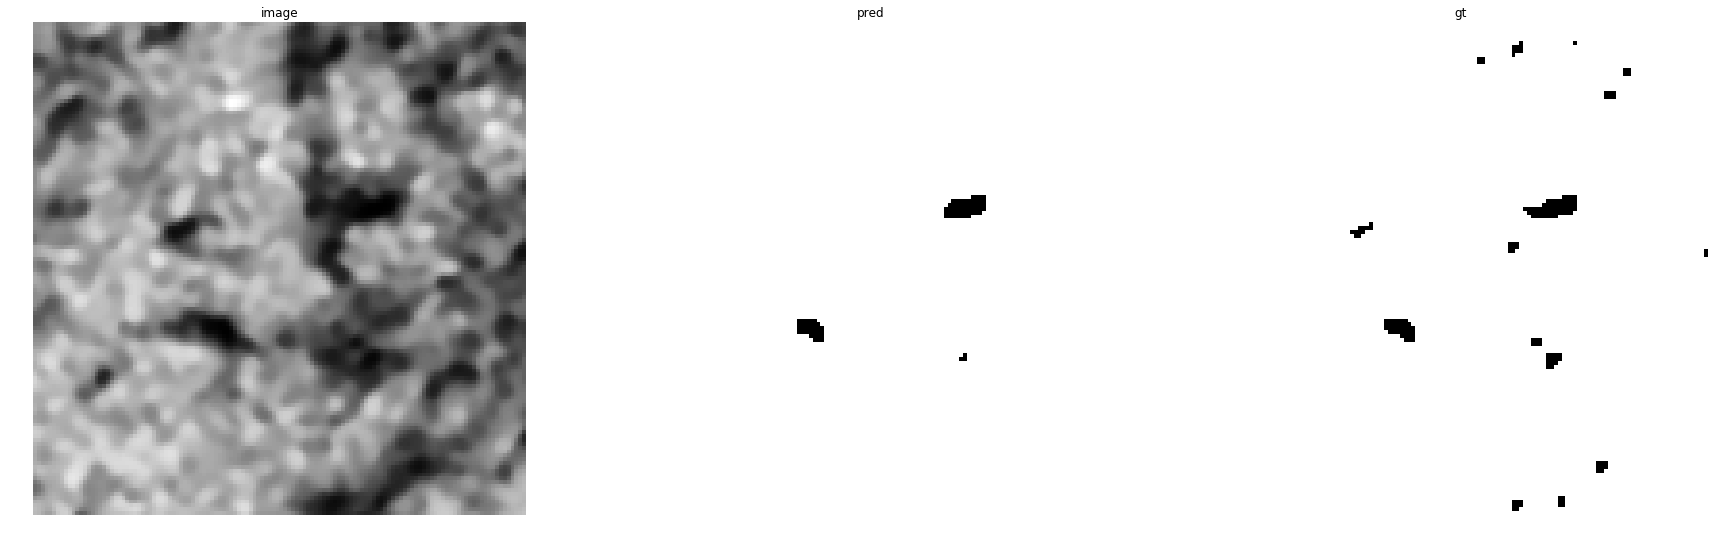

accuracy    : 0.9942626953125
precision   : 0.994416492821205
recall      : 0.9998149290561382
f1          : 0.9971084040851482
pr_auc      : 0.9999688071471796
iou         : 0.9942334826084289


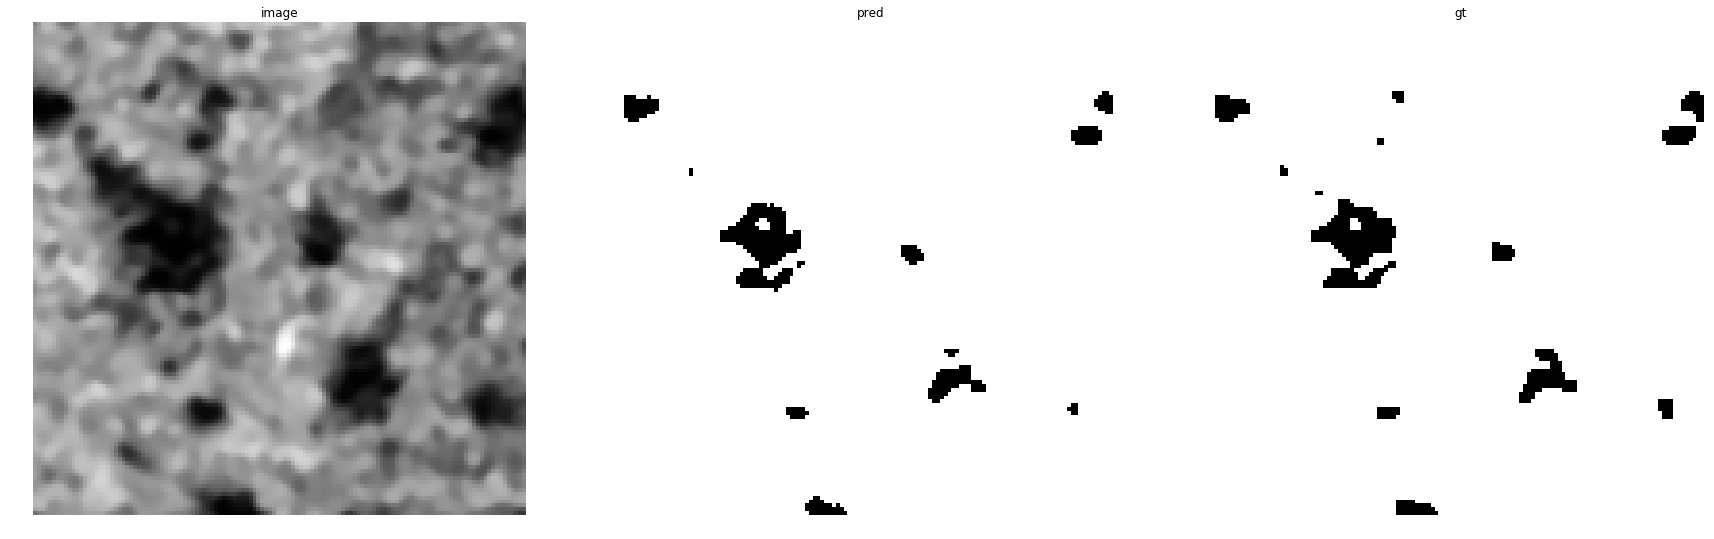

accuracy    : 0.992431640625
precision   : 0.9931921331316188
recall      : 0.9989855440020289
f1          : 0.9960804147174105
pr_auc      : 0.9999550388287204
iou         : 0.992191435768262


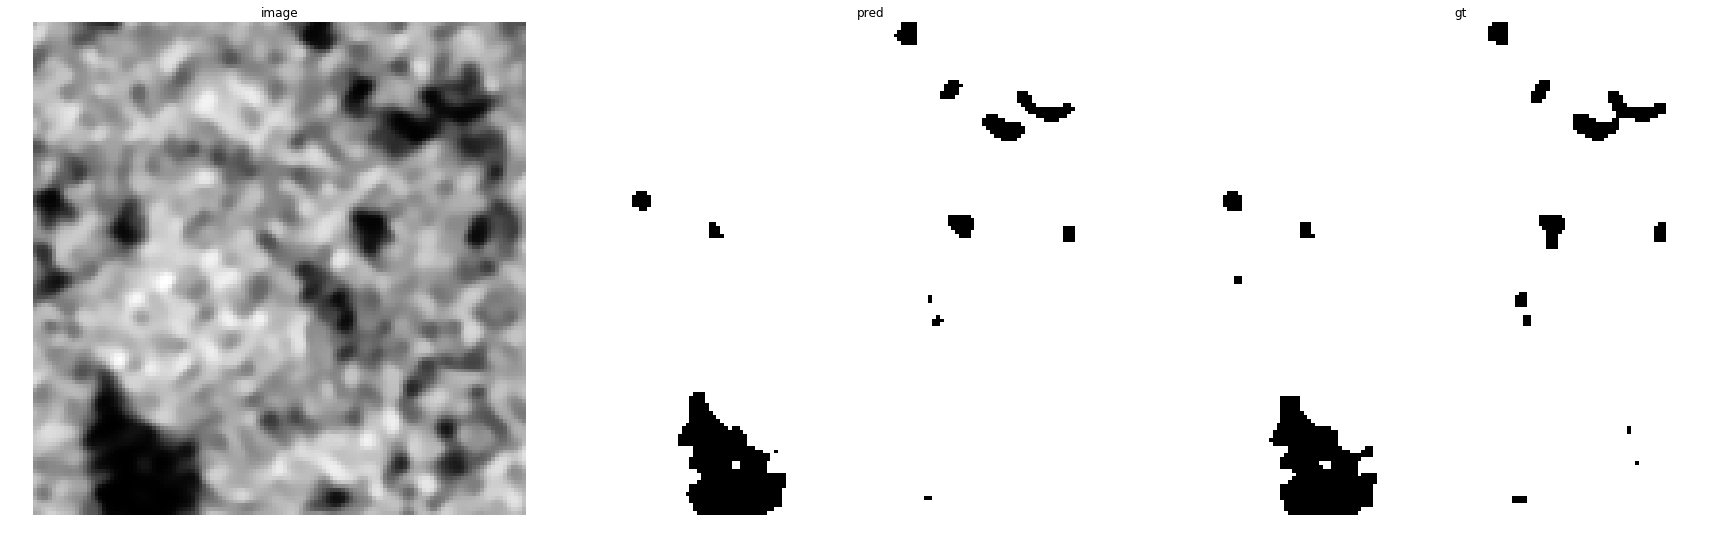

accuracy    : 0.9942626953125
precision   : 0.9956491138268603
recall      : 0.9983319432860718
f1          : 0.9969887237314198
pr_auc      : 0.9999717096047791
iou         : 0.9939955285851165


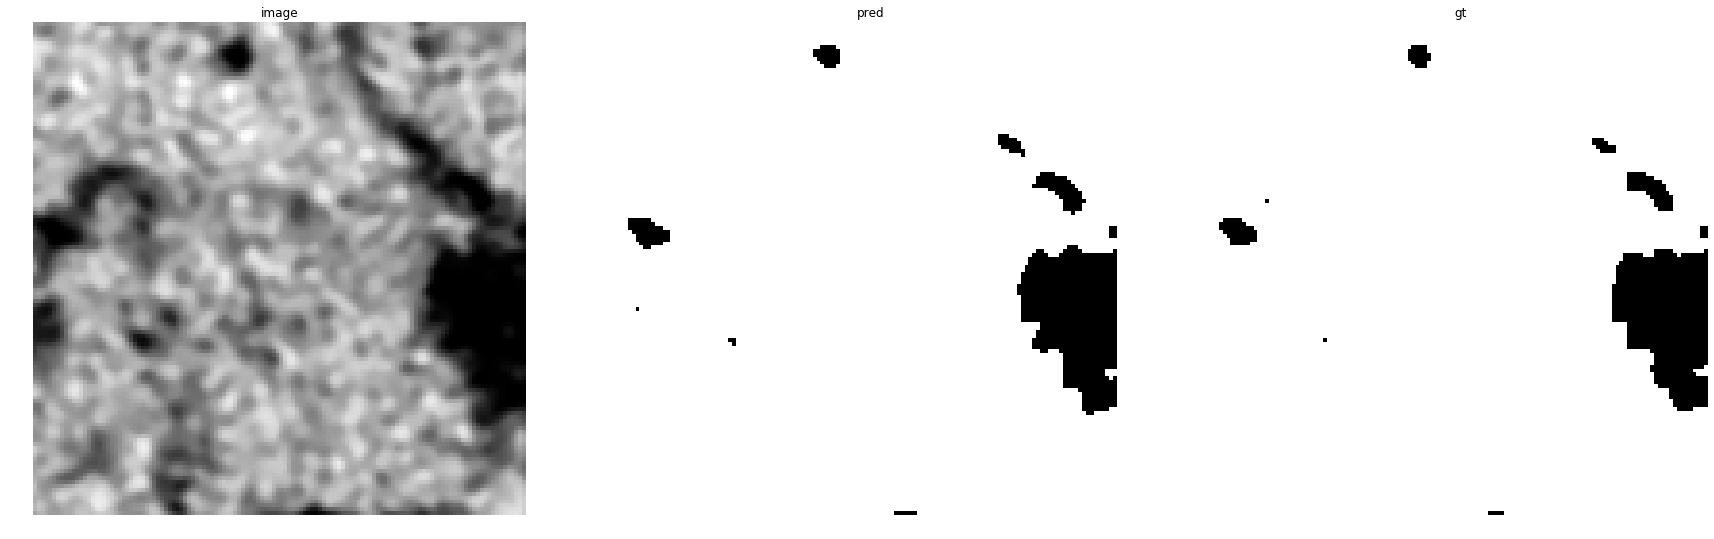

accuracy    : 0.9954833984375
precision   : 0.9990904956798545
recall      : 0.9961137379363948
f1          : 0.9975998962117282
pr_auc      : 0.9999889542584407
iou         : 0.9952112858344658


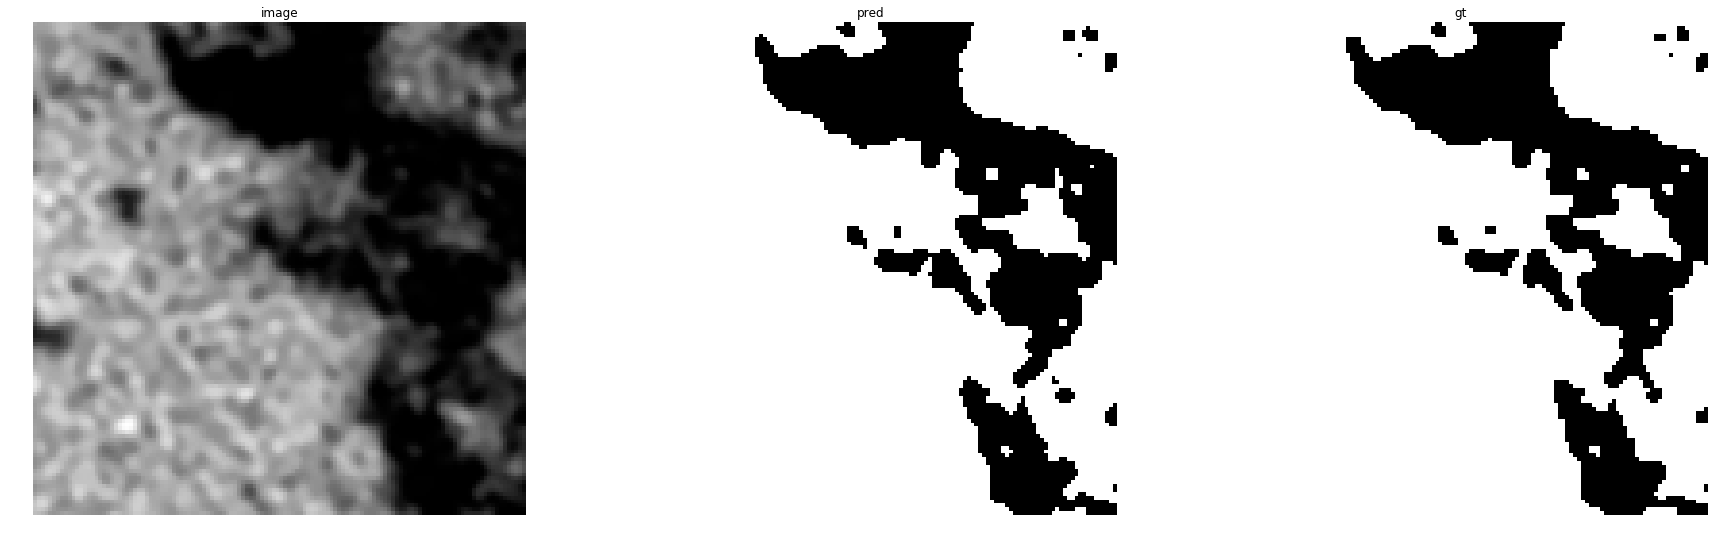

accuracy    : 0.98870849609375
precision   : 0.9949294881952147
recall      : 0.9904566606199227
f1          : 0.9926880360460061
pr_auc      : 0.999844208475351
iou         : 0.9854822255355882


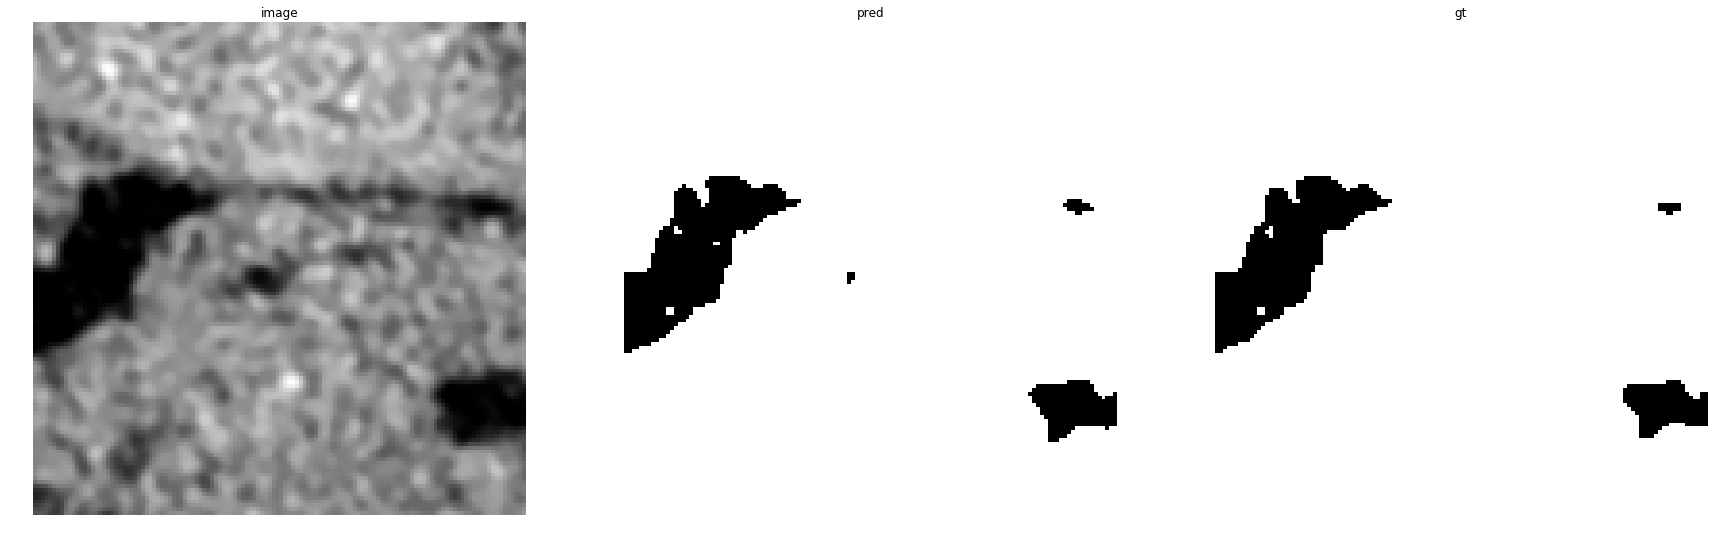

accuracy    : 0.99603271484375
precision   : 0.9994086339444116
recall      : 0.9963317175422508
f1          : 0.997867803837953
pr_auc      : 0.9999923852103765
iou         : 0.9957446808510638


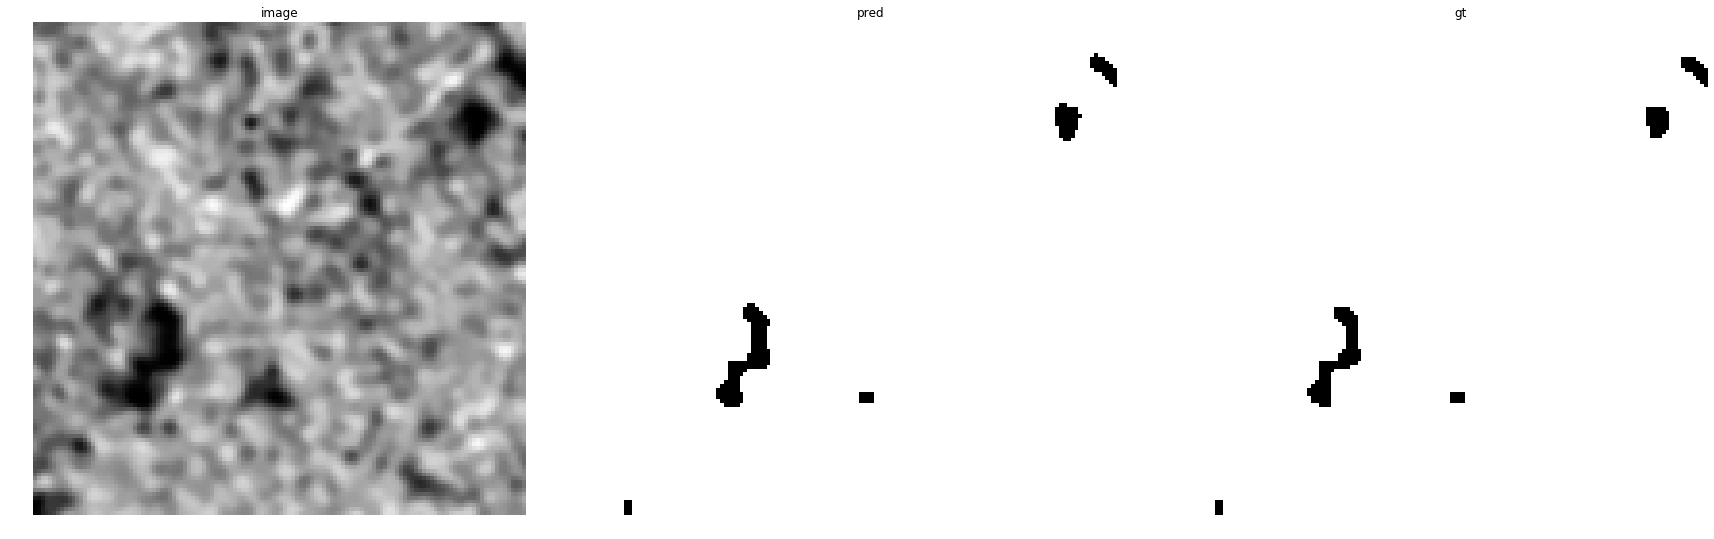

accuracy    : 0.998291015625
precision   : 1.0
recall      : 0.9982685053490817
f1          : 0.9991335025066536
pr_auc      : 0.9999989259400273
iou         : 0.9982685053490817


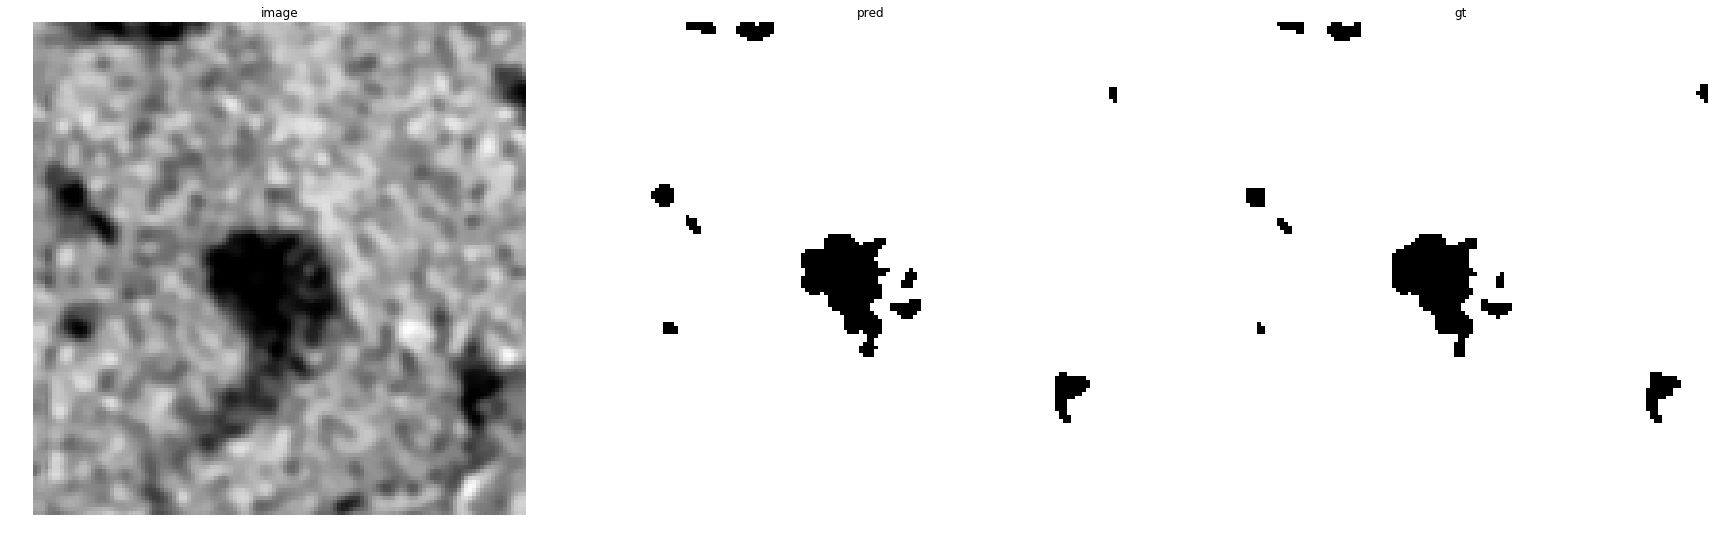

accuracy    : 0.9959716796875
precision   : 0.9988573605027614
recall      : 0.9969587530887664
f1          : 0.9979071537290716
pr_auc      : 0.9999896660384374
iou         : 0.9958230491741029


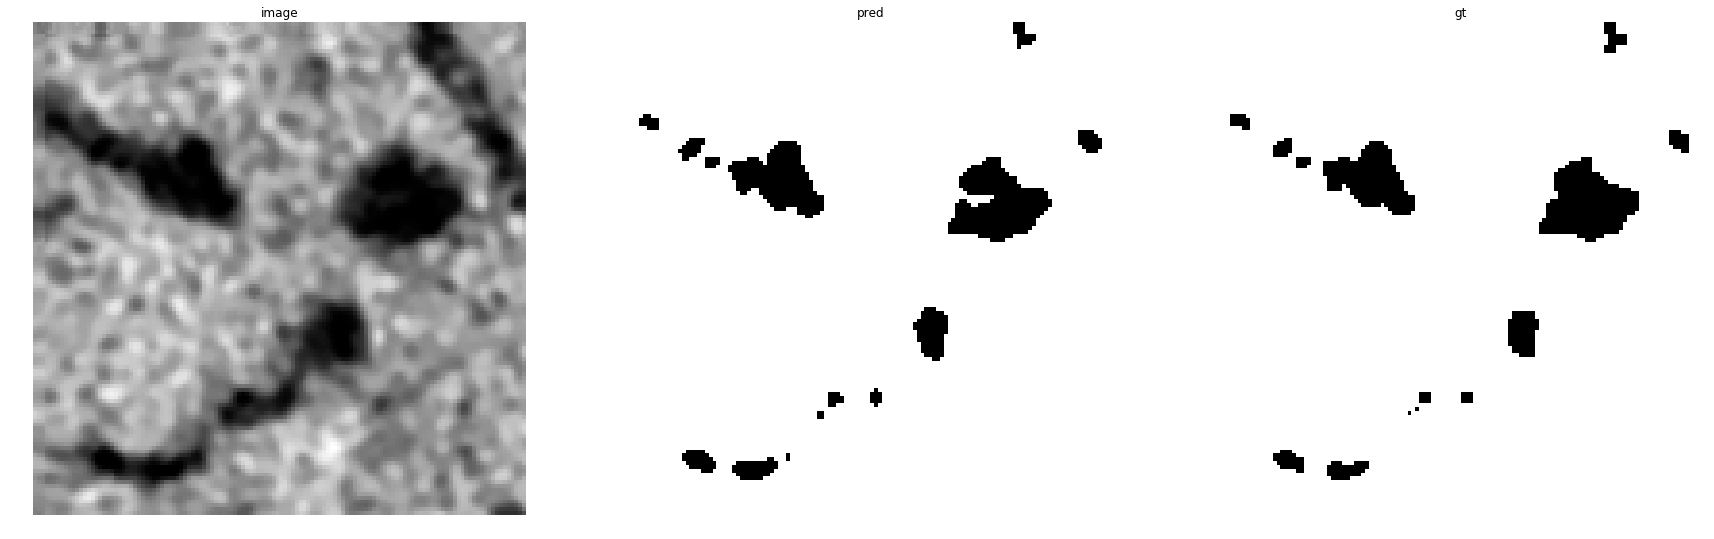

accuracy    : 0.993408203125
precision   : 0.9981221265298194
recall      : 0.9949009229974828
f1          : 0.9965089216446857
pr_auc      : 0.9999688002933732
iou         : 0.9930421337456513


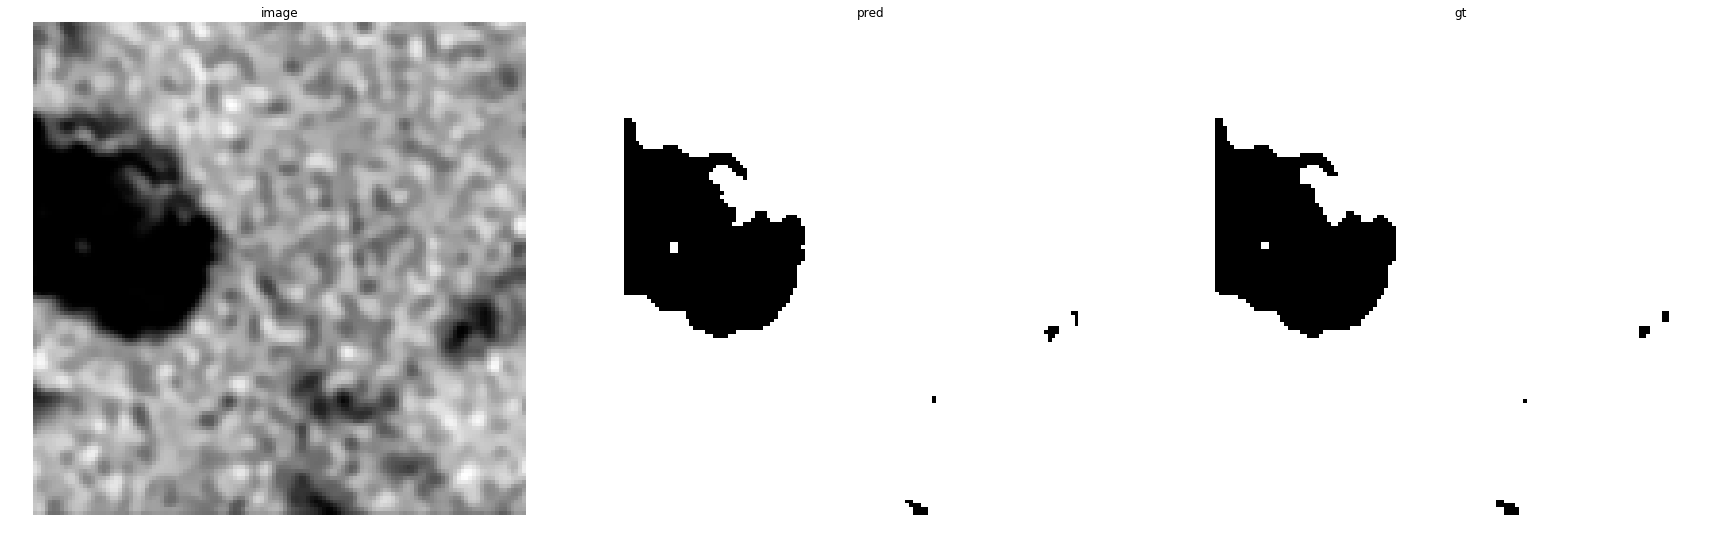

accuracy    : 0.9974365234375
precision   : 0.9991830621553544
recall      : 0.9979601550282179
f1          : 0.9985712341815213
pr_auc      : 0.9999952176180167
iou         : 0.9971465452816088


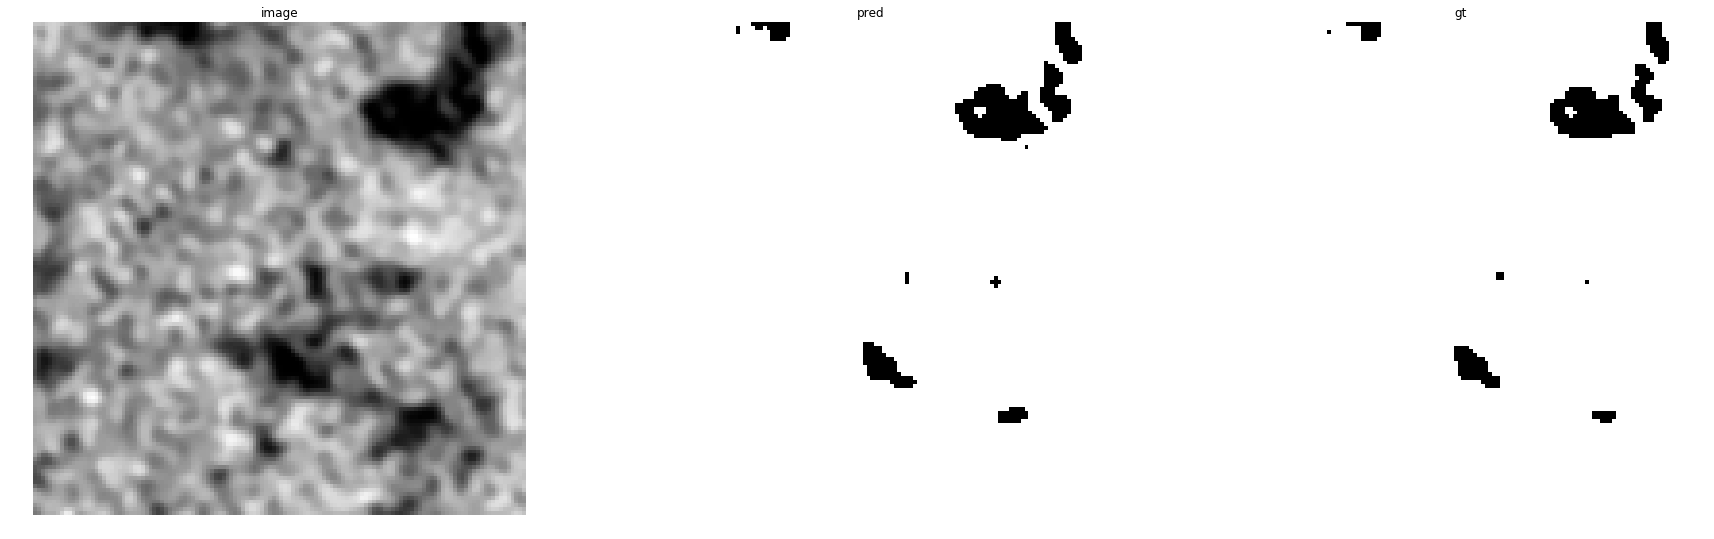

accuracy    : 0.995849609375
precision   : 0.9998111188062708
recall      : 0.9959234869865161
f1          : 0.9978635164006535
pr_auc      : 0.9999947341486484
iou         : 0.9957361424630048


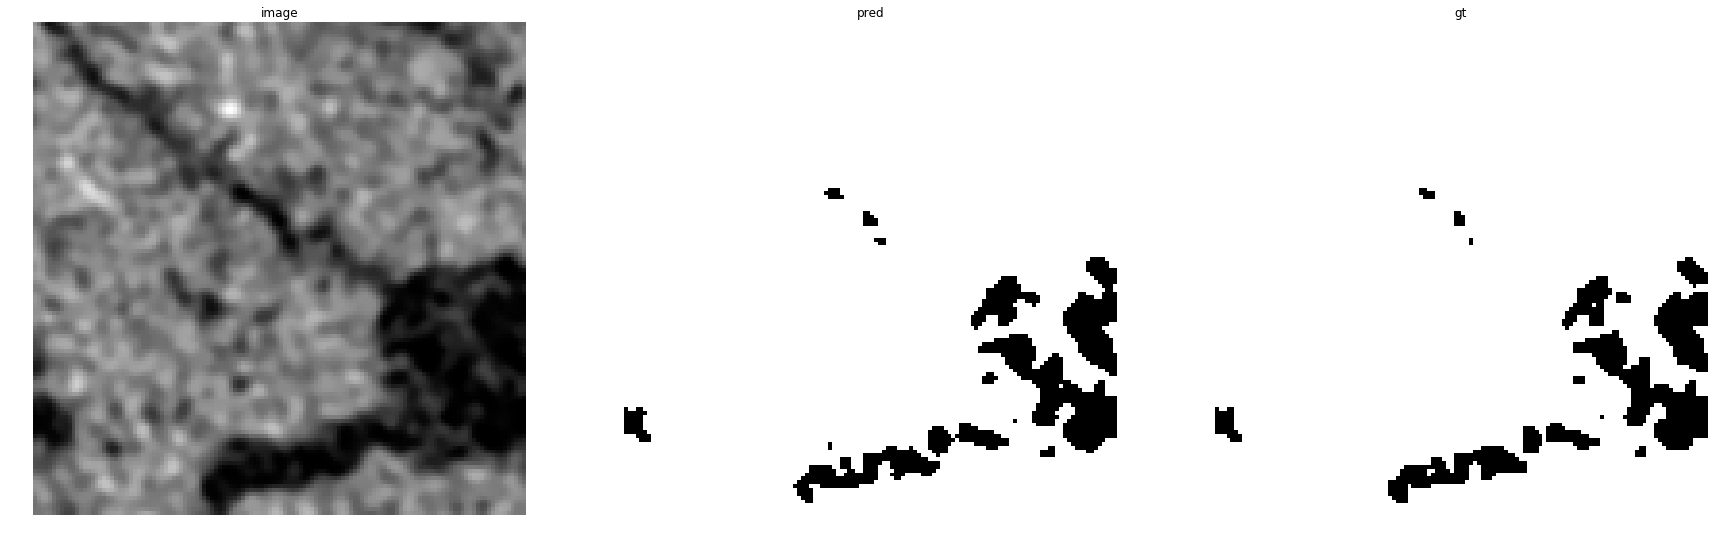

accuracy    : 0.991943359375
precision   : 0.9976978227981319
recall      : 0.9936455944972159
f1          : 0.9956675856636472
pr_auc      : 0.9999606922793051
iou         : 0.9913725490196078


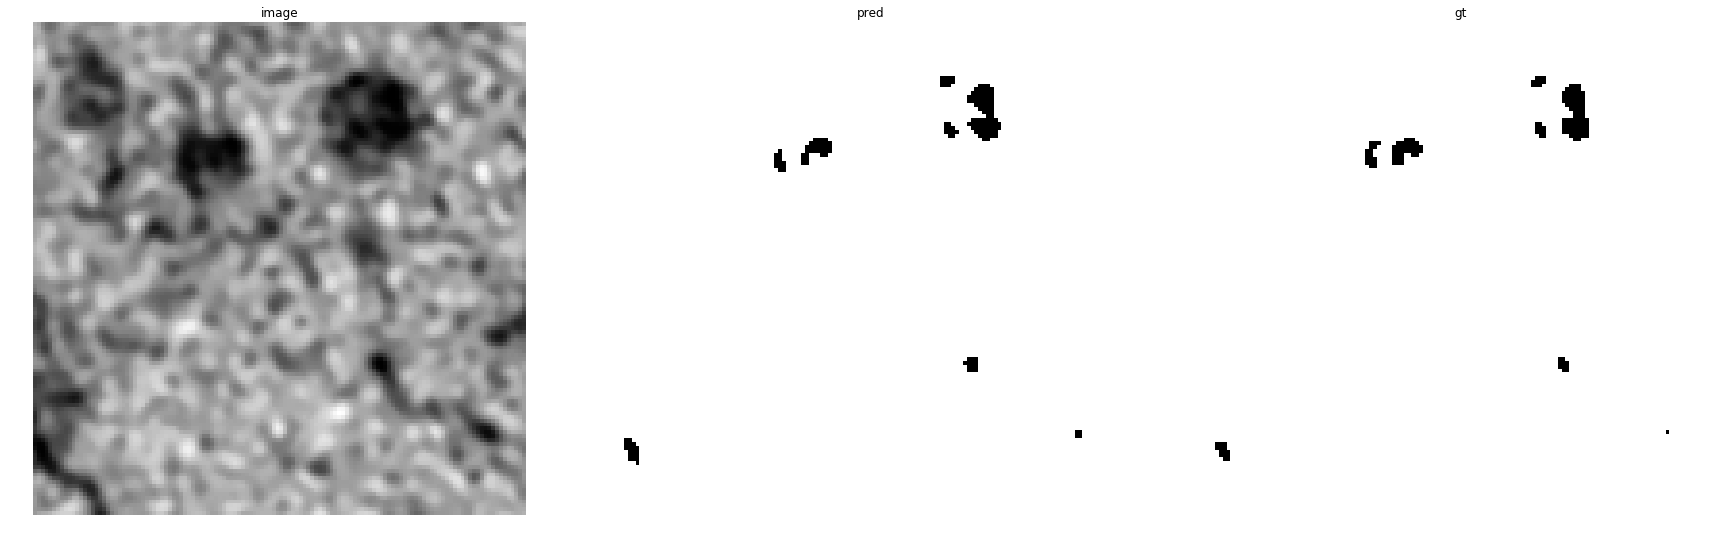

accuracy    : 0.99761962890625
precision   : 0.999074188371806
recall      : 0.9985195237801493
f1          : 0.9987967790701261
pr_auc      : 0.99999530680813
iou         : 0.9975964501417478


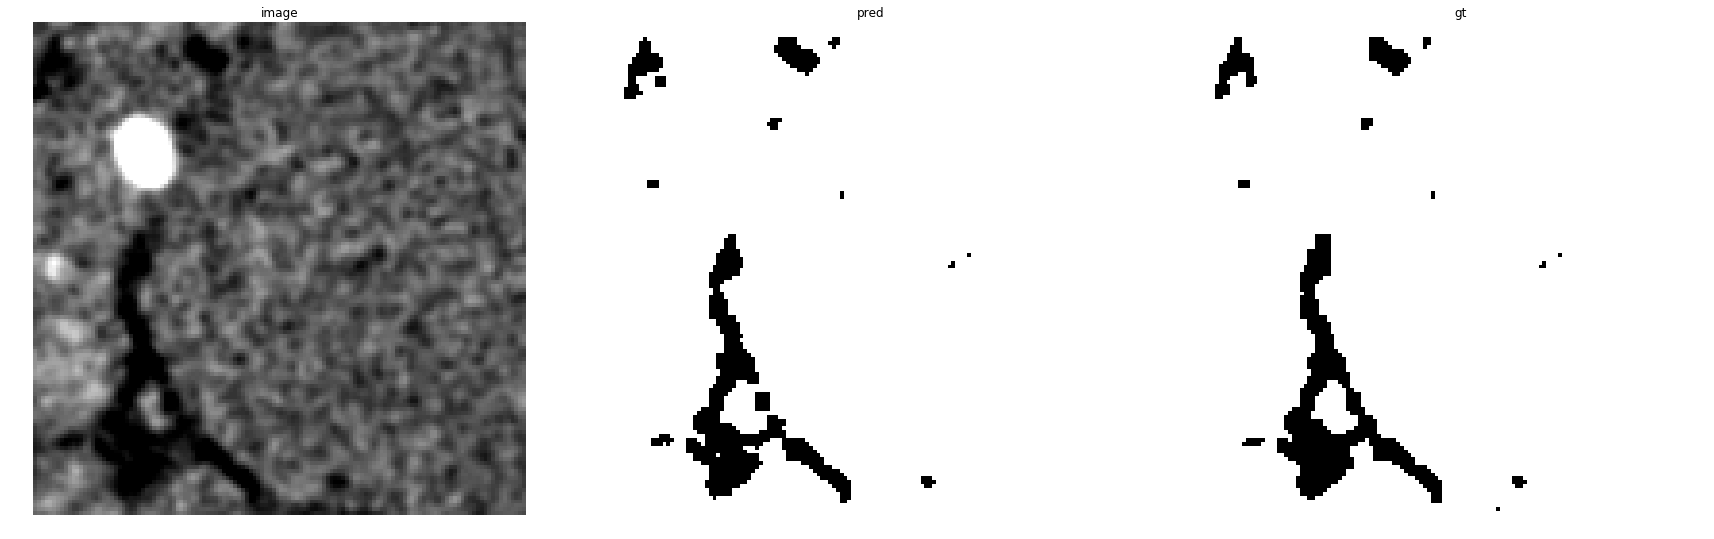

accuracy    : 0.99462890625
precision   : 0.9957416607523066
recall      : 0.998576512455516
f1          : 0.9971570717839375
pr_auc      : 0.9999768240251378
iou         : 0.9943302622253721


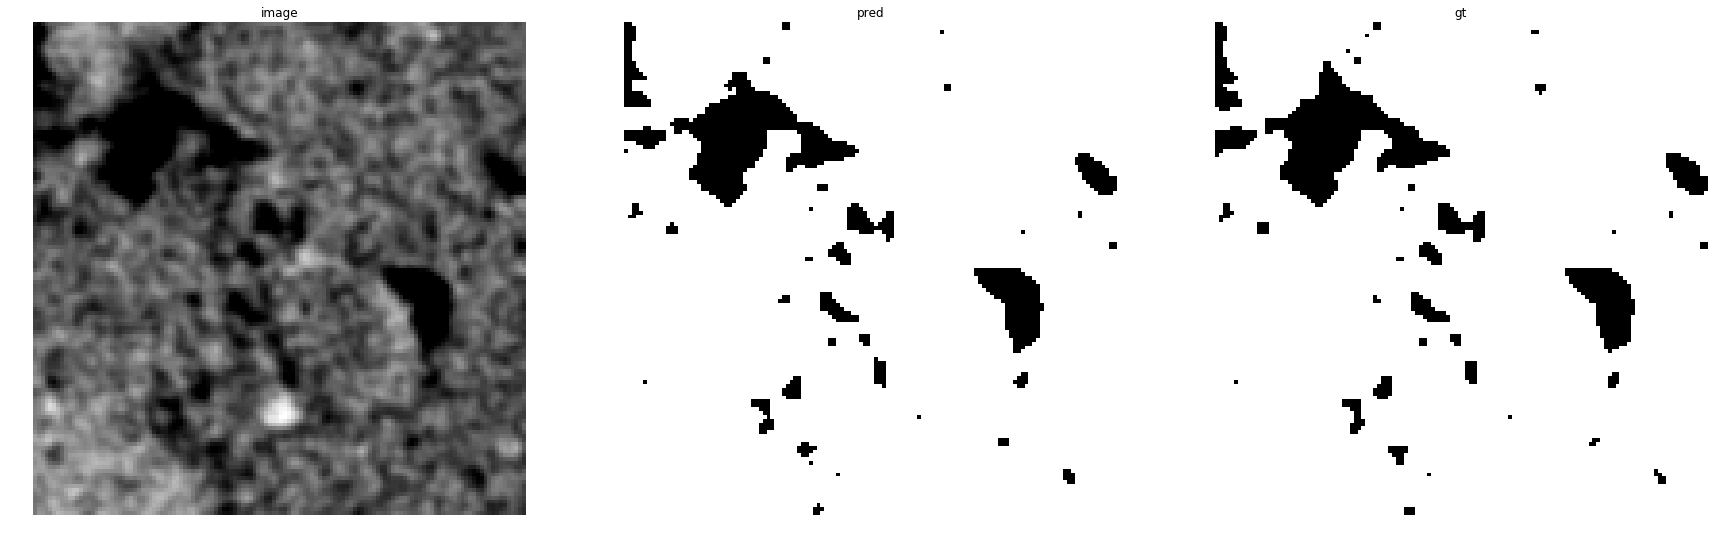

accuracy    : 0.99169921875
precision   : 0.992676431424767
recall      : 0.9982592394215318
f1          : 0.9954600080117505
pr_auc      : 0.9999319434525591
iou         : 0.9909610527715007


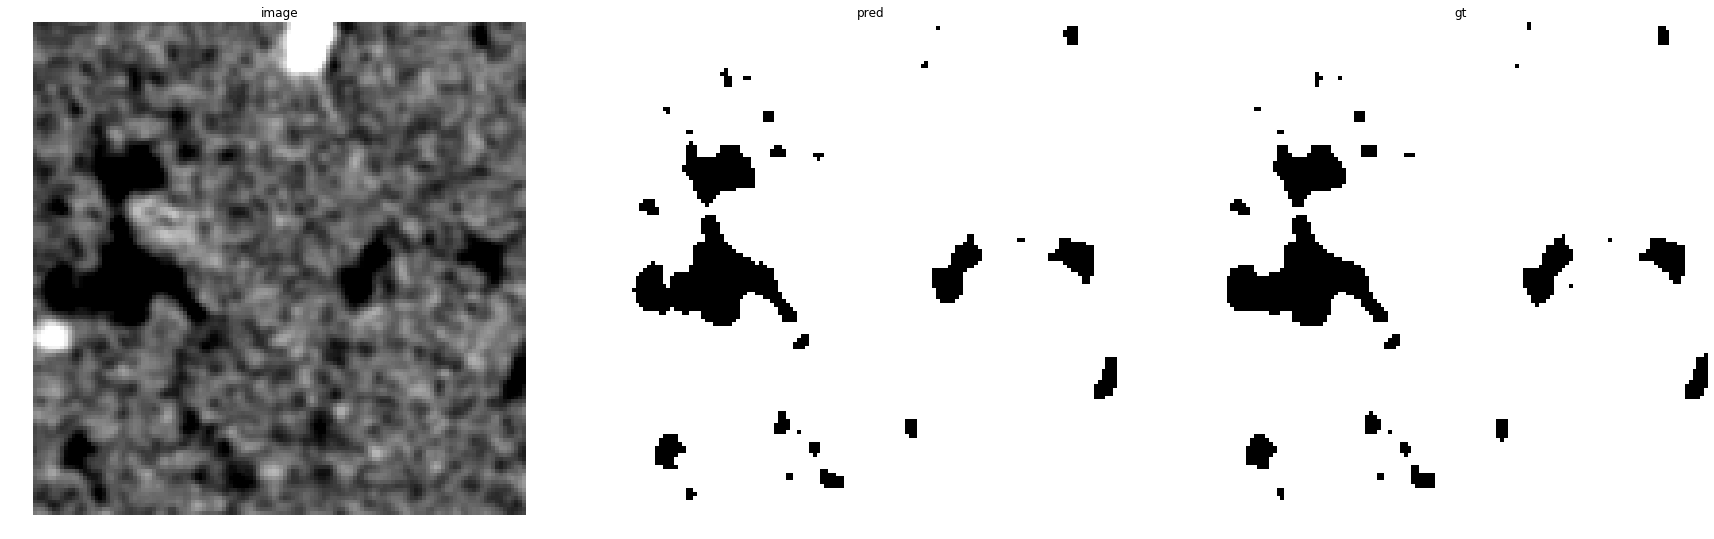

accuracy    : 0.995361328125
precision   : 0.99710392944119
recall      : 0.9978921019695672
f1          : 0.9974978600118523
pr_auc      : 0.9999814134066872
iou         : 0.995008210180624


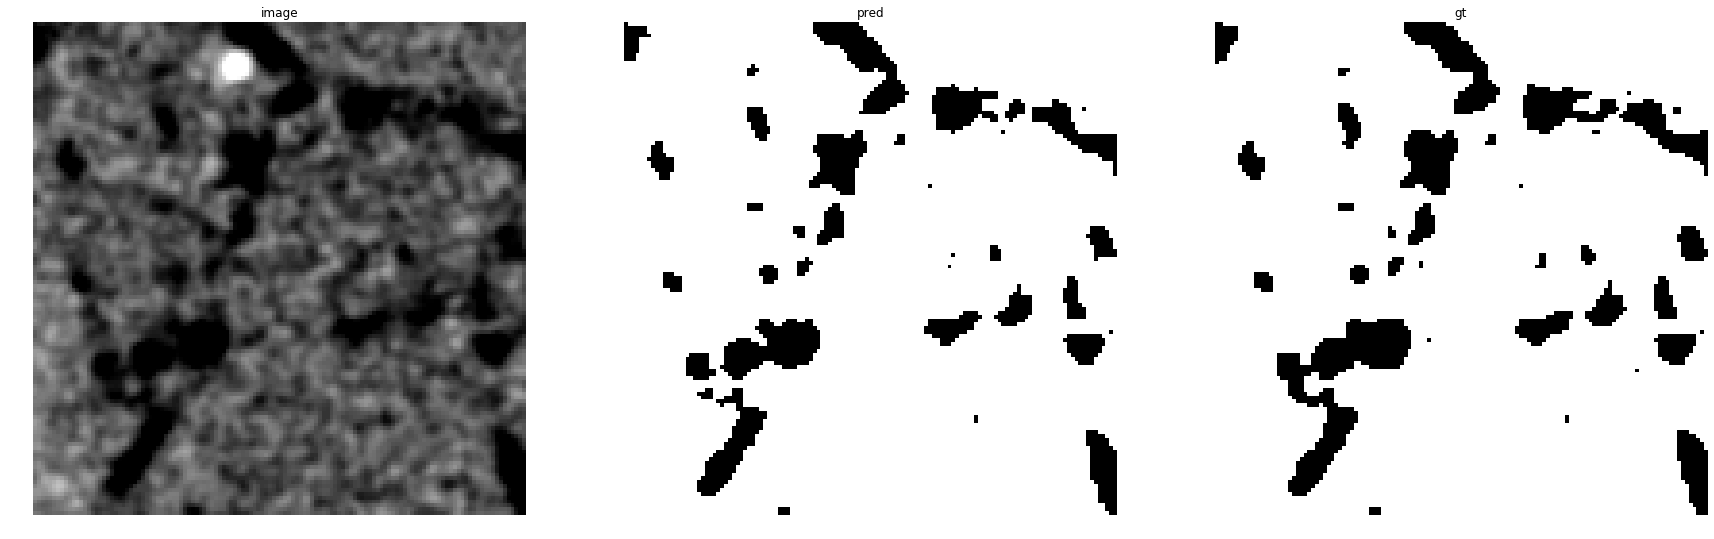

accuracy    : 0.986328125
precision   : 0.9854673186858599
recall      : 0.9990922421618602
f1          : 0.9922330097087378
pr_auc      : 0.9998267451664968
iou         : 0.9845857418111753


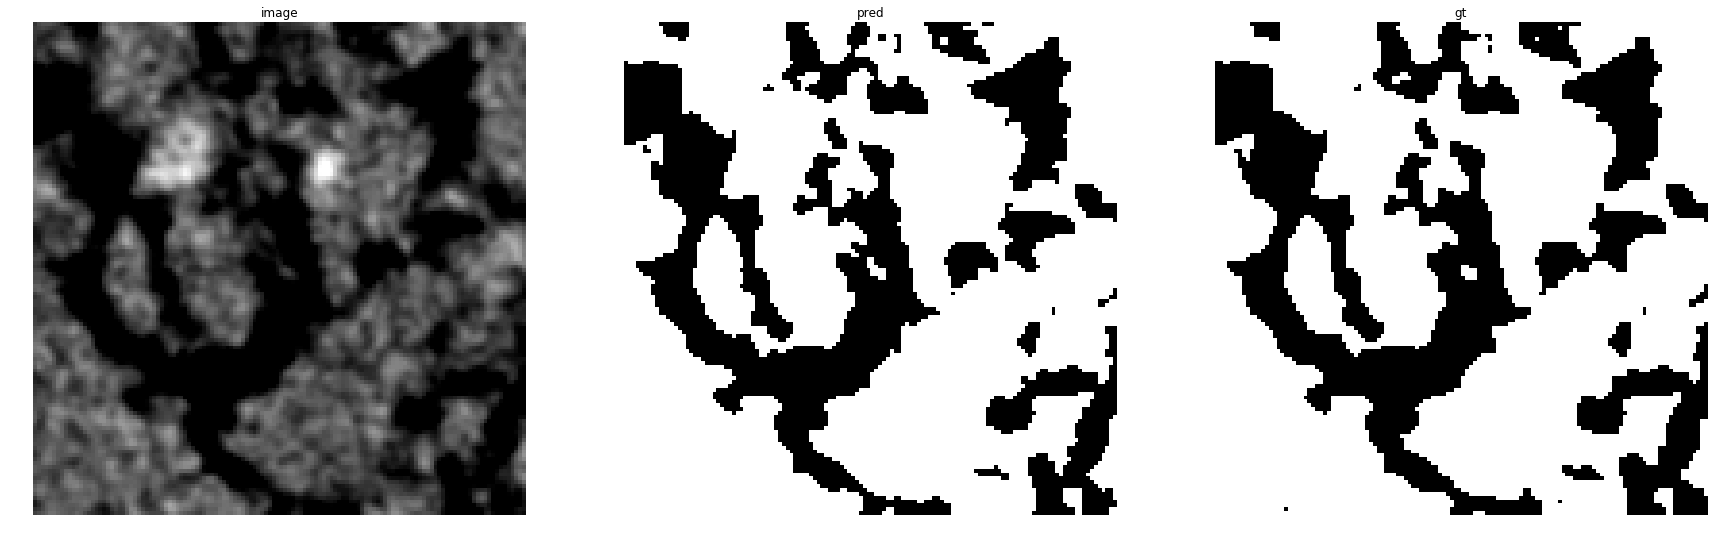

accuracy    : 0.98040771484375
precision   : 0.9747375911759474
recall      : 0.9966348340154616
f1          : 0.9855645995413052
pr_auc      : 0.9992739212828252
iou         : 0.9715400301445164


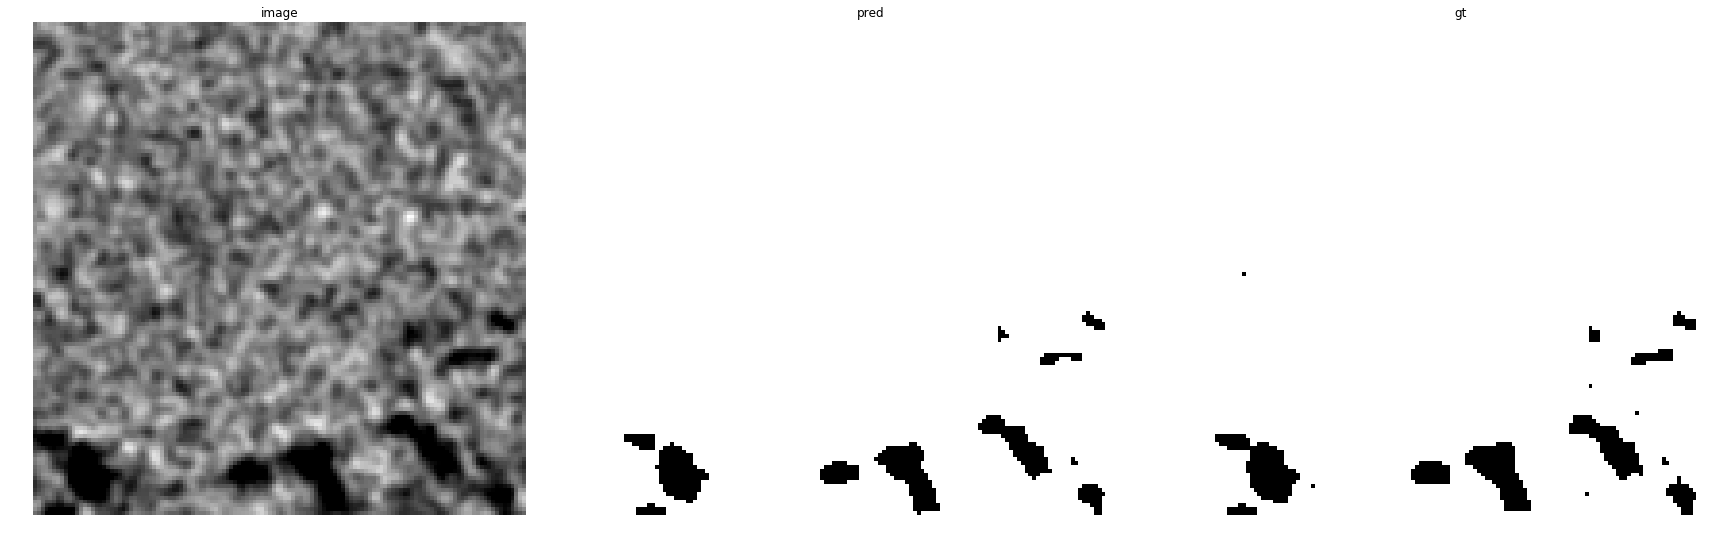

accuracy    : 0.99493408203125
precision   : 0.994874715261959
recall      : 0.999872813990461
f1          : 0.997367502933807
pr_auc      : 0.9999915569100555
iou         : 0.9947488295583955


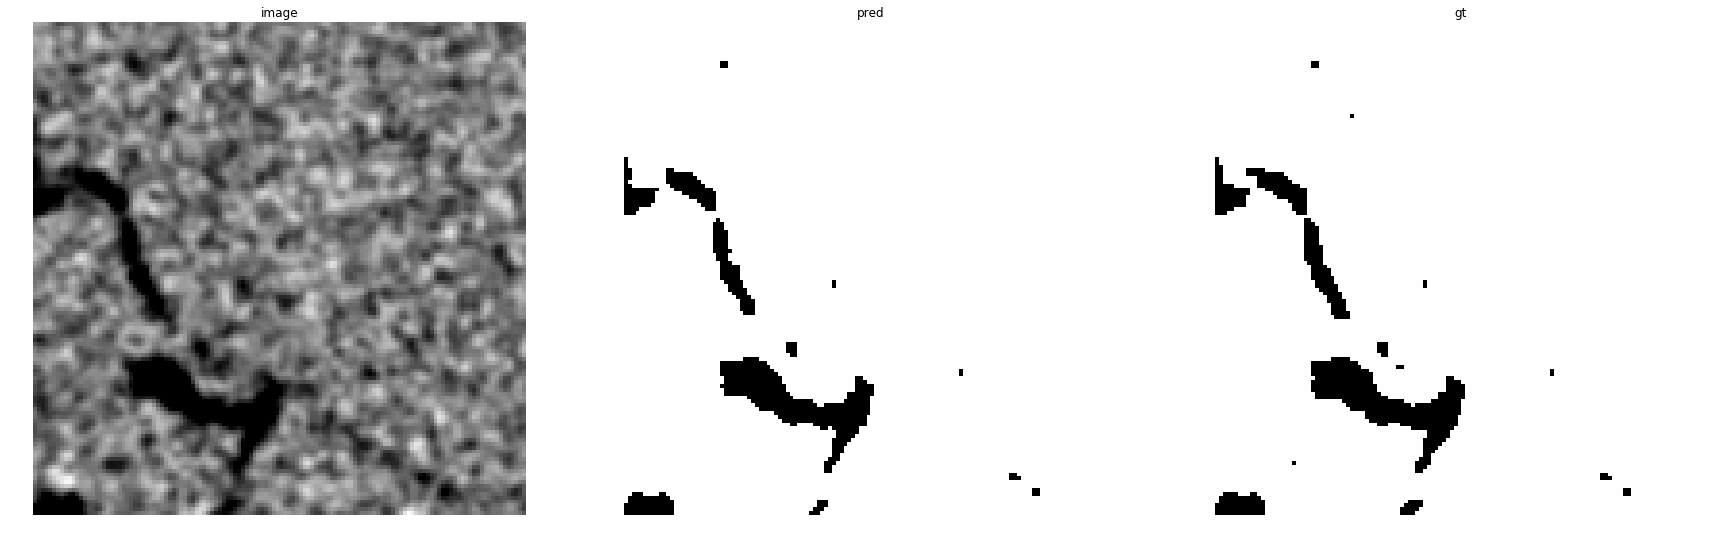

accuracy    : 0.99505615234375
precision   : 0.9948901379662749
recall      : 0.9999358027861591
f1          : 0.9974065891845164
pr_auc      : 0.999990034139231
iou         : 0.9948265951331673


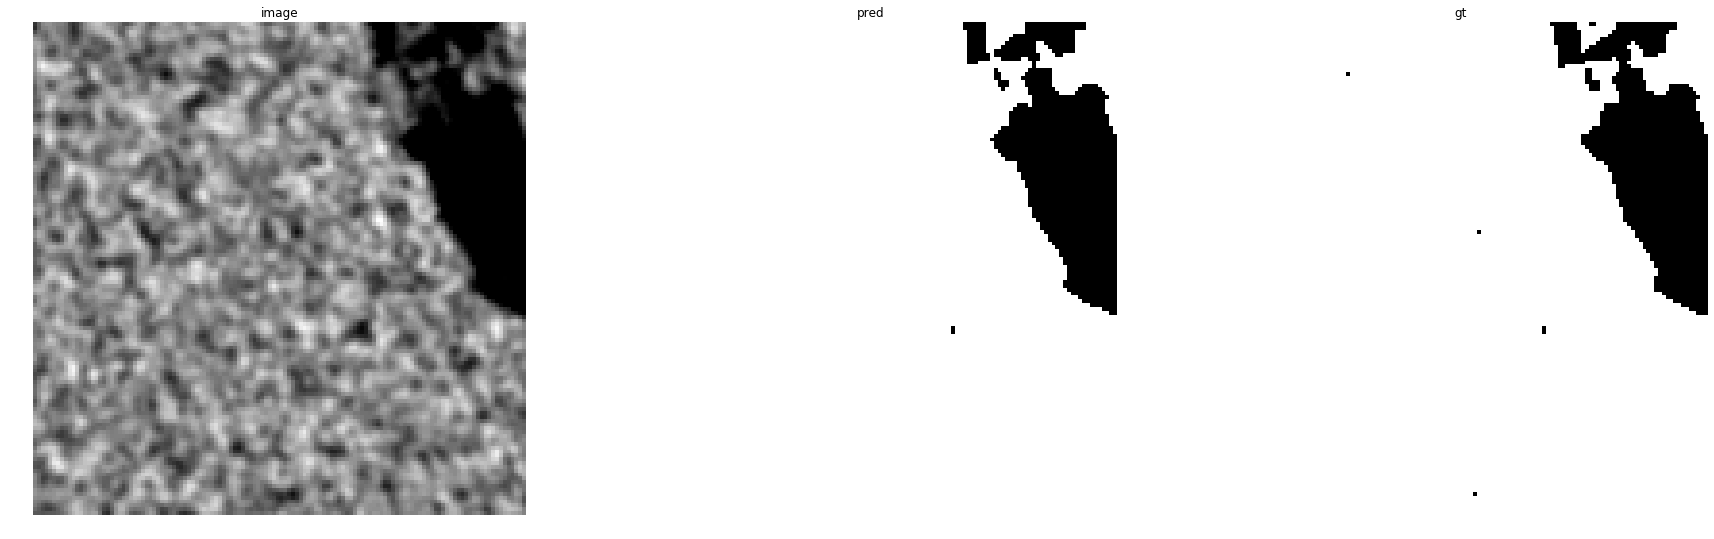

accuracy    : 0.99554443359375
precision   : 0.9951765257586923
recall      : 0.9999326871297792
f1          : 0.9975489373132324
pr_auc      : 0.9999951389828812
iou         : 0.995109860664523


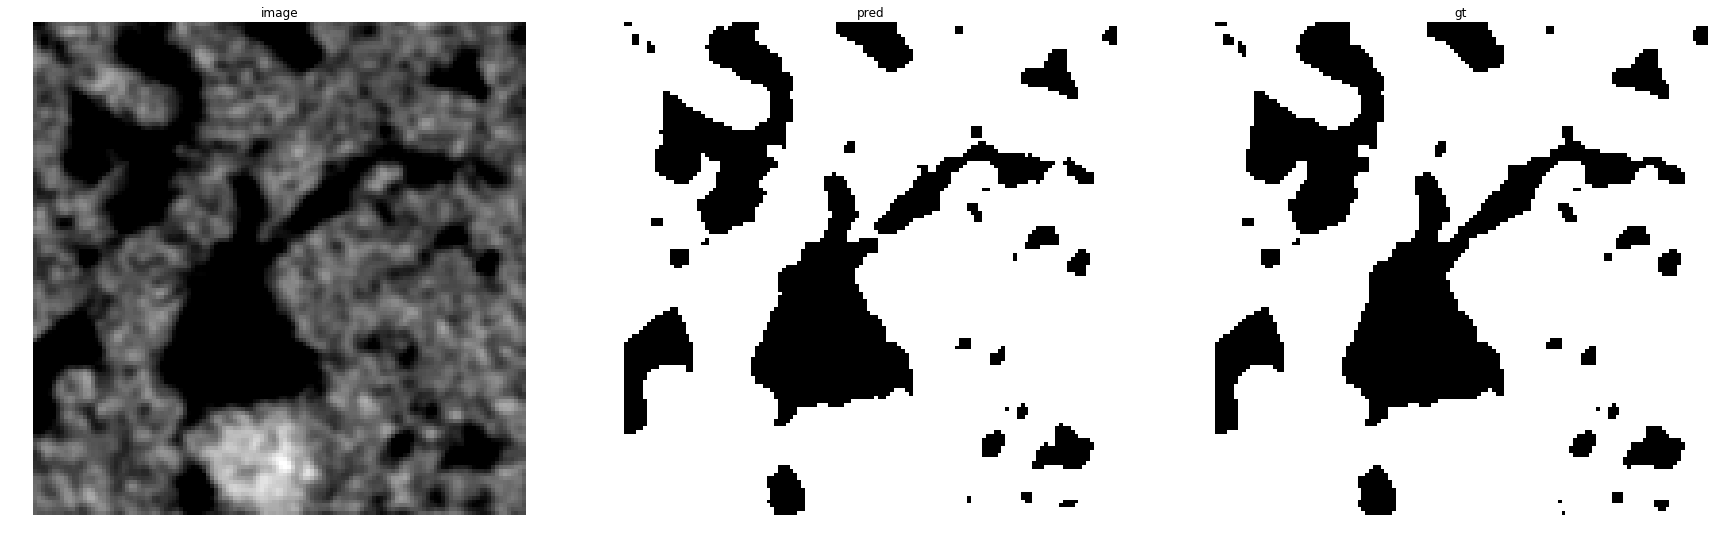

accuracy    : 0.9873046875
precision   : 0.9843627219864843
recall      : 0.9992820676451819
f1          : 0.991766289288259
pr_auc      : 0.9997685116788965
iou         : 0.9836670592854339


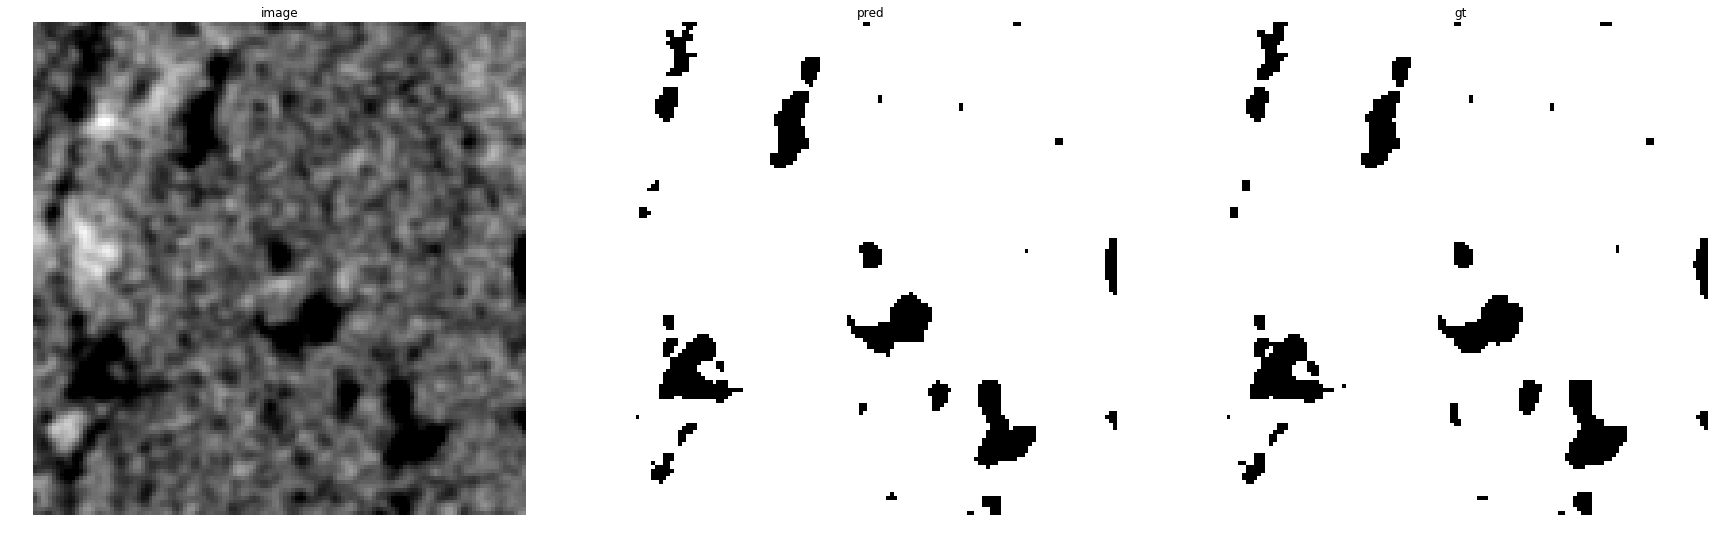

accuracy    : 0.99334716796875
precision   : 0.9941287755235175
recall      : 0.998754751605715
f1          : 0.9964363945467027
pr_auc      : 0.9999233055221413
iou         : 0.9928980974719833


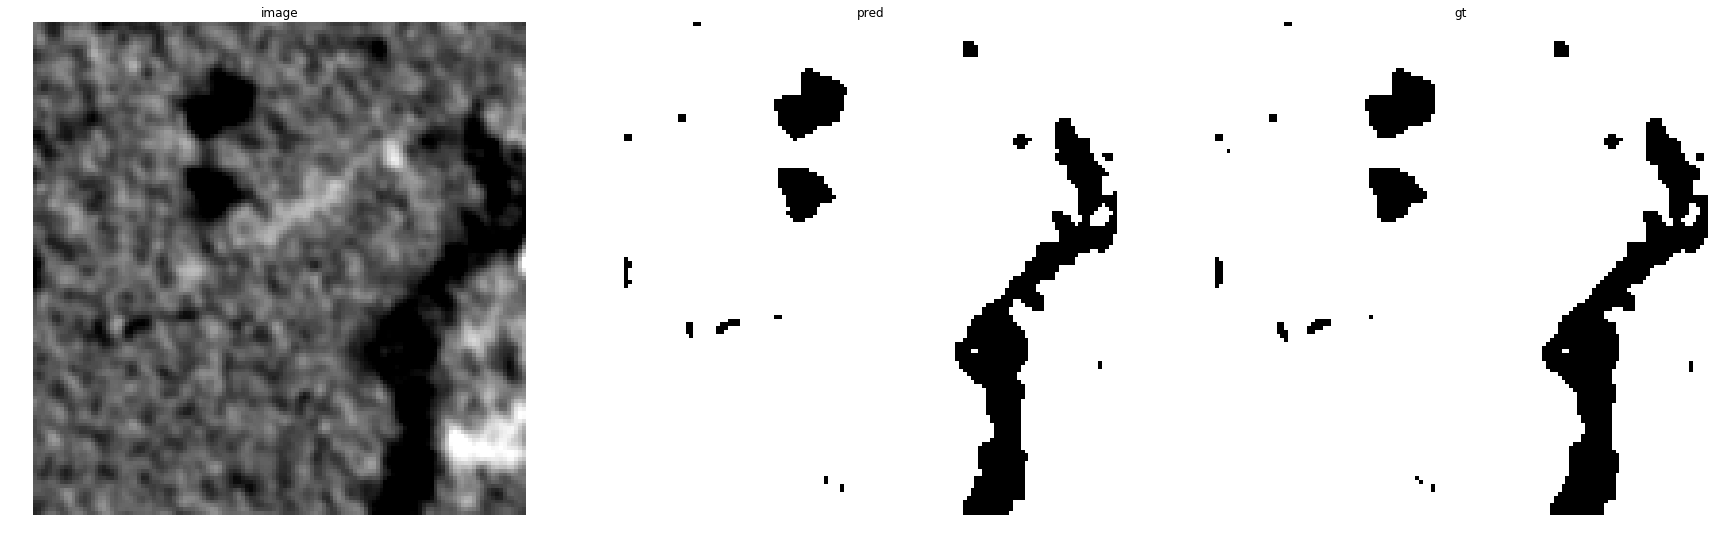

accuracy    : 0.993408203125
precision   : 0.9933846361549885
recall      : 0.9993209289691701
f1          : 0.9963439404197698
pr_auc      : 0.999969286191803
iou         : 0.9927145169994603


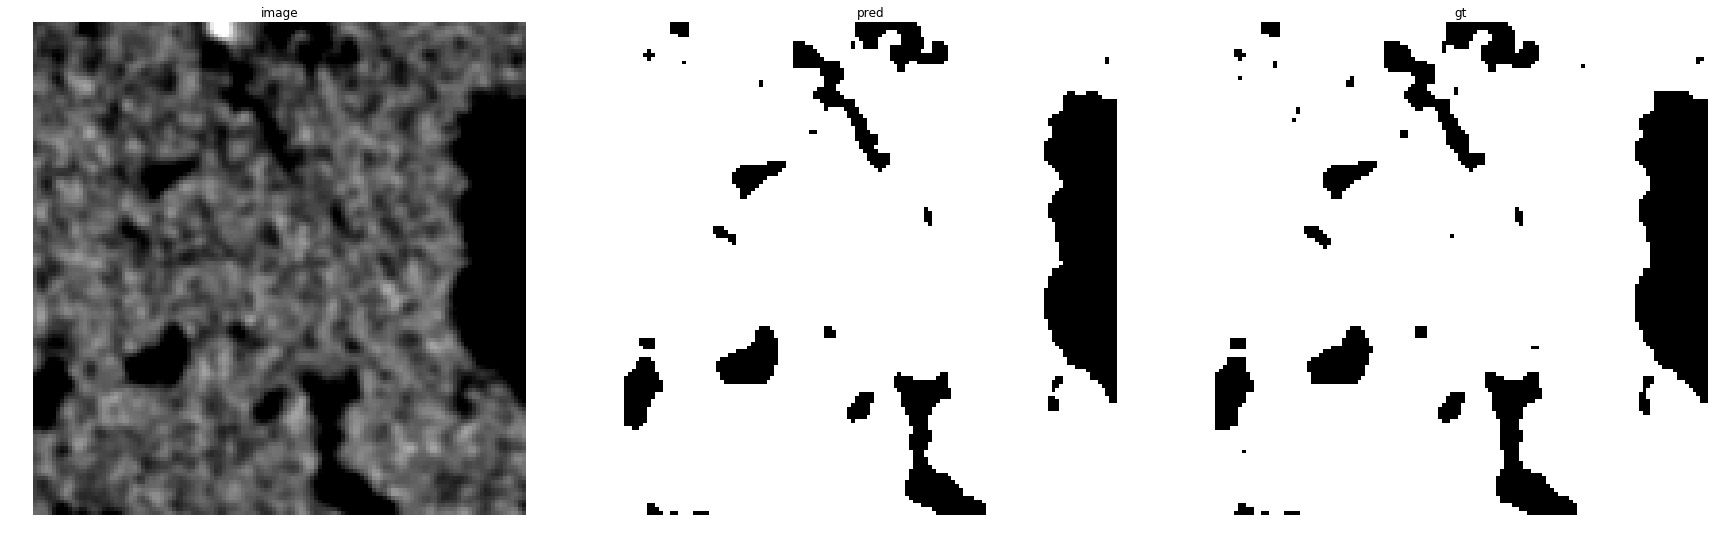

accuracy    : 0.99127197265625
precision   : 0.9898419057157164
recall      : 0.9999277352218529
f1          : 0.9948592587266779
pr_auc      : 0.9999650033382551
iou         : 0.9897711015736766


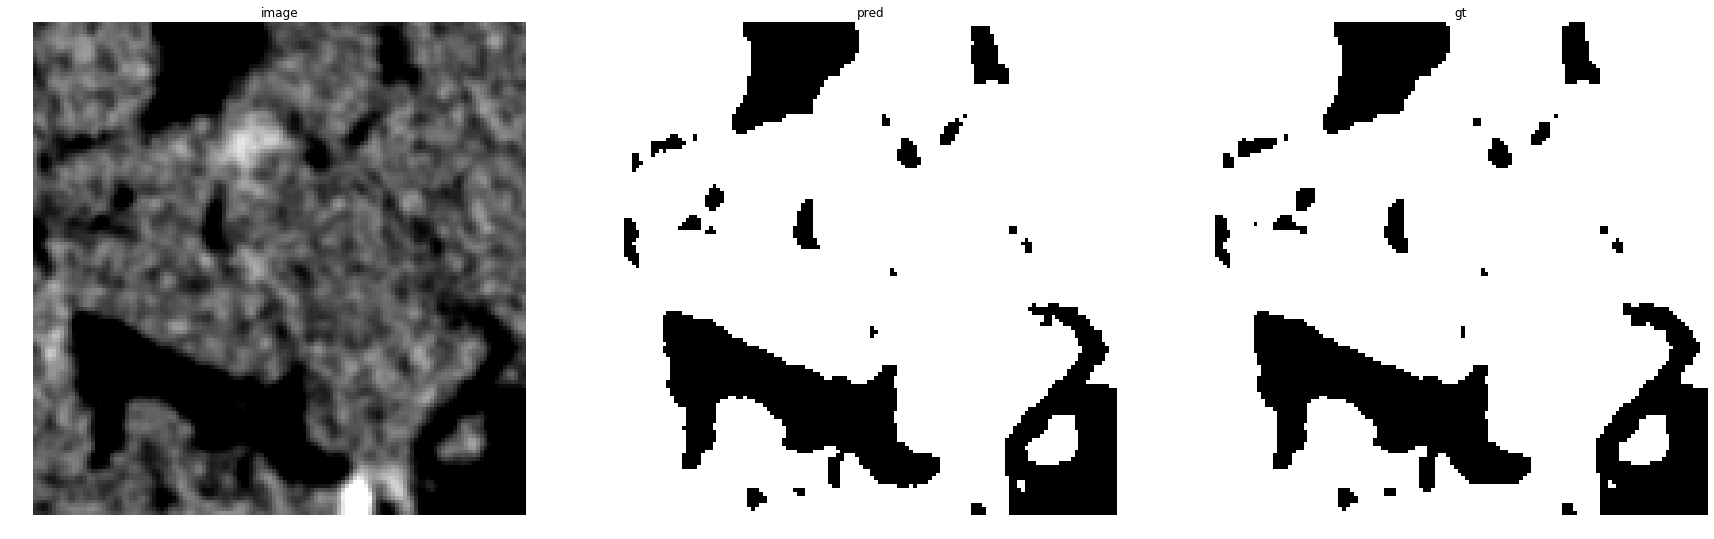

accuracy    : 0.9921875
precision   : 0.9922217943781286
recall      : 0.9979087599721168
f1          : 0.9950571516836577
pr_auc      : 0.9999362632970404
iou         : 0.9901629265293576


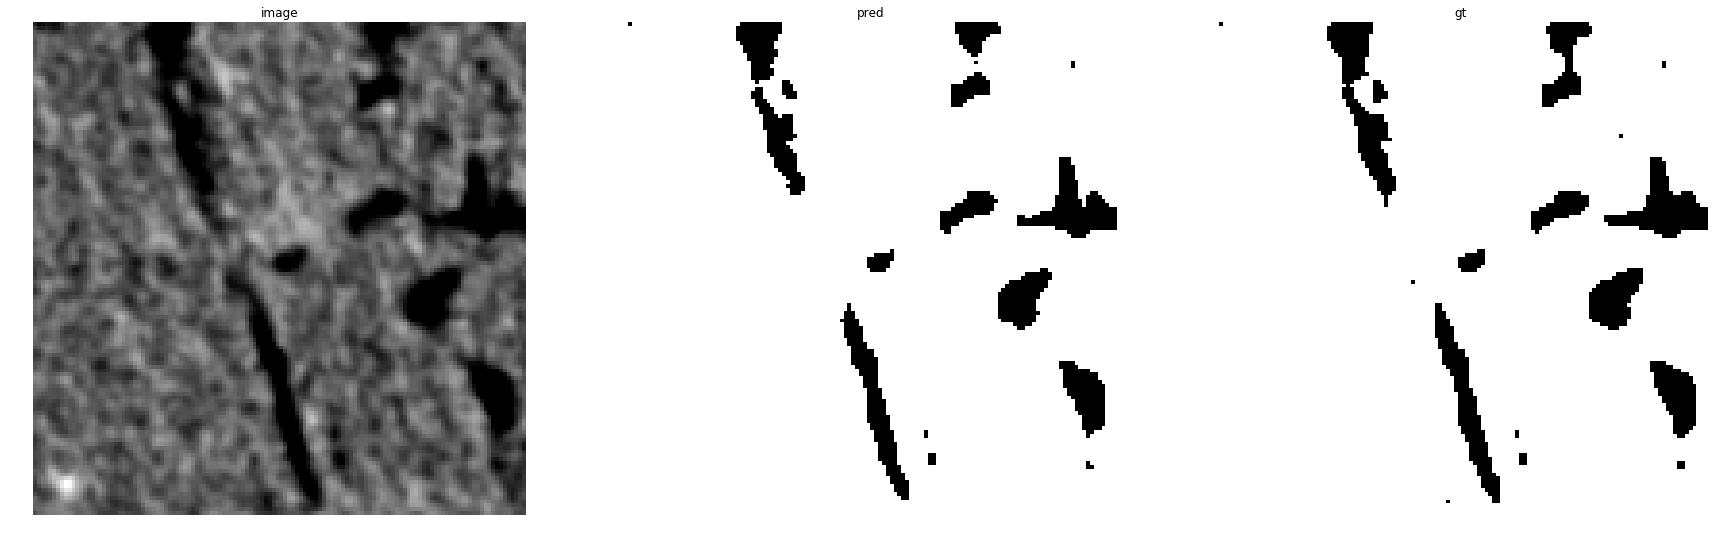

accuracy    : 0.9932861328125
precision   : 0.9930527987296546
recall      : 0.9996669774876782
f1          : 0.9963489113117366
pr_auc      : 0.9999716112738967
iou         : 0.9927243865335009


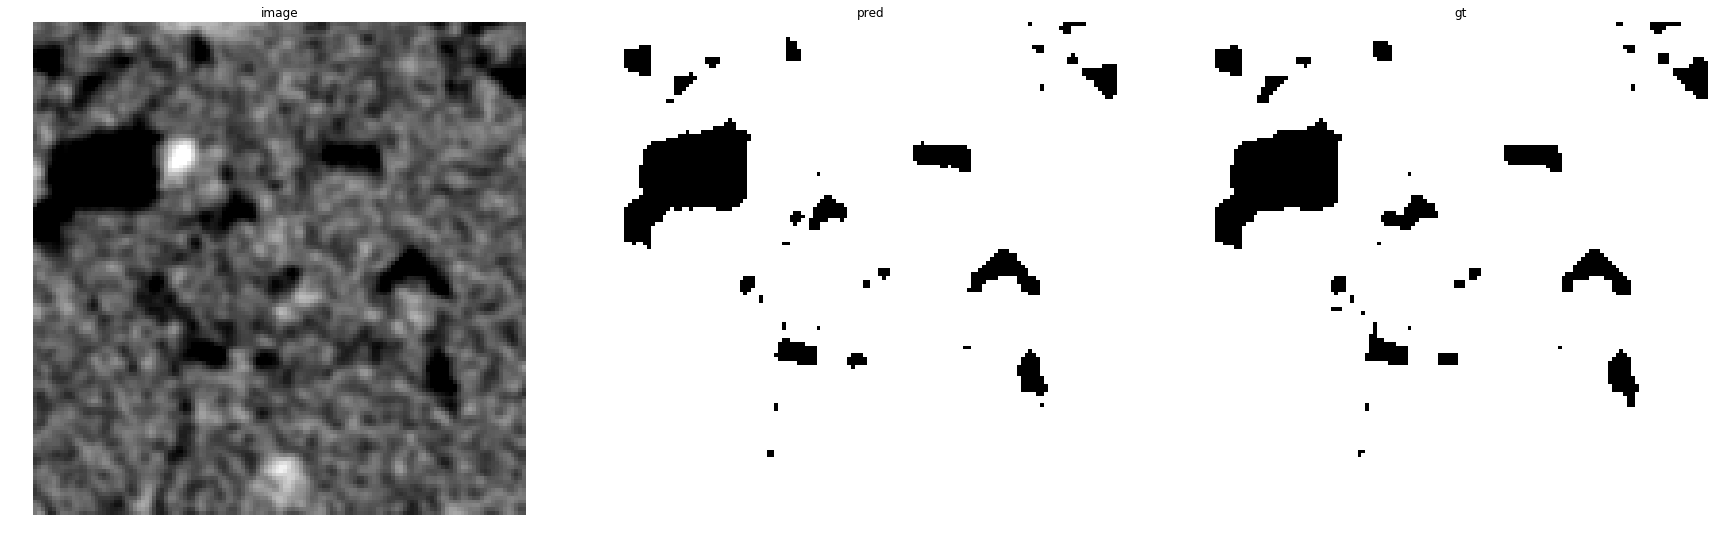

accuracy    : 0.99371337890625
precision   : 0.9947892619220368
recall      : 0.99841122732689
f1          : 0.9965969537780421
pr_auc      : 0.9999368402755326
iou         : 0.993216990451103


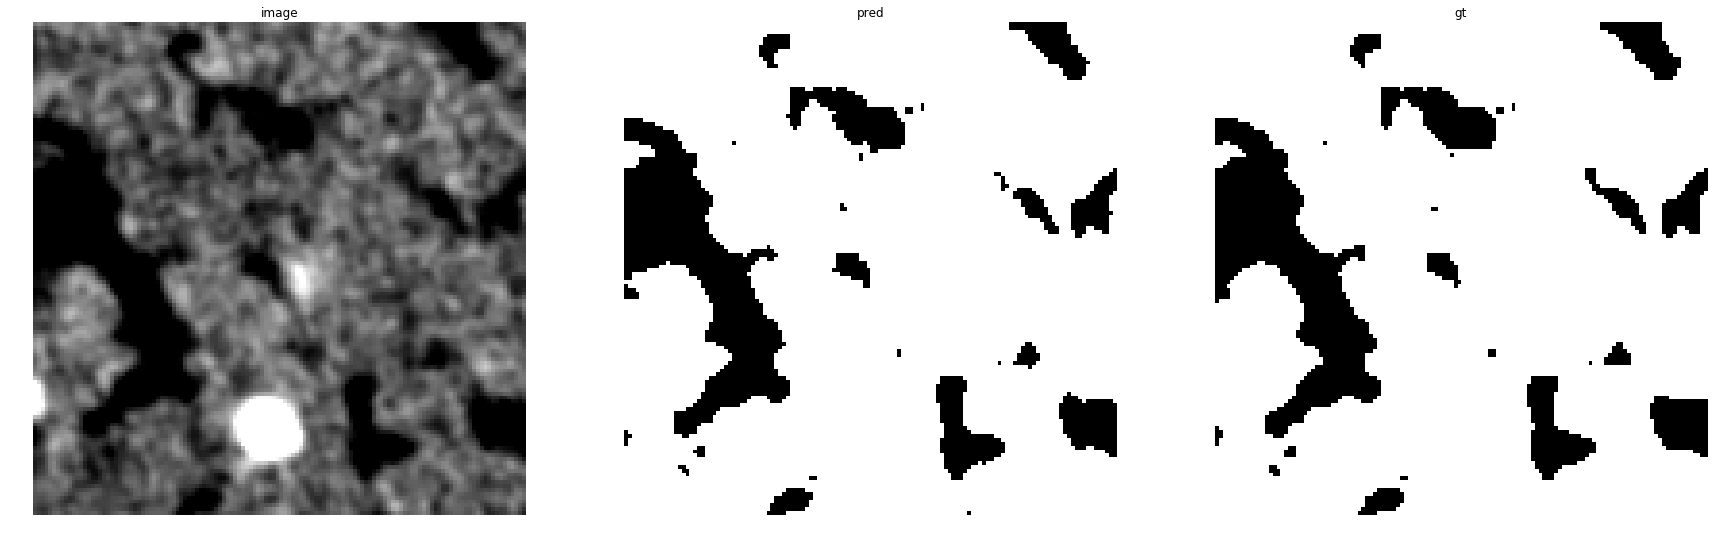

accuracy    : 0.9908447265625
precision   : 0.9919049008168028
recall      : 0.9971407624633432
f1          : 0.9945159403334309
pr_auc      : 0.9999261808475213
iou         : 0.989091702421642


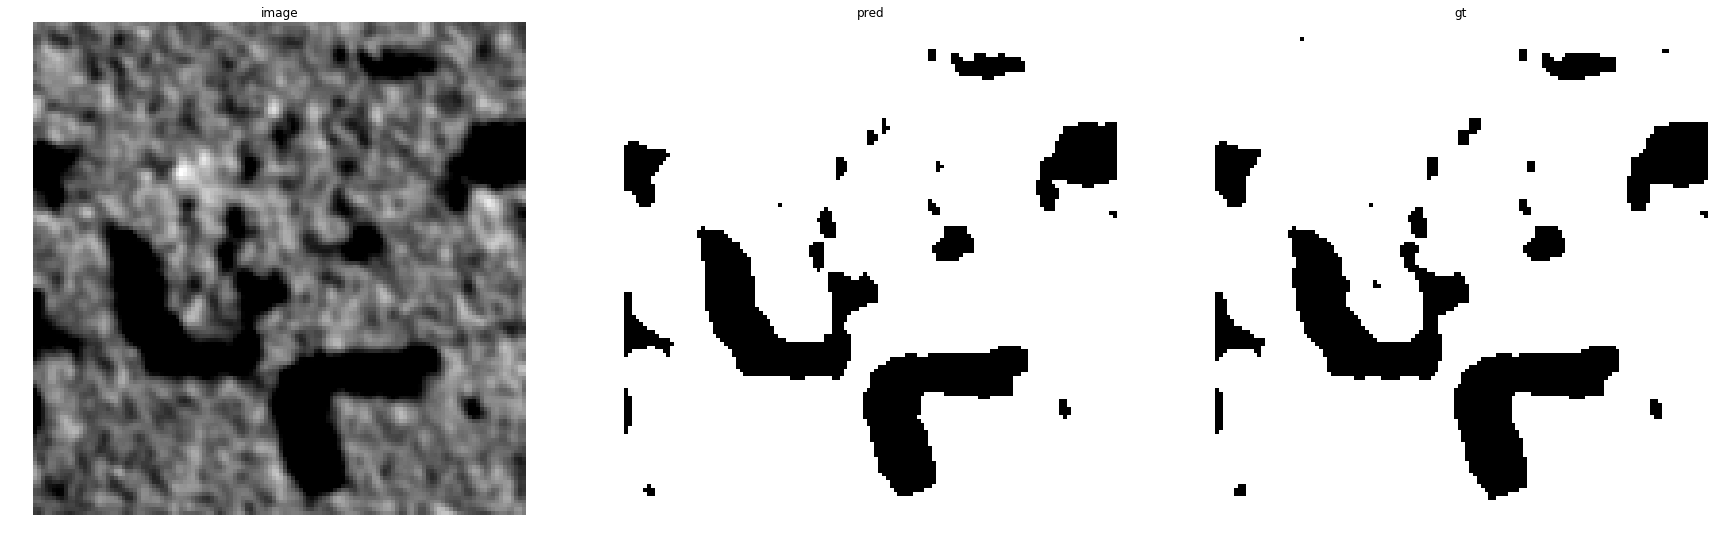

accuracy    : 0.9910888671875
precision   : 0.9897842548935563
recall      : 0.9997835185452446
f1          : 0.9947587593337163
pr_auc      : 0.999961226579587
iou         : 0.9895721734161845


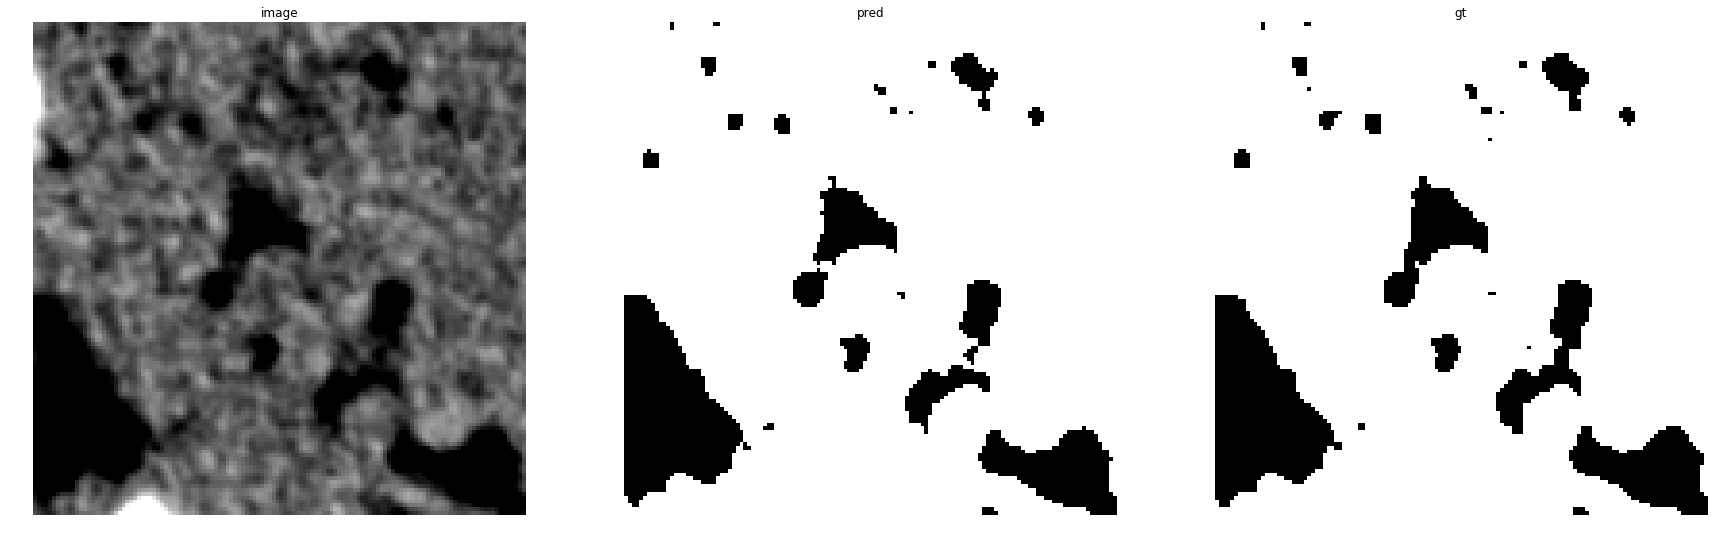

accuracy    : 0.99139404296875
precision   : 0.9904986426632376
recall      : 0.9994233403013046
f1          : 0.9949409780775716
pr_auc      : 0.9999324346273334
iou         : 0.9899328859060402


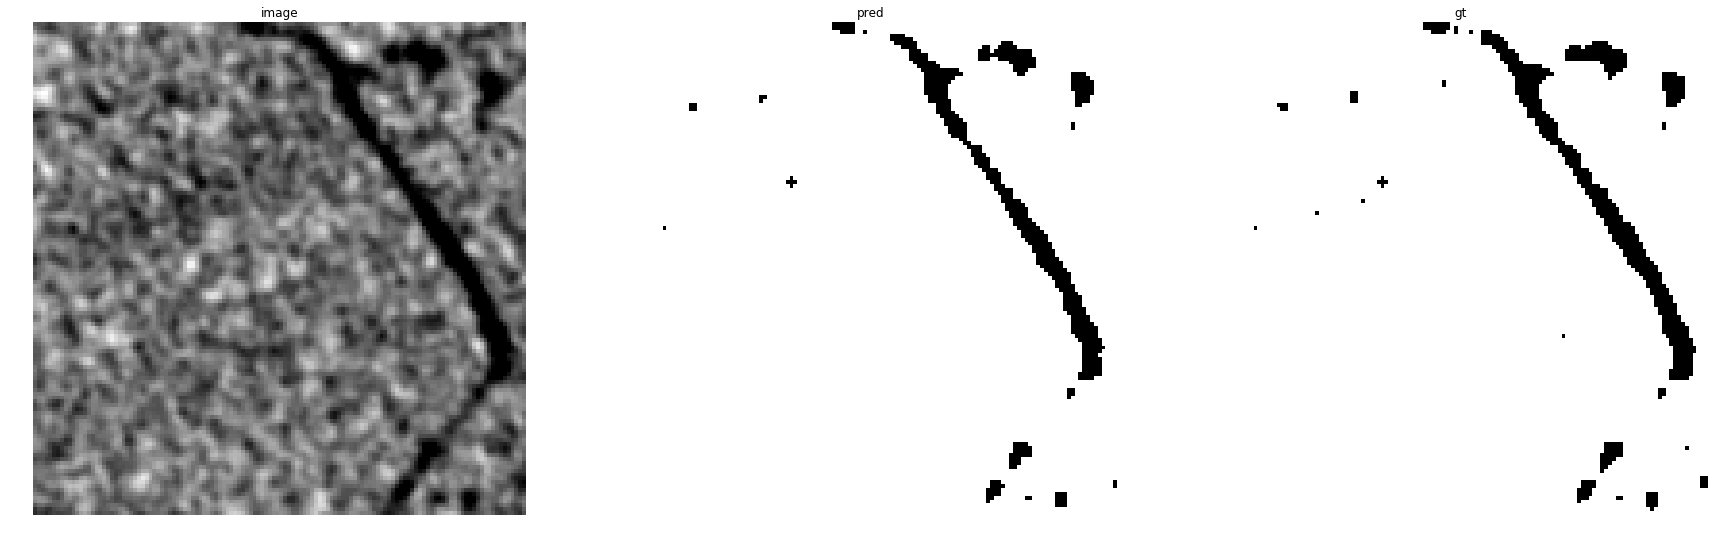

accuracy    : 0.99444580078125
precision   : 0.9943351791738273
recall      : 0.9998719918074757
f1          : 0.9970958991543003
pr_auc      : 0.9999902804358645
iou         : 0.9942086170686693


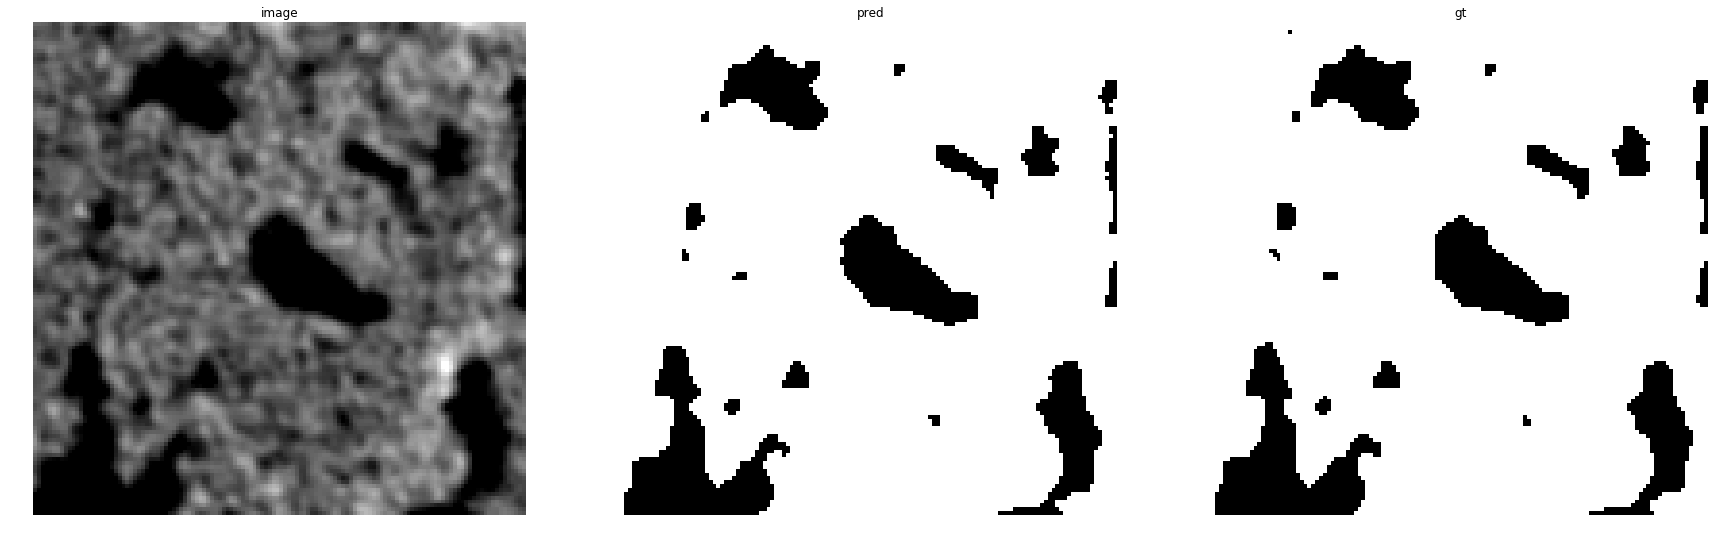

accuracy    : 0.99346923828125
precision   : 0.9937075437969253
recall      : 0.9986346651336591
f1          : 0.9961650120067381
pr_auc      : 0.9999488845560727
iou         : 0.9923593259068837


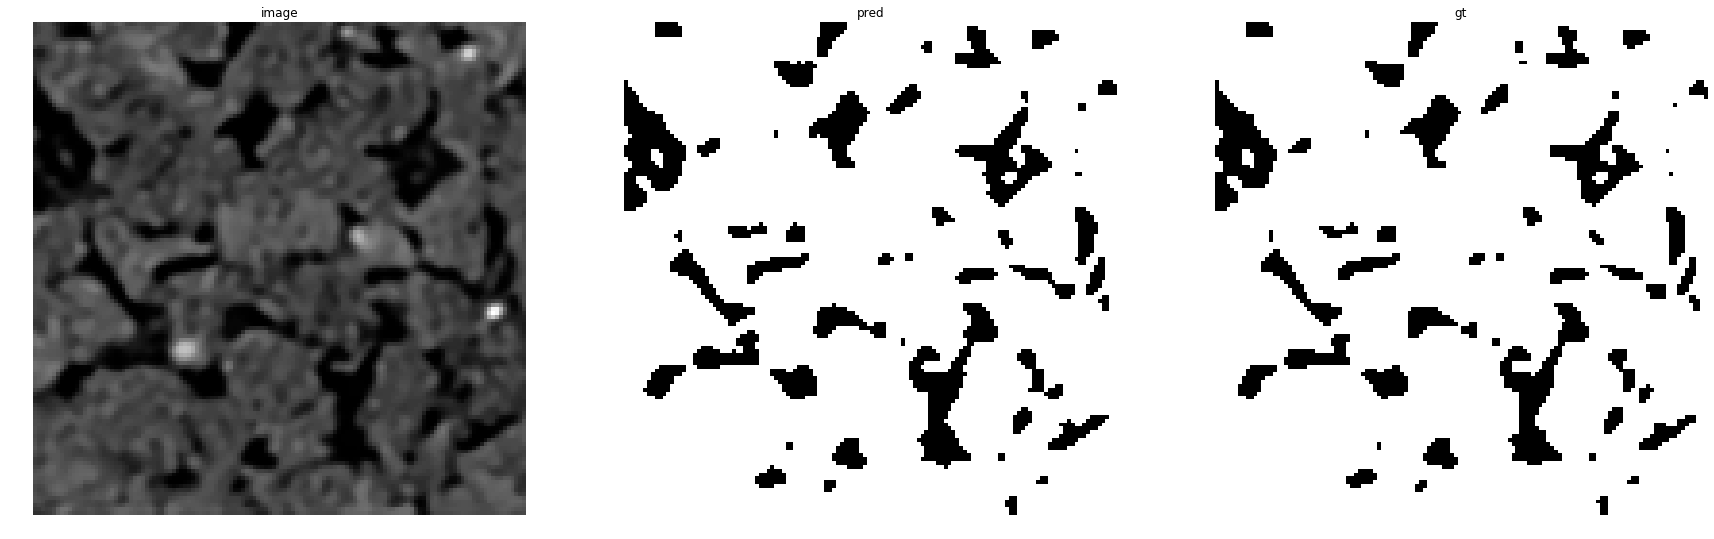

accuracy    : 0.98626708984375
precision   : 0.9987187700192185
recall      : 0.9854614412136536
f1          : 0.9920458160992682
pr_auc      : 0.9999206560049968
iou         : 0.9842171717171717


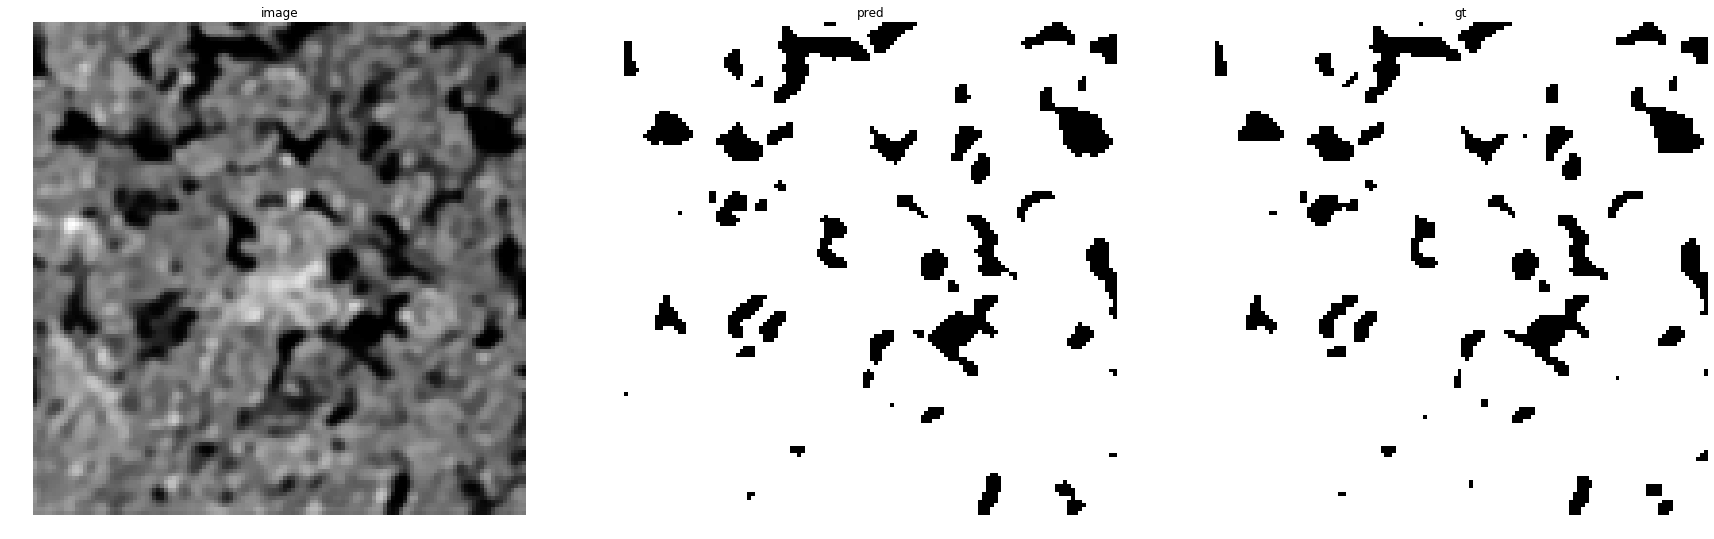

accuracy    : 0.98809814453125
precision   : 0.9969297946373746
recall      : 0.9898387752337082
f1          : 0.9933716305788777
pr_auc      : 0.9999078784453663
iou         : 0.9868305531167691


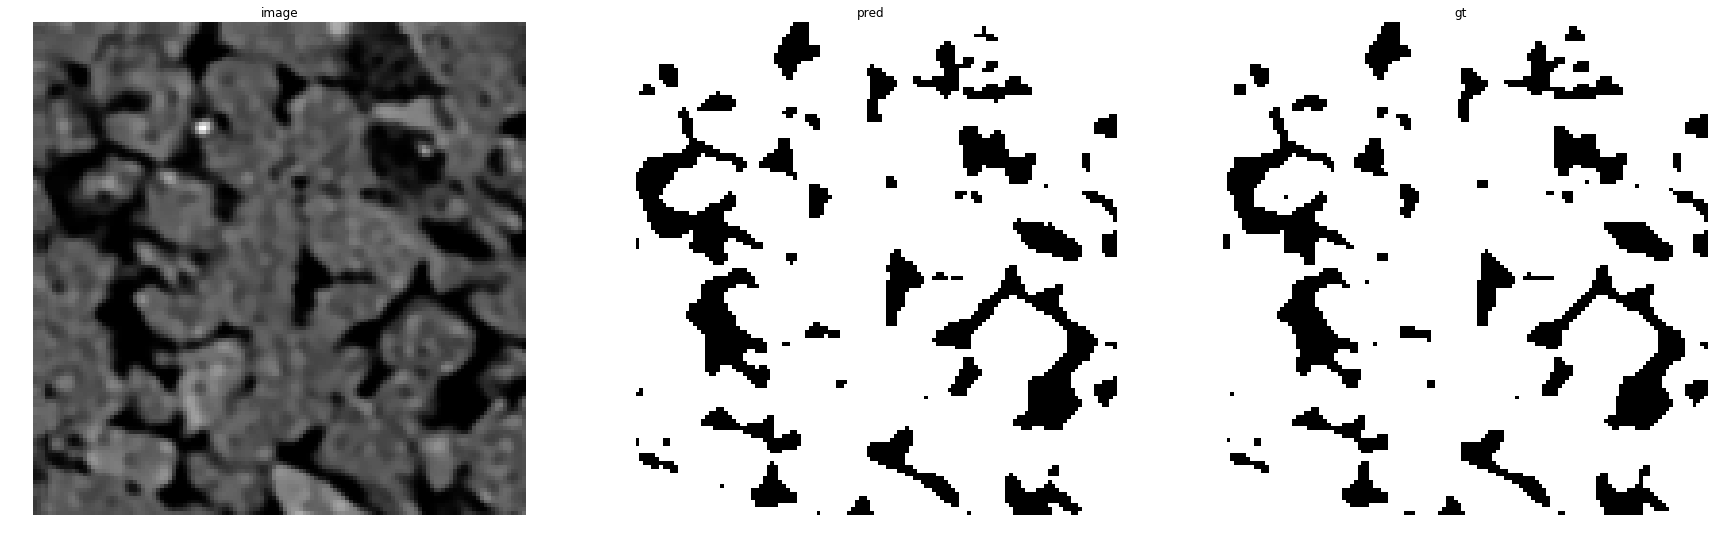

accuracy    : 0.9835205078125
precision   : 0.9956325412687838
recall      : 0.9845545714076568
f1          : 0.9900625690099374
pr_auc      : 0.9997922570358296
iou         : 0.9803206997084548


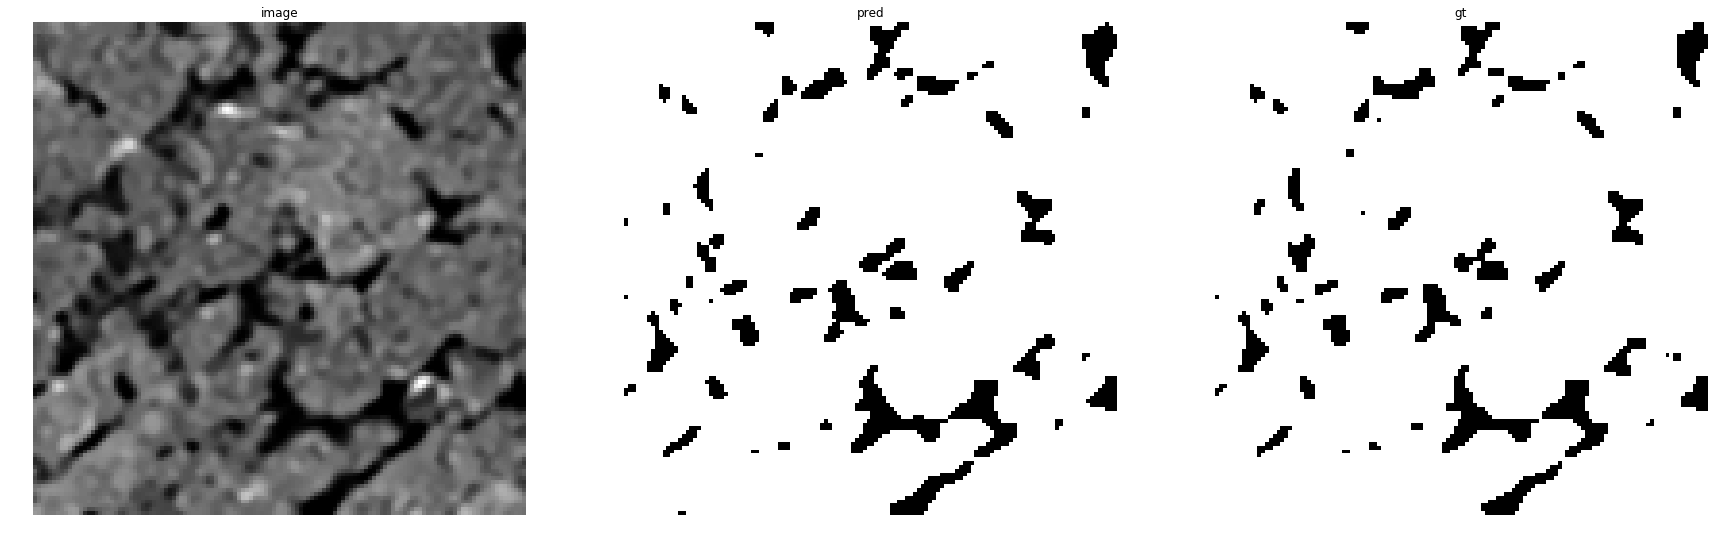

accuracy    : 0.98919677734375
precision   : 0.9962975429148435
recall      : 0.9918241522584104
f1          : 0.9940558148906874
pr_auc      : 0.9998969861618279
iou         : 0.9881818788809508


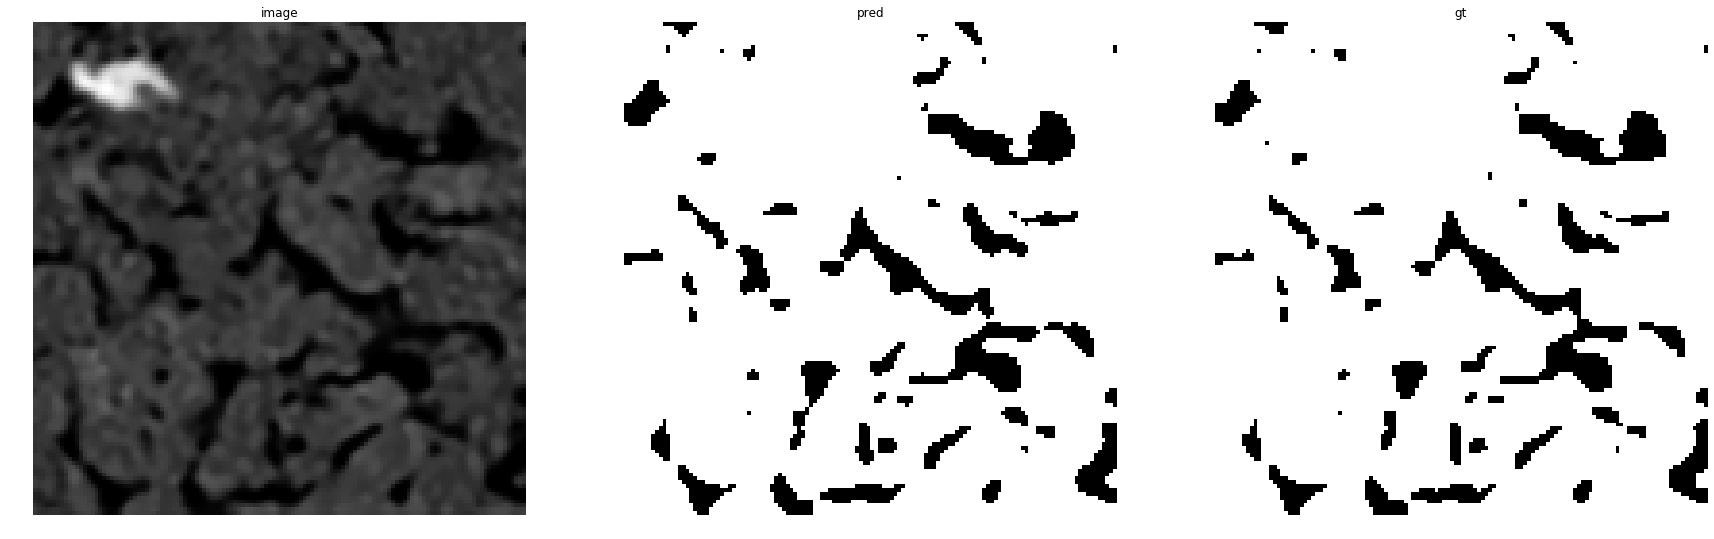

accuracy    : 0.9876708984375
precision   : 0.9974163815376021
recall      : 0.9885805246037788
f1          : 0.9929787973583594
pr_auc      : 0.9998945874648064
iou         : 0.9860555018638686


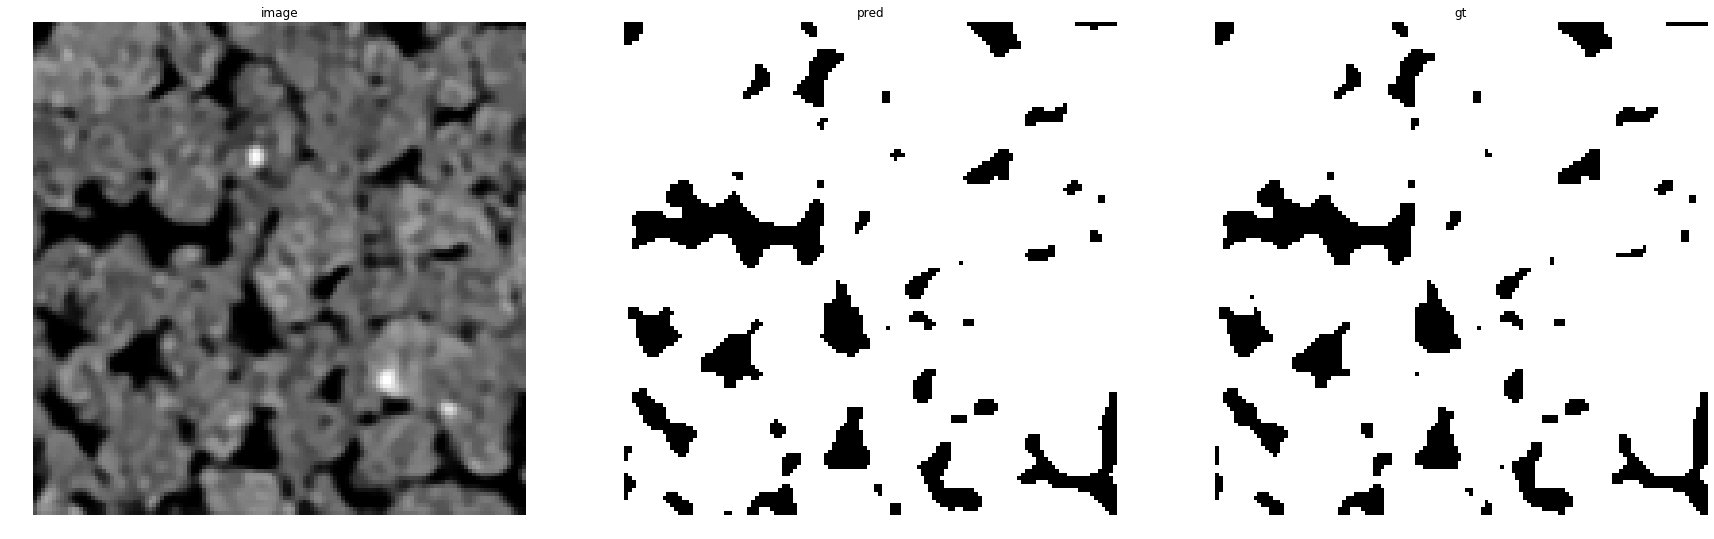

accuracy    : 0.98956298828125
precision   : 0.9985138004246285
recall      : 0.9894803282137598
f1          : 0.993976540209236
pr_auc      : 0.9999430463873098
iou         : 0.9880252100840337


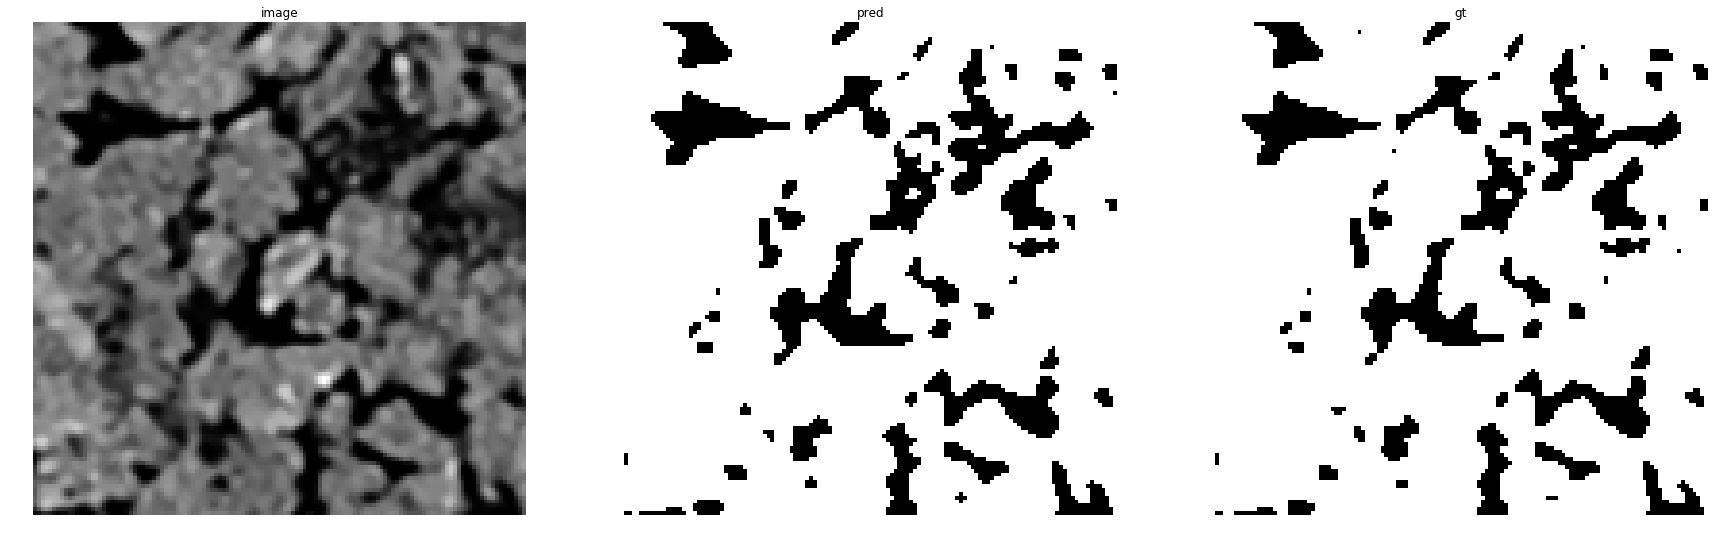

accuracy    : 0.98583984375
precision   : 0.9972521351652432
recall      : 0.9856859722528077
f1          : 0.9914353219137626
pr_auc      : 0.9998396038878201
iou         : 0.9830161054172767


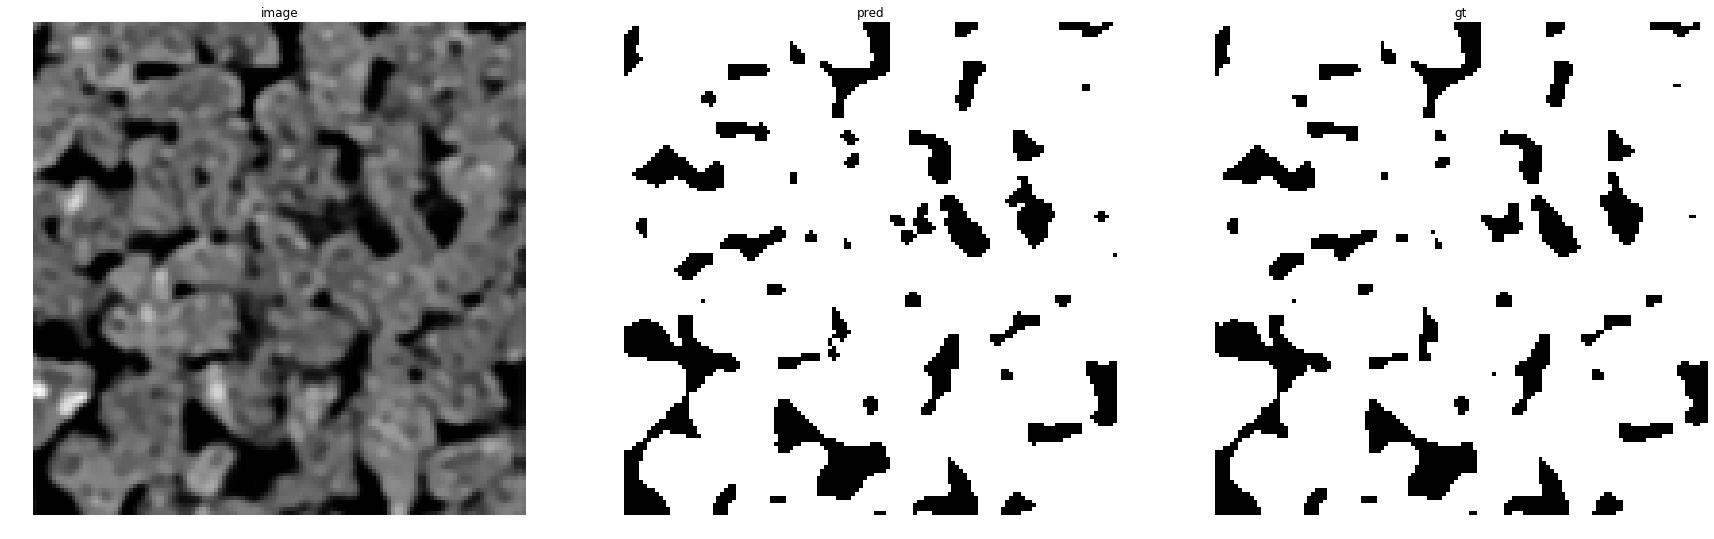

accuracy    : 0.9866943359375
precision   : 0.9966050274487143
recall      : 0.9877577319587629
f1          : 0.9921616568387746
pr_auc      : 0.9998618853680048
iou         : 0.984445237245808


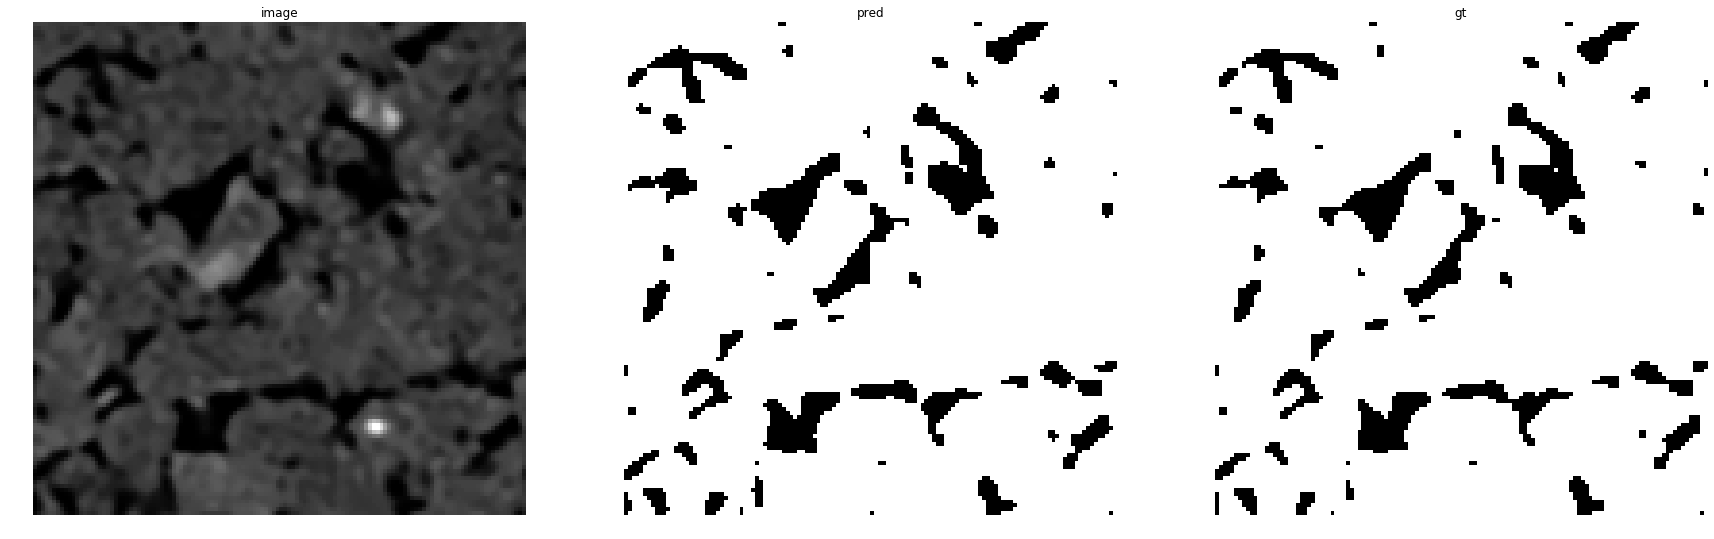

accuracy    : 0.989013671875
precision   : 0.9985410587744894
recall      : 0.9890586292320397
f1          : 0.9937772246421905
pr_auc      : 0.9999213617107898
iou         : 0.9876314162028448


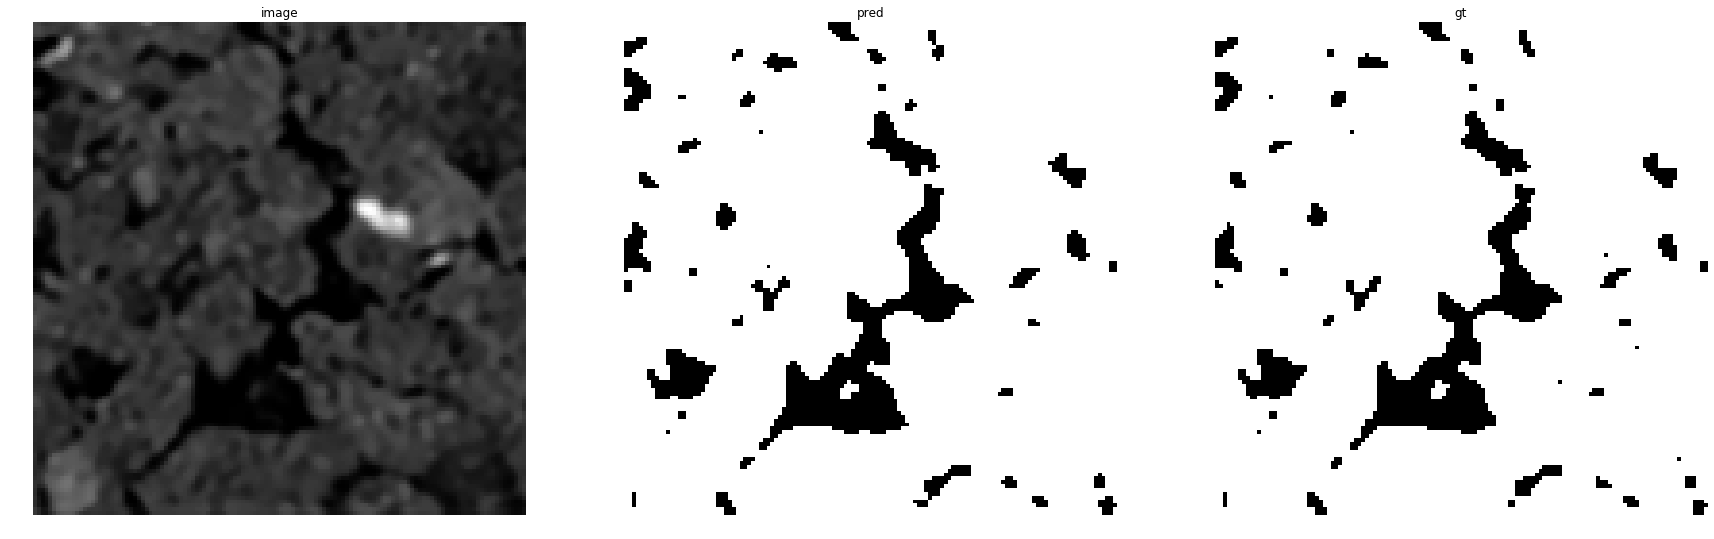

accuracy    : 0.9906005859375
precision   : 0.9983560517843688
recall      : 0.9911594695681741
f1          : 0.9947447447447448
pr_auc      : 0.9999499629208854
iou         : 0.9895444361463779


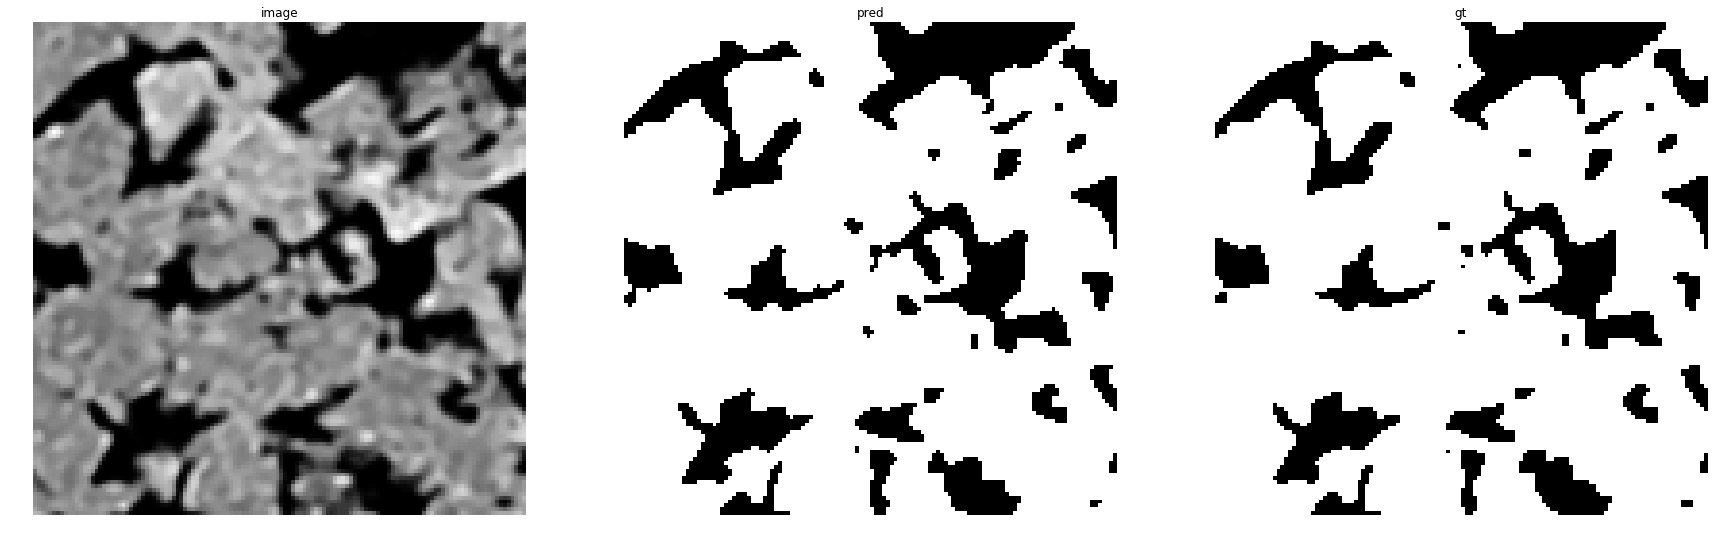

accuracy    : 0.98614501953125
precision   : 0.9974747474747475
recall      : 0.9848071679002727
f1          : 0.9911004822205669
pr_auc      : 0.9998224410579155
iou         : 0.9823579700007772


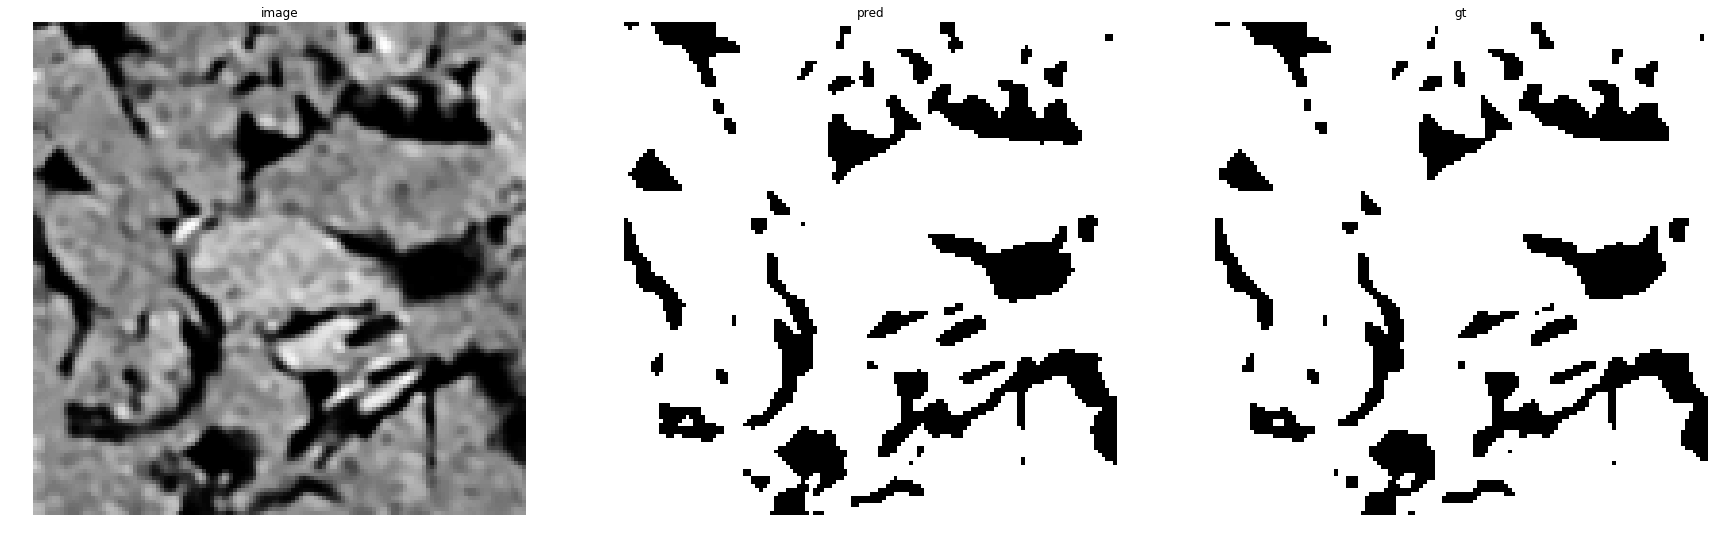

accuracy    : 0.98321533203125
precision   : 0.996487556983783
recall      : 0.9831883203067394
f1          : 0.9897932672679361
pr_auc      : 0.9998164676482573
iou         : 0.9797927841869352


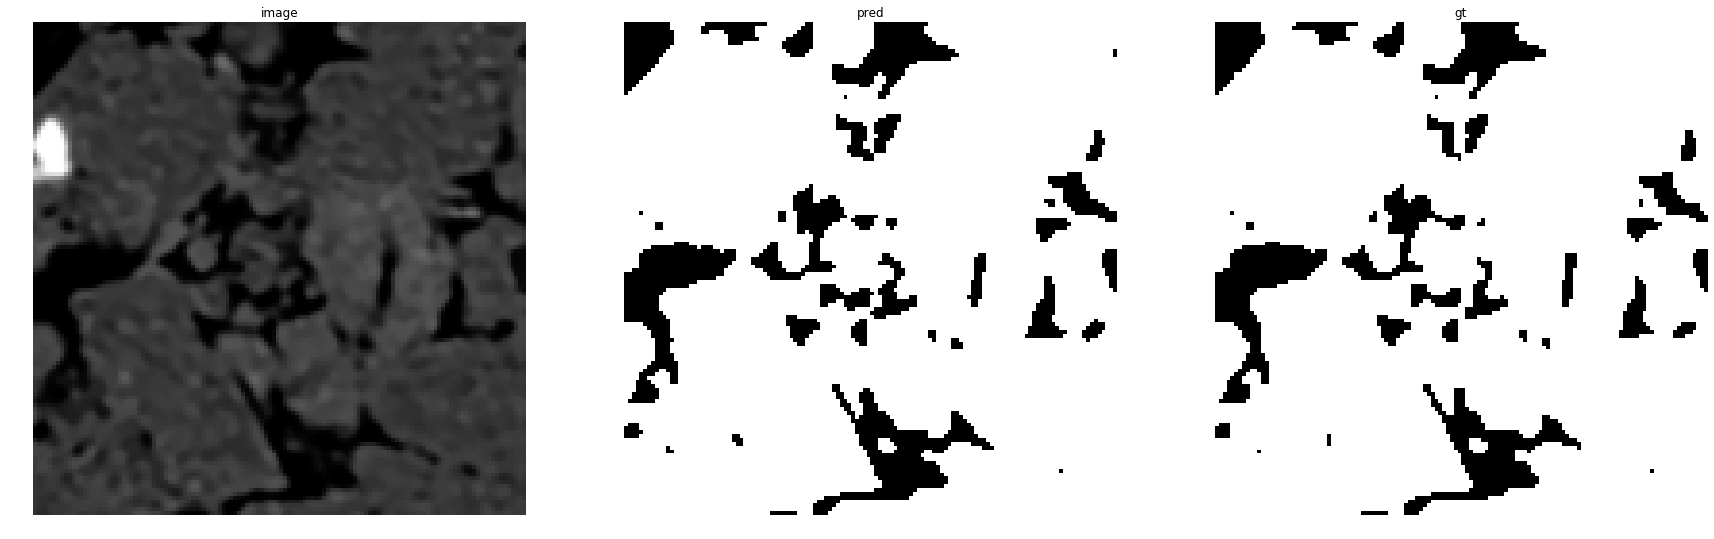

accuracy    : 0.98883056640625
precision   : 0.9982821558943525
recall      : 0.9887282007656316
f1          : 0.9934822096377818
pr_auc      : 0.9999269381305208
iou         : 0.9870488322717622


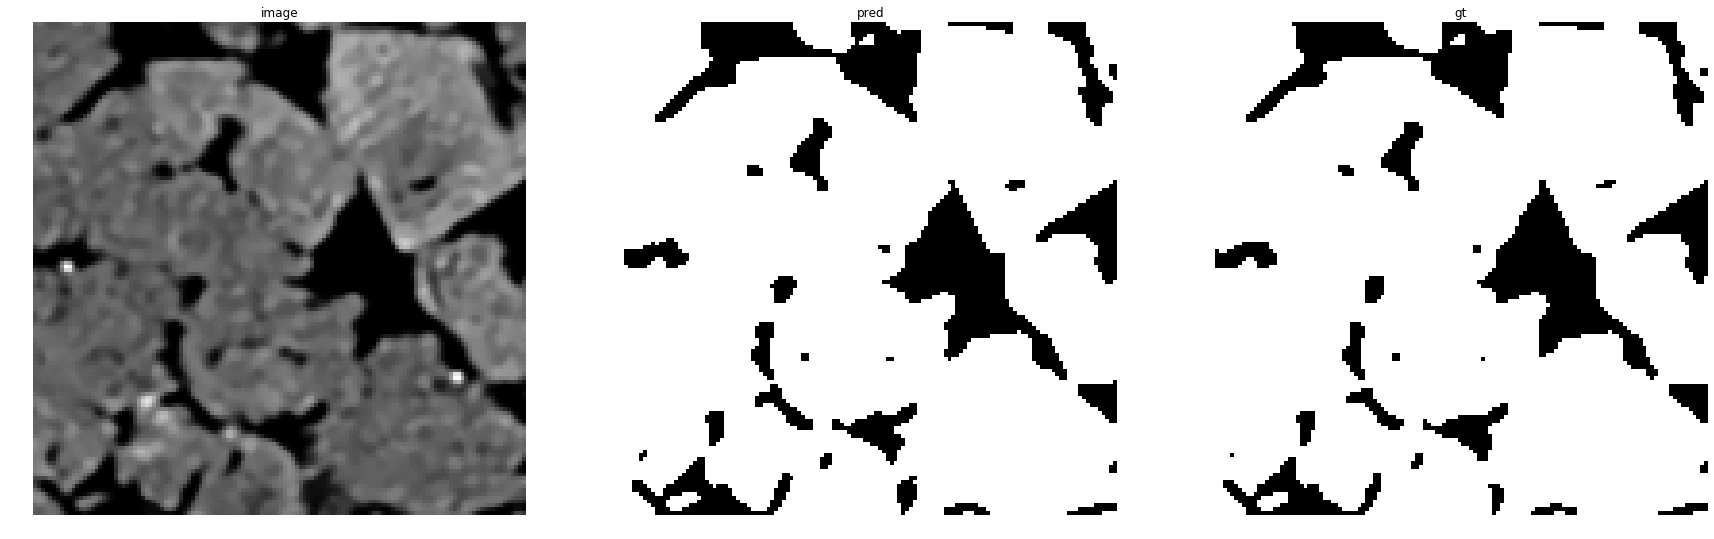

accuracy    : 0.99029541015625
precision   : 0.9988154290367958
recall      : 0.9895115153293238
f1          : 0.9941417044324086
pr_auc      : 0.9999346199157828
iou         : 0.9883516483516483


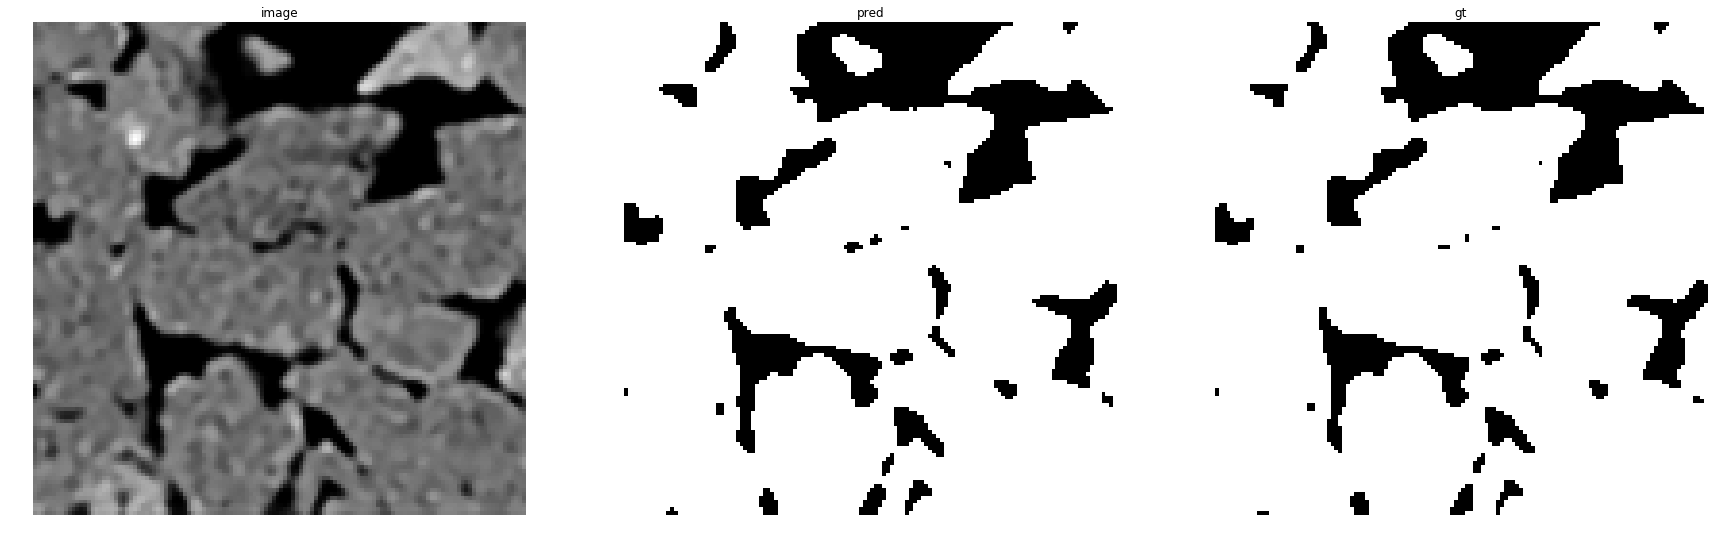

accuracy    : 0.98944091796875
precision   : 0.9985196150999259
recall      : 0.9887854577438979
f1          : 0.9936286966449378
pr_auc      : 0.9999352029185362
iou         : 0.9873380663104735


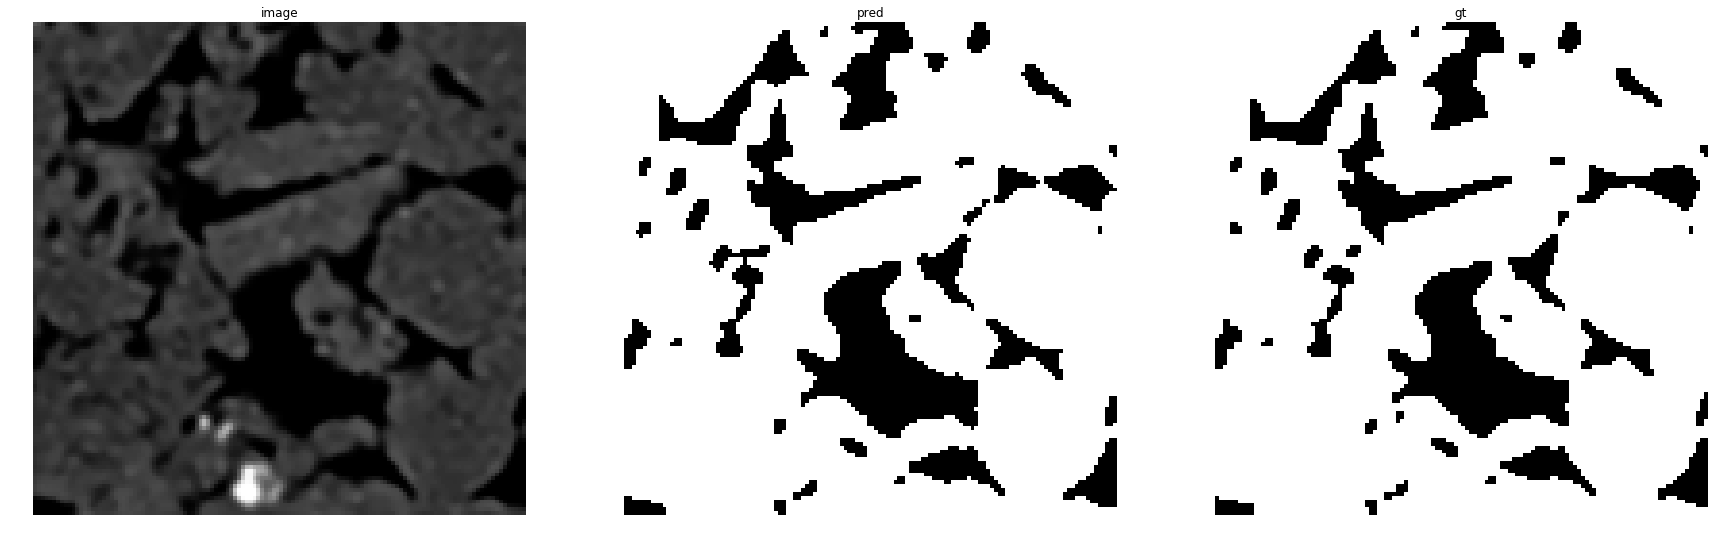

accuracy    : 0.98779296875
precision   : 0.9979353062629044
recall      : 0.9869167359903199
f1          : 0.9923954372623575
pr_auc      : 0.9999019970145855
iou         : 0.9849056603773585


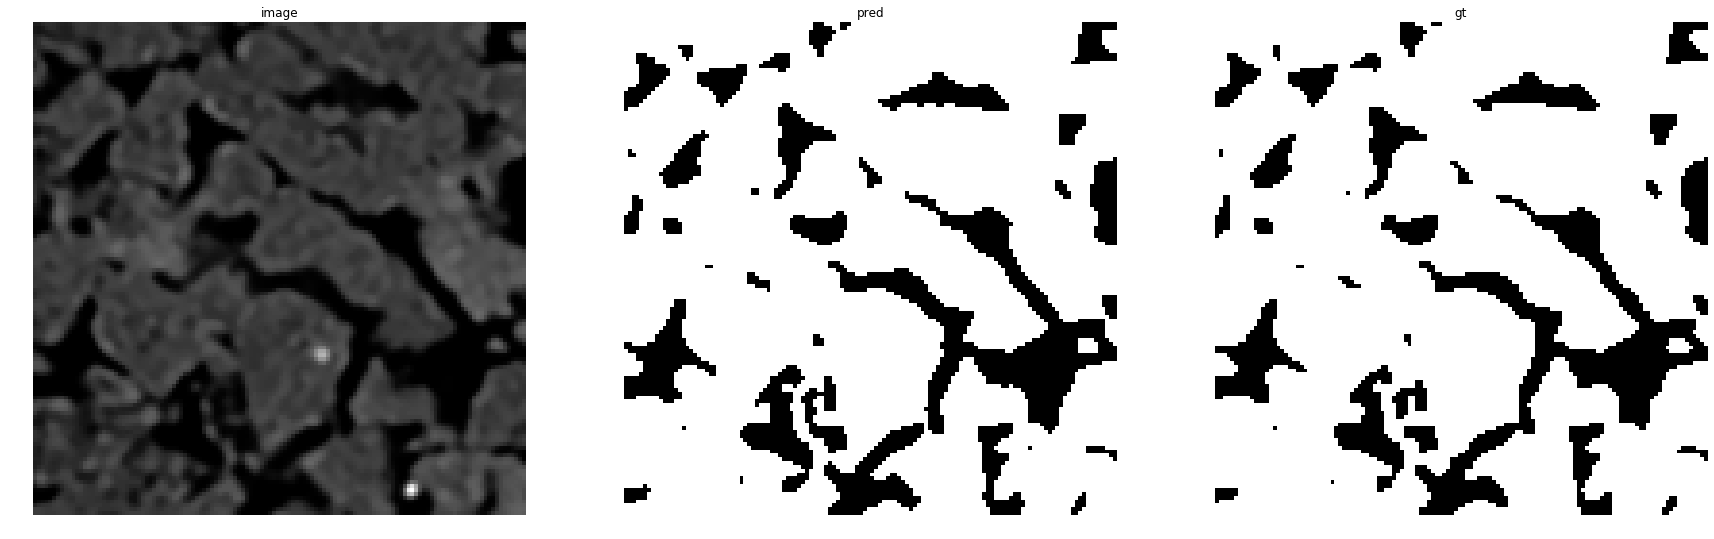

accuracy    : 0.98388671875
precision   : 0.9975437519189438
recall      : 0.9824614454188086
f1          : 0.989945155393053
pr_auc      : 0.9998130104161103
iou         : 0.9800904977375565


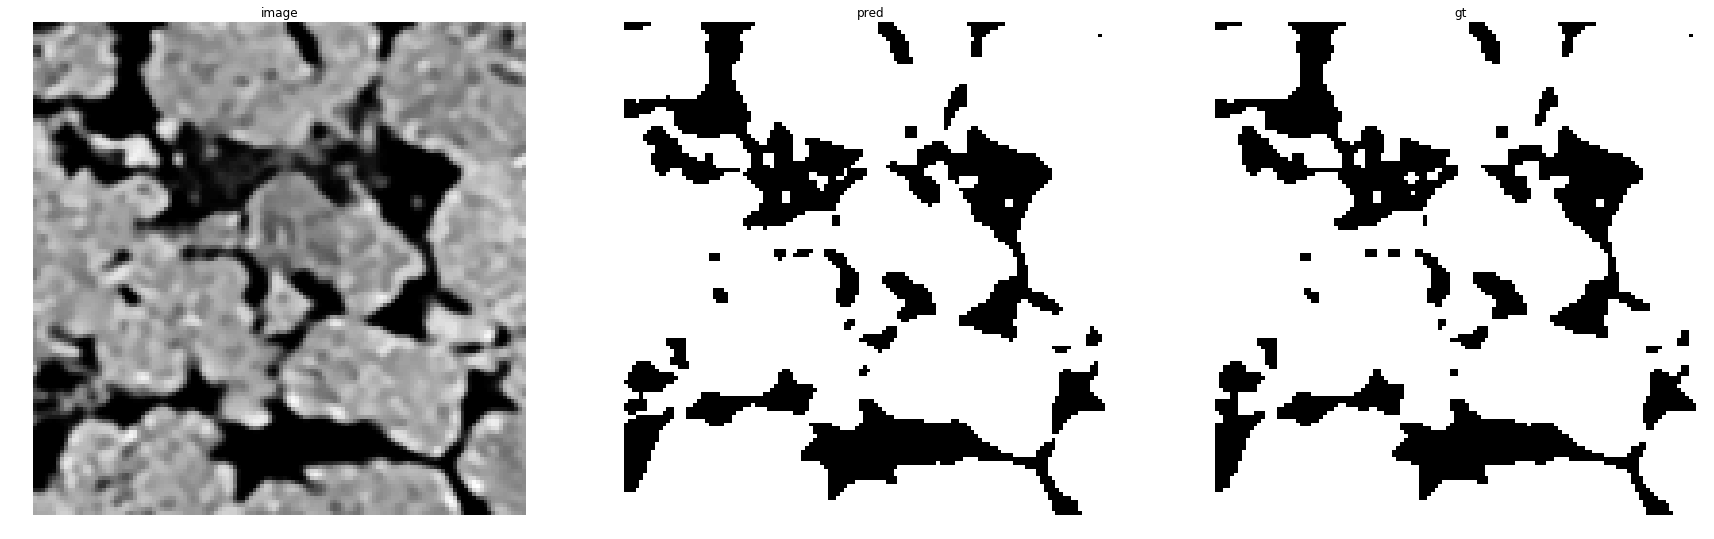

accuracy    : 0.98486328125
precision   : 0.9967943706020328
recall      : 0.9840228465575795
f1          : 0.9903674357181699
pr_auc      : 0.9998456362713177
iou         : 0.9809186735400477


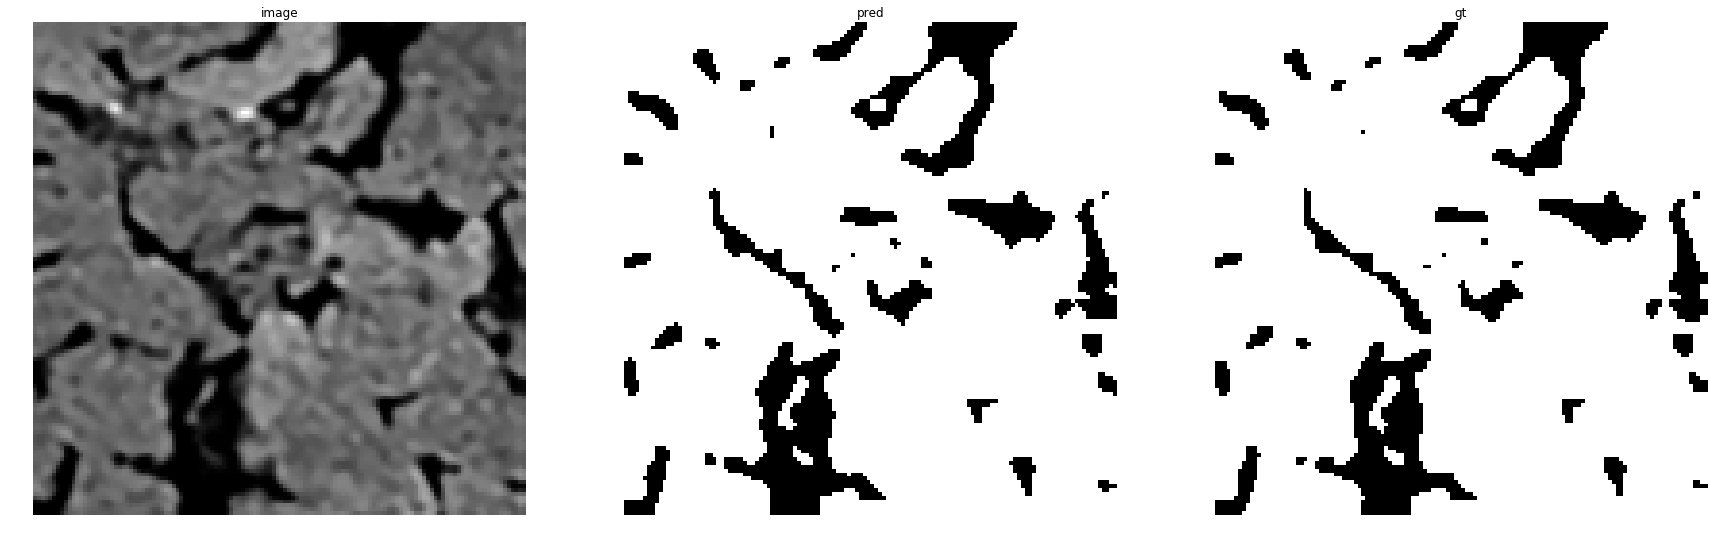

accuracy    : 0.98858642578125
precision   : 0.9984824396589103
recall      : 0.9881284416791819
f1          : 0.9932784587182345
pr_auc      : 0.9999155776013583
iou         : 0.9866466723793202


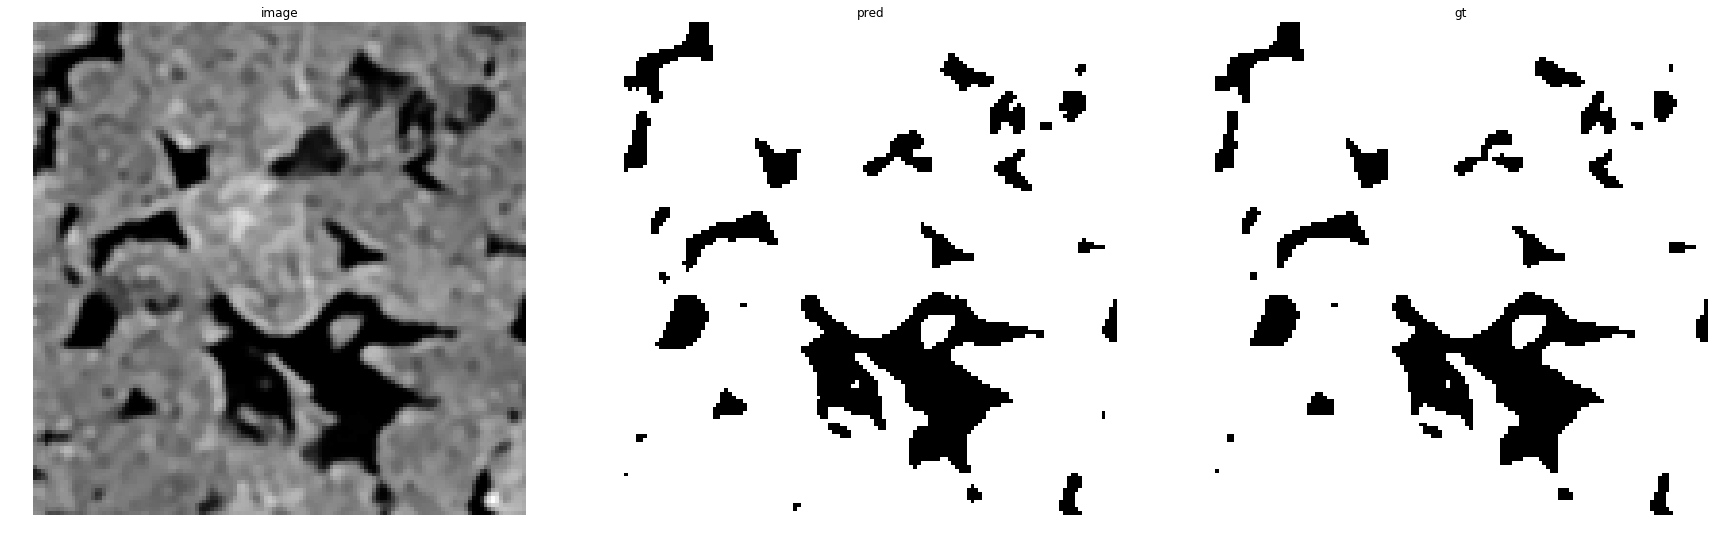

accuracy    : 0.98822021484375
precision   : 0.9990710968202929
recall      : 0.9872899308007343
f1          : 0.993145576588415
pr_auc      : 0.9999291144409514
iou         : 0.9863844797178131


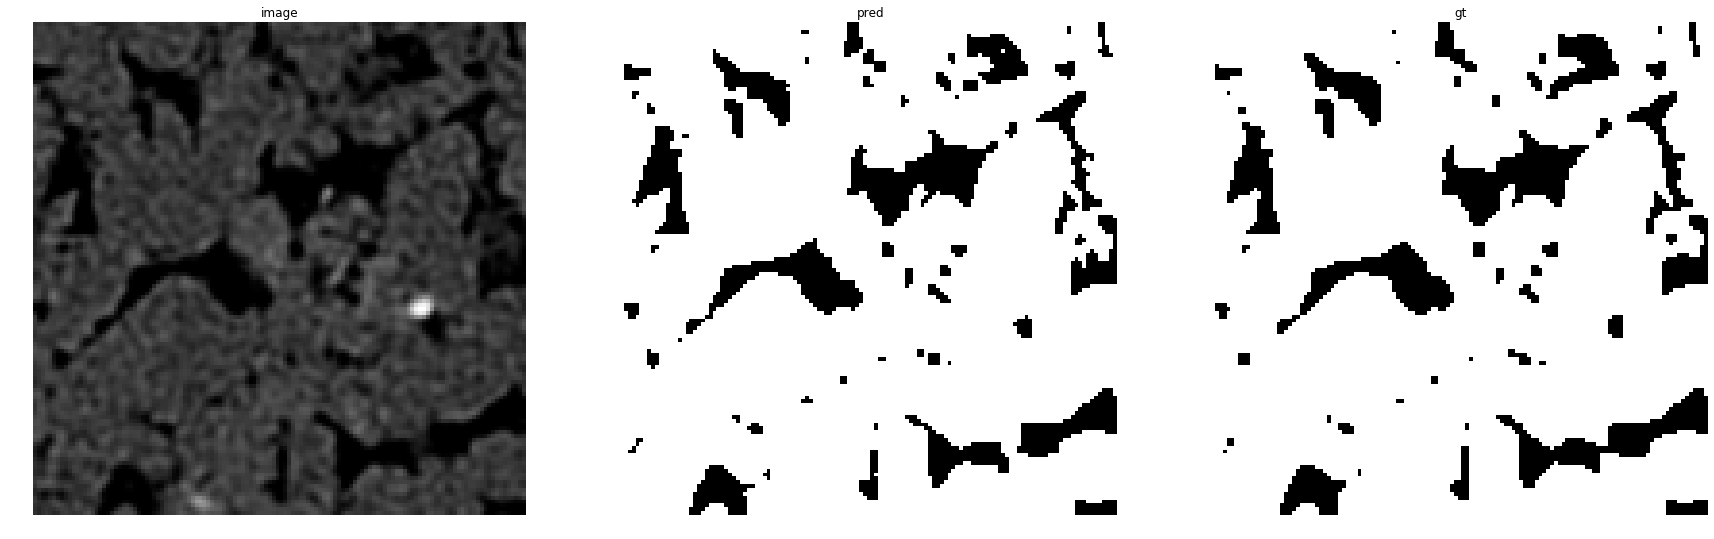

accuracy    : 0.98504638671875
precision   : 0.9869562101340214
recall      : 0.9954460026022842
f1          : 0.991182927268147
pr_auc      : 0.9997060560115066
iou         : 0.9825199771689498


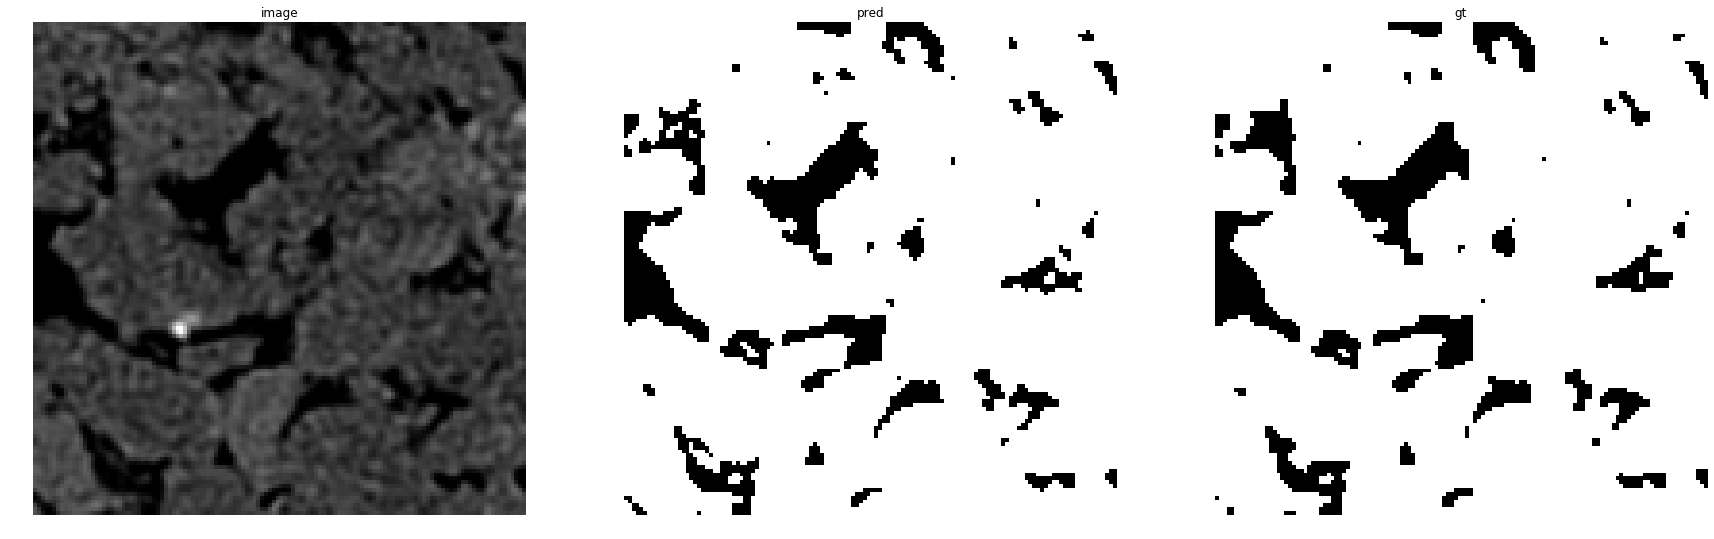

accuracy    : 0.98529052734375
precision   : 0.9900525394045534
recall      : 0.9930438448566611
f1          : 0.9915459360858736
pr_auc      : 0.9997834176311512
iou         : 0.9832336162515654


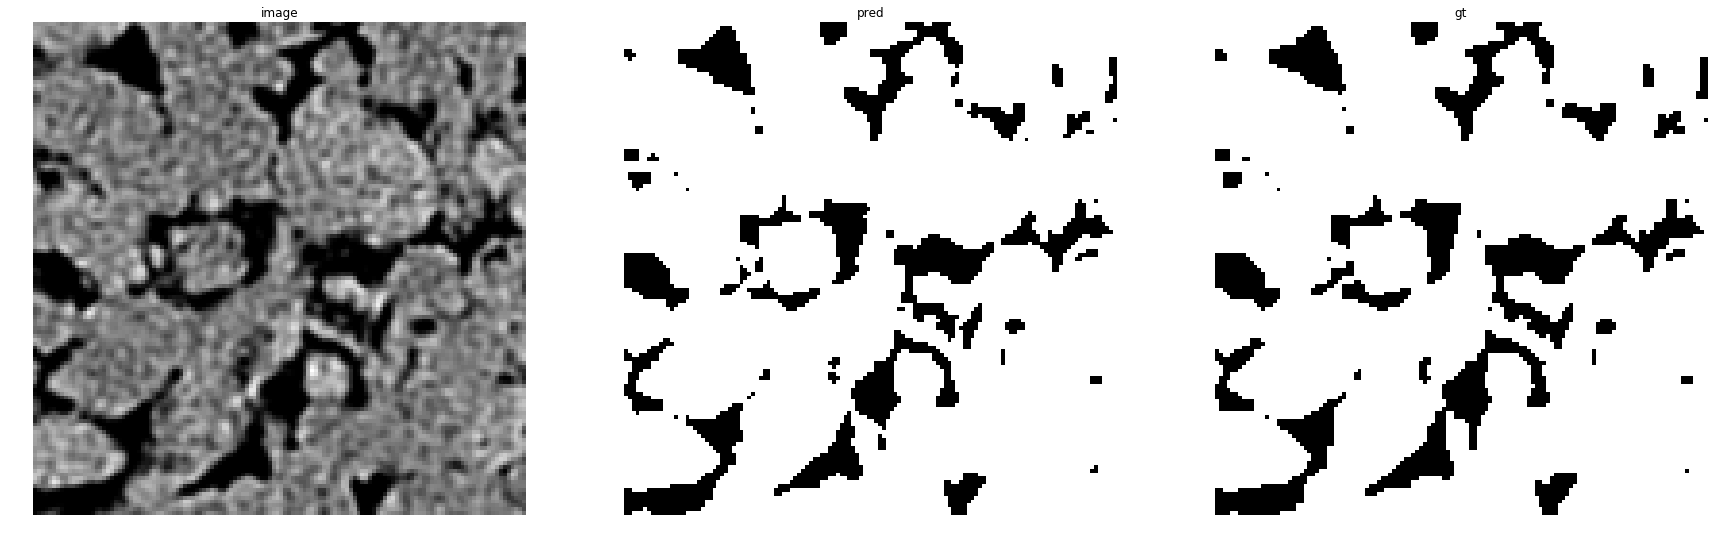

accuracy    : 0.98370361328125
precision   : 0.9840190903174488
recall      : 0.9966310238757873
f1          : 0.9902849033948259
pr_auc      : 0.9997412268049253
iou         : 0.9807567567567568


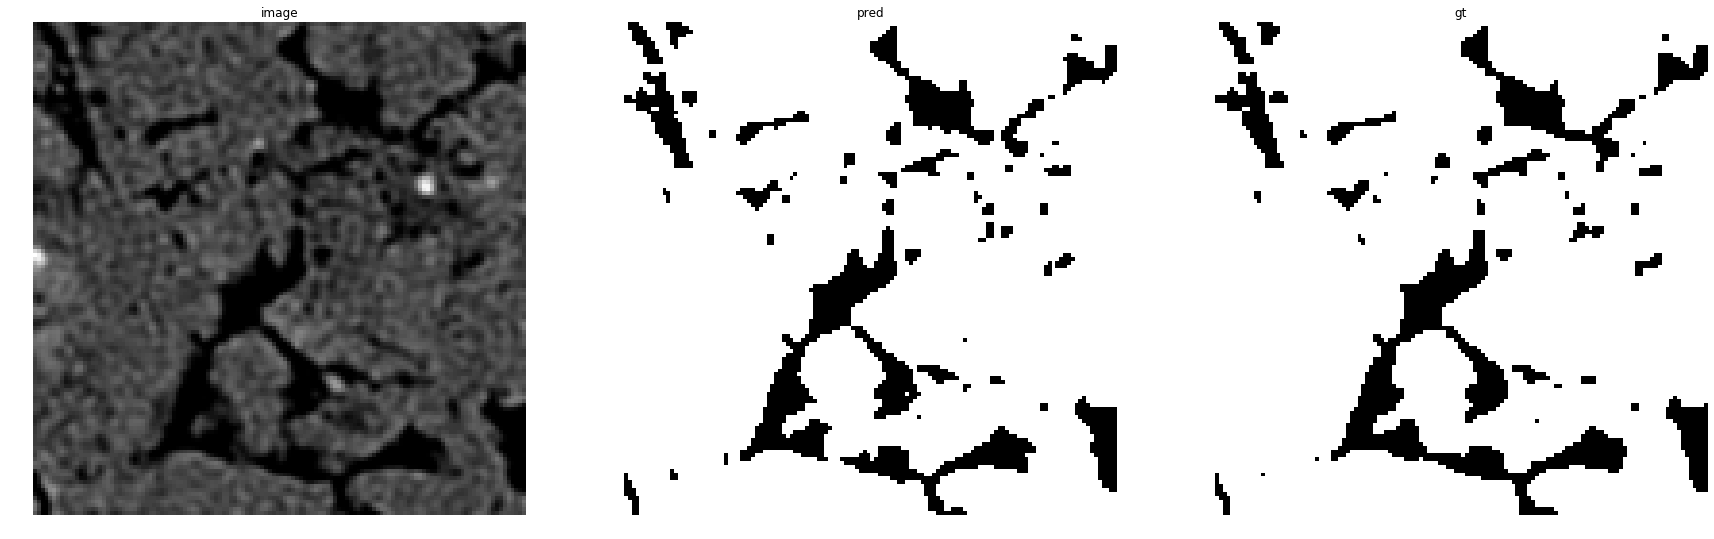

accuracy    : 0.98406982421875
precision   : 0.9883227176220807
recall      : 0.993172605077875
f1          : 0.9907417260827924
pr_auc      : 0.9997102308519437
iou         : 0.9816533108393083


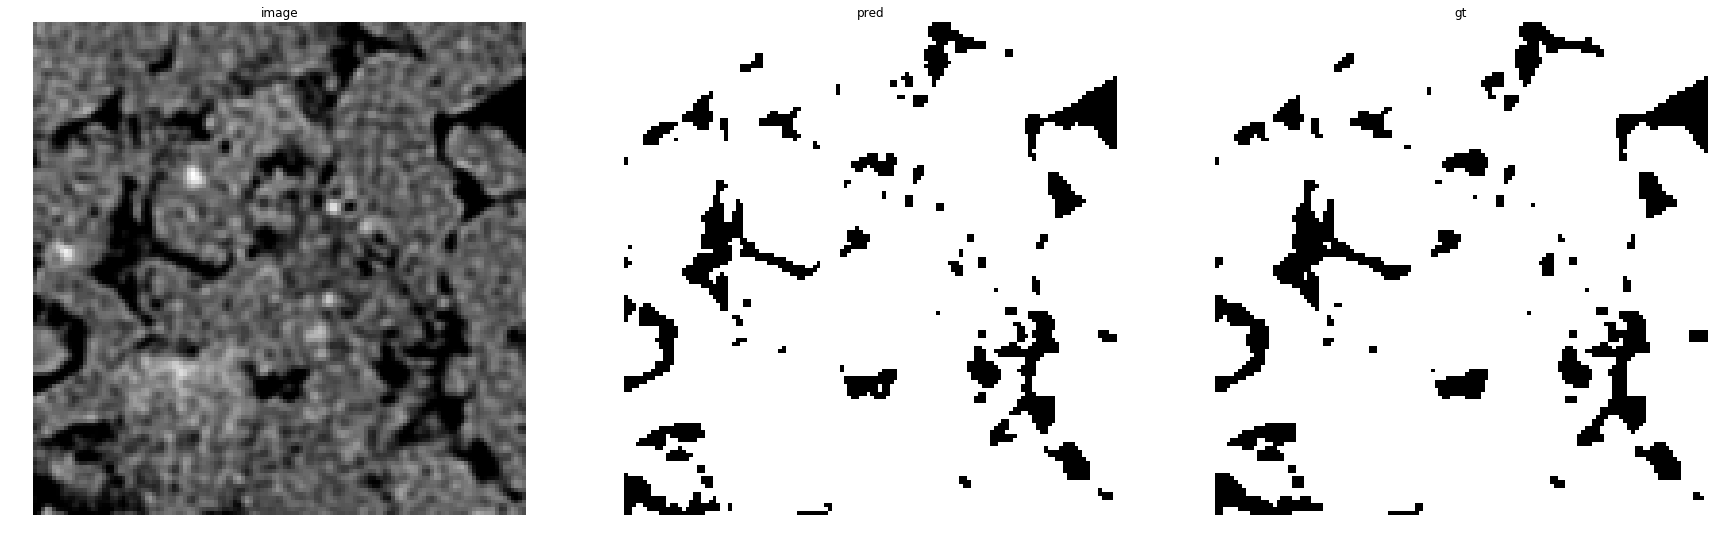

accuracy    : 0.9818115234375
precision   : 0.9834341490239208
recall      : 0.996031746031746
f1          : 0.9896928610957388
pr_auc      : 0.9996421627270202
iou         : 0.9795960287572749


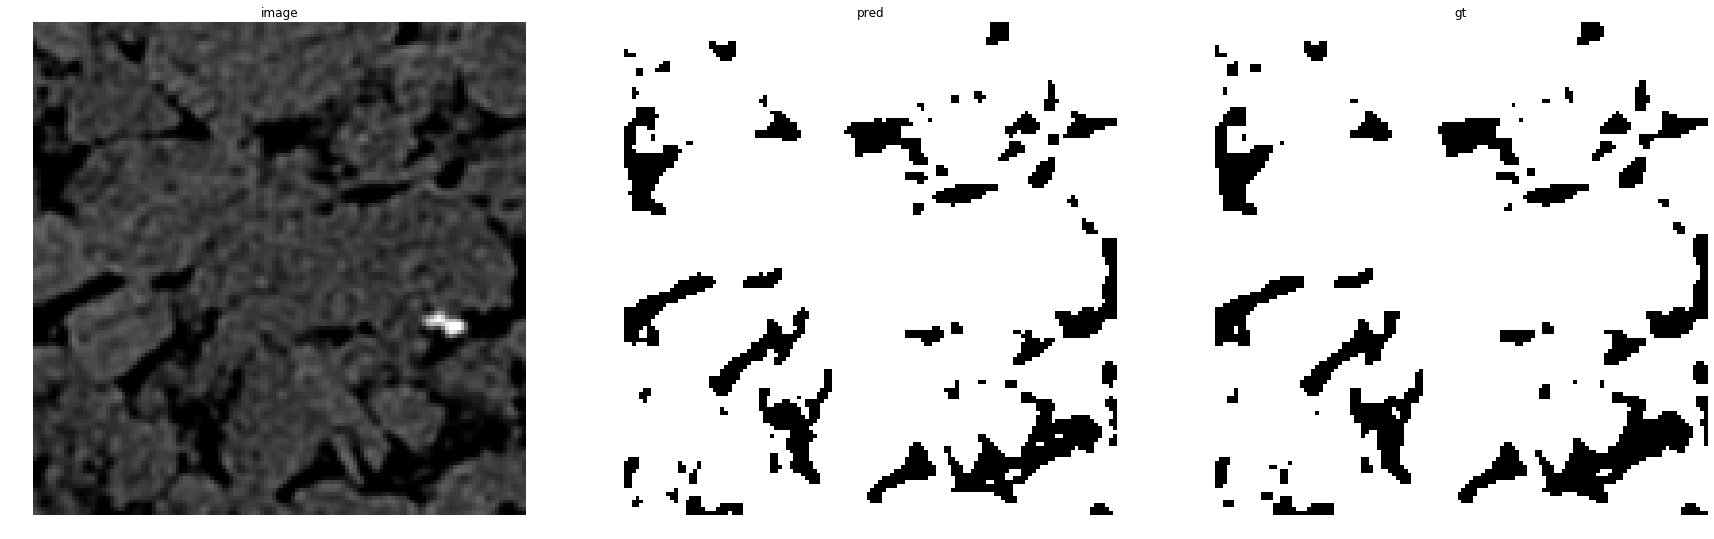

accuracy    : 0.9832763671875
precision   : 0.9878488166725539
recall      : 0.9927582534611289
f1          : 0.9902974504249291
pr_auc      : 0.9997219709489648
iou         : 0.9807813705548152


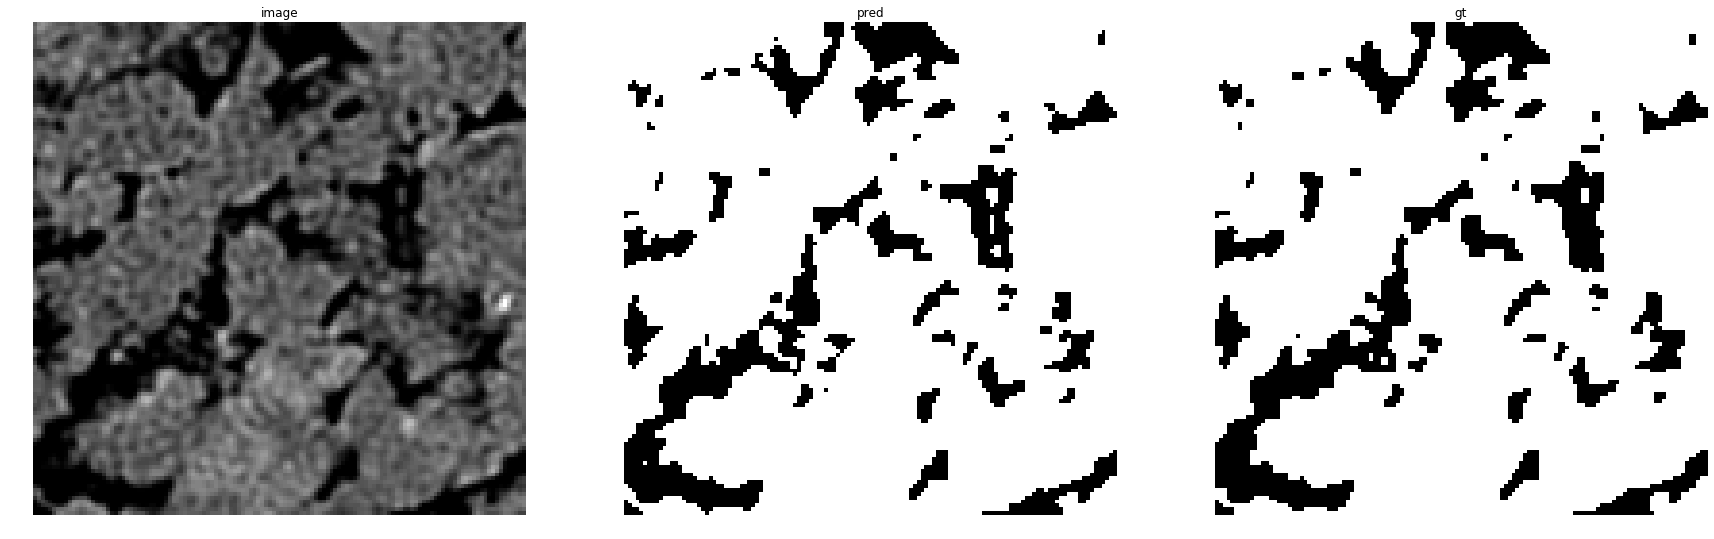

accuracy    : 0.97998046875
precision   : 0.9835164835164835
recall      : 0.9920611144397843
f1          : 0.9877703206562266
pr_auc      : 0.9995207467253693
iou         : 0.9758361573596581


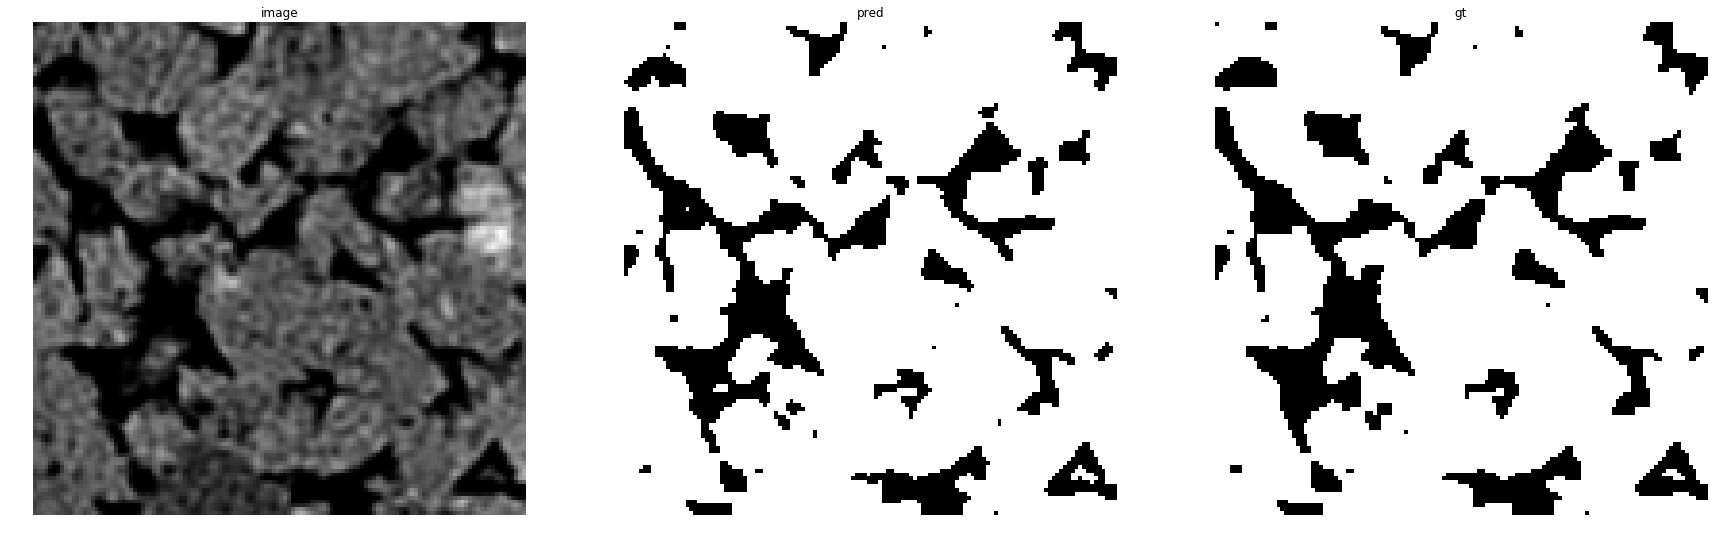

accuracy    : 0.97857666015625
precision   : 0.9788173652694611
recall      : 0.9948269303917839
f1          : 0.9867572156196944
pr_auc      : 0.9995069824813888
iou         : 0.9738605898123325


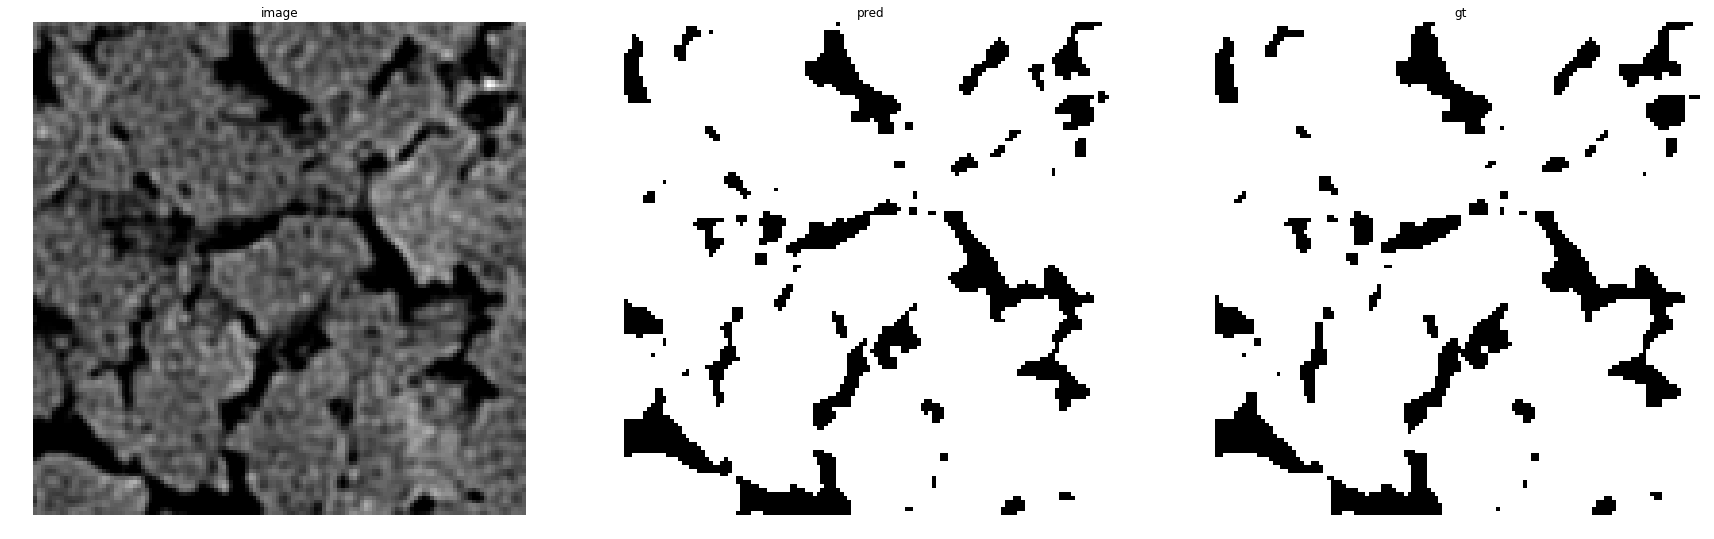

accuracy    : 0.98370361328125
precision   : 0.9892030117914477
recall      : 0.991809700163806
f1          : 0.9905046409900778
pr_auc      : 0.9996951451078995
iou         : 0.9811879095328683


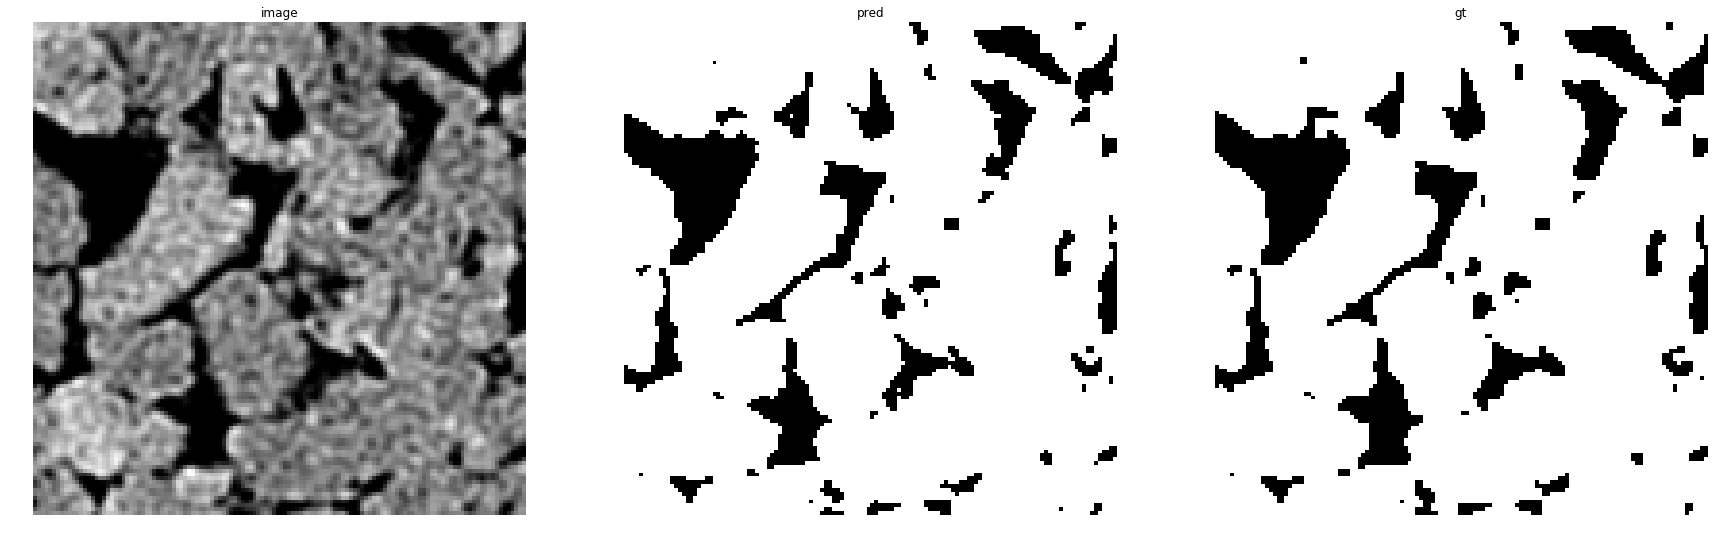

accuracy    : 0.984130859375
precision   : 0.9847144006436042
recall      : 0.9962264150943396
f1          : 0.9904369574812417
pr_auc      : 0.9997143656555824
iou         : 0.9810550859807636


In [31]:
for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)
            cnt -= 1
            
        if cnt ==0:
            break